<a href="https://colab.research.google.com/github/wldud01/Naver_BoostCourse-DataScience/blob/main/Course3_health_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### BoostCouse 3주차
- 서울 종합 병원 분포 확인하기
- 가설
  - 음주 여부에 따라 건강검진 수치 차이가 있을까?

### 라이브러리 로드 및 한글 폰트 설정


In [2]:
# @title 라이브러리 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 23.9 MB/s eta 0:00:00


In [4]:
# @ title 한글 폰트 설정
import koreanize_matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
print(fm.findSystemFonts(fontpaths=None, fontext='ttf'))
plt.rc('font', family='NanumGothic')

['/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/Liberati

In [5]:
%config InlineBackend.figure_format="retina"

### 데이터셋 소개와 로드하기 -가설세우기
- 데이터셋을 불러오는 방법을 알아보겠습니다.

- 데이터를 미리보고, 기본 정보들을 확인해보겠습니다.

In [6]:
# @ 데이터 불러오기
# cp949 인코딩
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")
df.head()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  시력(좌)  \
0  2017        1     1           13    46      170.0        65.0  91.0    1.0   
1  2017        2     2            8    41      150.0        45.0  73.4    1.2   
2  2017        3     1            8    45      175.0        75.0  94.0    1.0   
3  2017        4     2           12    11      155.0        55.0  67.5    0.9   
4  2017        5     1            8    41      175.0        75.0  93.0    1.5   

   시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  치아마모증유무  \
0    1.2  ...   25.0   3.0   0.0          1      NaN    NaN      NaN   
1    1.0  ...   10.0   1.0   0.0          1      NaN    NaN      NaN   
2    0.8  ...  136.0   1.0   0.0          1      NaN    NaN      NaN   
3    1.0  ...   30.0   1.0   1.0          0      NaN    NaN      NaN   
4    1.5  ...   68.0   3.0   0.0          0      NaN    NaN      NaN   

   제3대구치(사랑니)이상   치석   데이터공개일자  
0           NaN  1.0  20181126  
1           NaN  1.0  20181126  
2           NaN  0.0  20181126  
3           NaN  NaN  20181126  
4           NaN  NaN  20181126  

[5 rows x 34 columns]

In [7]:
# @title 100만건 건강검진 데이터
df.shape

(1000000, 34)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [9]:
# @ title 100만개 데이터 중 랜덤 추출 1개
df.sample()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
97740  2017    97741     1           10    47      160.0        45.0  68.0   

       시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
97740    0.8    1.0  ...   61.0   3.0   1.0          1      NaN    NaN   

       치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
97740      NaN           NaN  0.0  20181126  

[1 rows x 34 columns]

<Axes: >

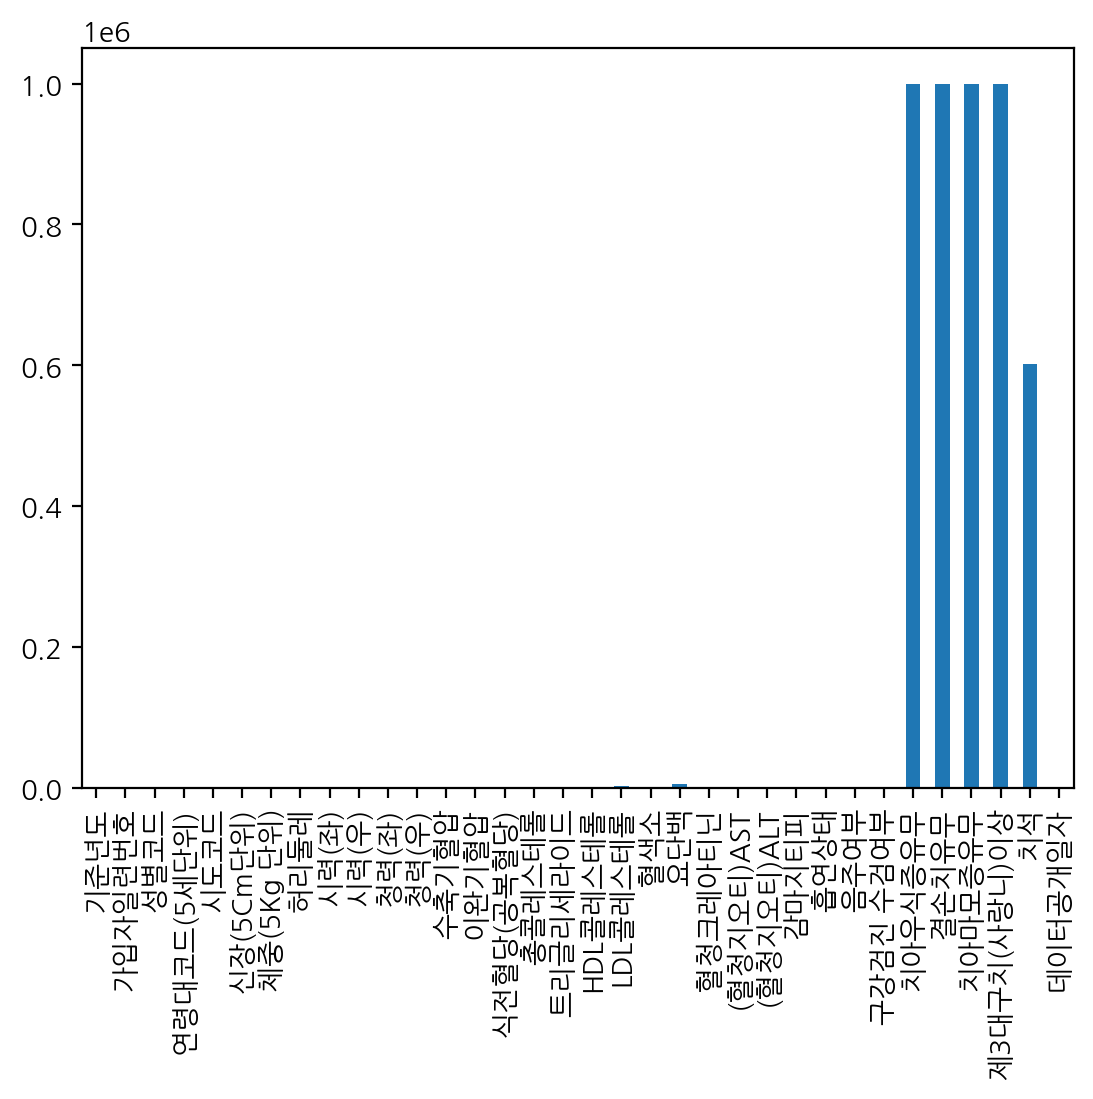

In [10]:
# @title 결측치 확인하기
df.isna().sum().plot.bar()

In [11]:
null_data = df.isna().sum()
null_data_list = null_data[null_data >10000].index.tolist()
null_data_list

['치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석']

In [12]:
df_drop = df.drop(null_data_list,axis=1)
df_drop.head(1)

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  시력(좌)  \
0  2017        1     1           13    46      170.0        65.0  91.0    1.0   

   시력(우)  ...   혈색소  요단백  혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT  감마지티피  흡연상태  음주여부  \
0    1.2  ...  15.9  1.0      1.0        19.0        41.0   25.0   3.0   0.0   

   구강검진 수검여부   데이터공개일자  
0          1  20181126  

[1 rows x 29 columns]

In [13]:
#@title 메모리 용량 비교
display(df.info())
display(df_drop.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 29 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   기준년도         1000000 non-null  int64  
 1   가입자일련번호      1000000 non-null  int64  
 2   성별코드         1000000 non-null  int64  
 3   연령대코드(5세단위)  1000000 non-null  int64  
 4   시도코드         1000000 non-null  int64  
 5   신장(5Cm단위)    999738 non-null   float64
 6   체중(5Kg 단위)   999732 non-null   float64
 7   허리둘레         999560 non-null   float64
 8   시력(좌)        999712 non-null   float64
 9   시력(우)        999721 non-null   float64
 10  청력(좌)        999758 non-null   float64
 11  청력(우)        999757 non-null   float64
 12  수축기혈압        999924 non-null   float64
 13  이완기혈압        999923 non-null   float64
 14  식전혈당(공복혈당)   999957 non-null   float64
 15  총콜레스테롤       999957 non-null   float64
 16  트리글리세라이드     999957 non-null   float64
 17  HDL콜레스테롤     999956 non-null   float64
 18  LDL

None

In [14]:
#@title 로드한 데이터 결측치를 보고 요약 및 집계하기
# 결측치 isnull도 가능
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

<Axes: >

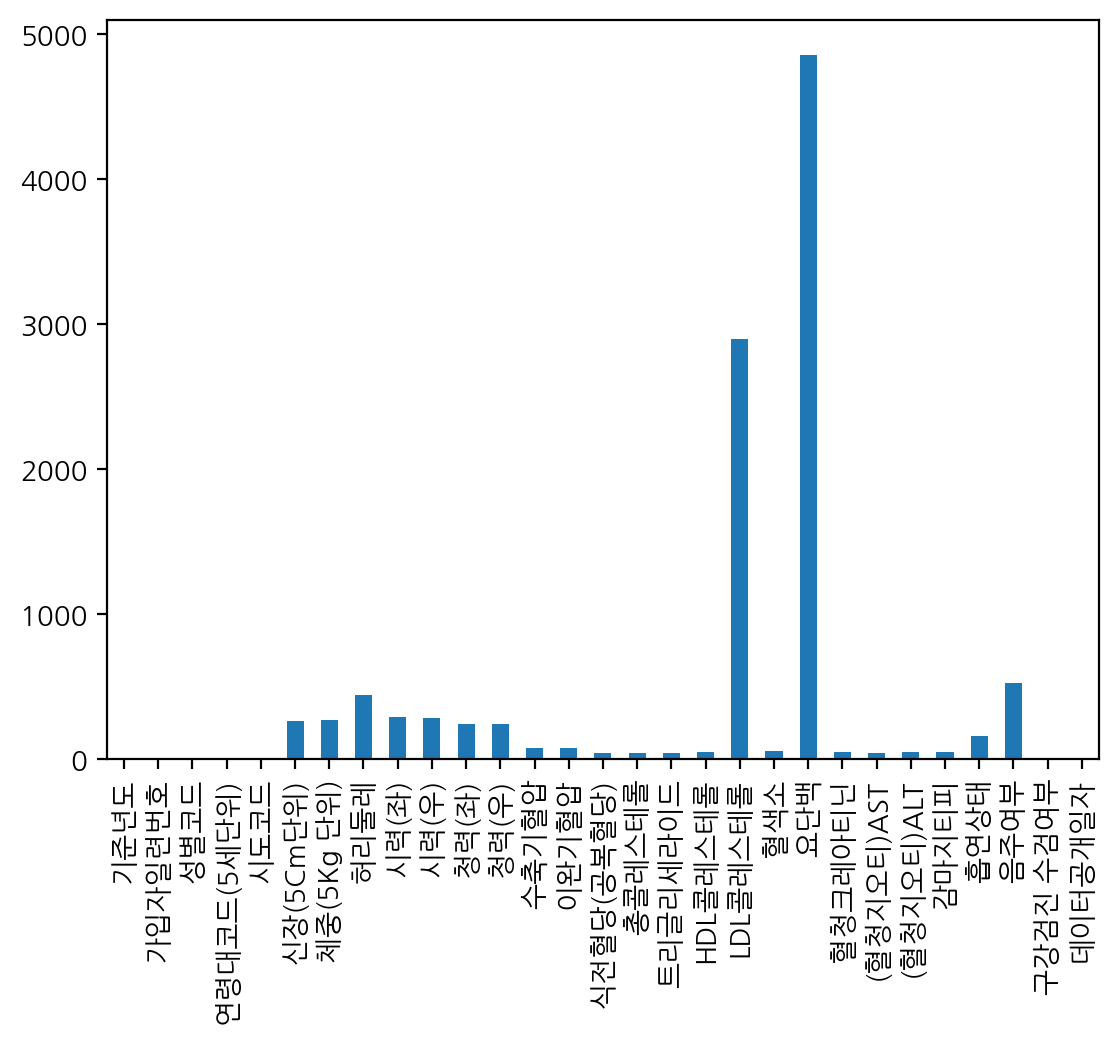

In [15]:
df_drop.isnull().sum().plot.bar()

In [16]:
#@title 일부 데이터 요약하기
df_drop.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '데이터공개일자'],
      dtype='object')

In [17]:
#@title 데이터 미리보기
df[['(혈청지오티)AST', '(혈청지오티)ALT']].head()

(혈청지오티)AST  (혈청지오티)ALT
0        19.0        41.0
1        16.0        13.0
2        45.0        62.0
3        21.0        24.0
4        37.0        62.0

In [18]:
#@title 두 데이터('(혈청지오티)AST', '(혈청지오티)ALT') describe 보기
df[['(혈청지오티)AST', '(혈청지오티)ALT']].describe()

(혈청지오티)AST     (혈청지오티)ALT
count  999958.000000  999956.000000
mean       26.075068      25.859343
std        24.437136      25.814268
min         1.000000       1.000000
25%        19.000000      15.000000
50%        23.000000      20.000000
75%        28.000000      30.000000
max      9999.000000    6710.000000

<Axes: >

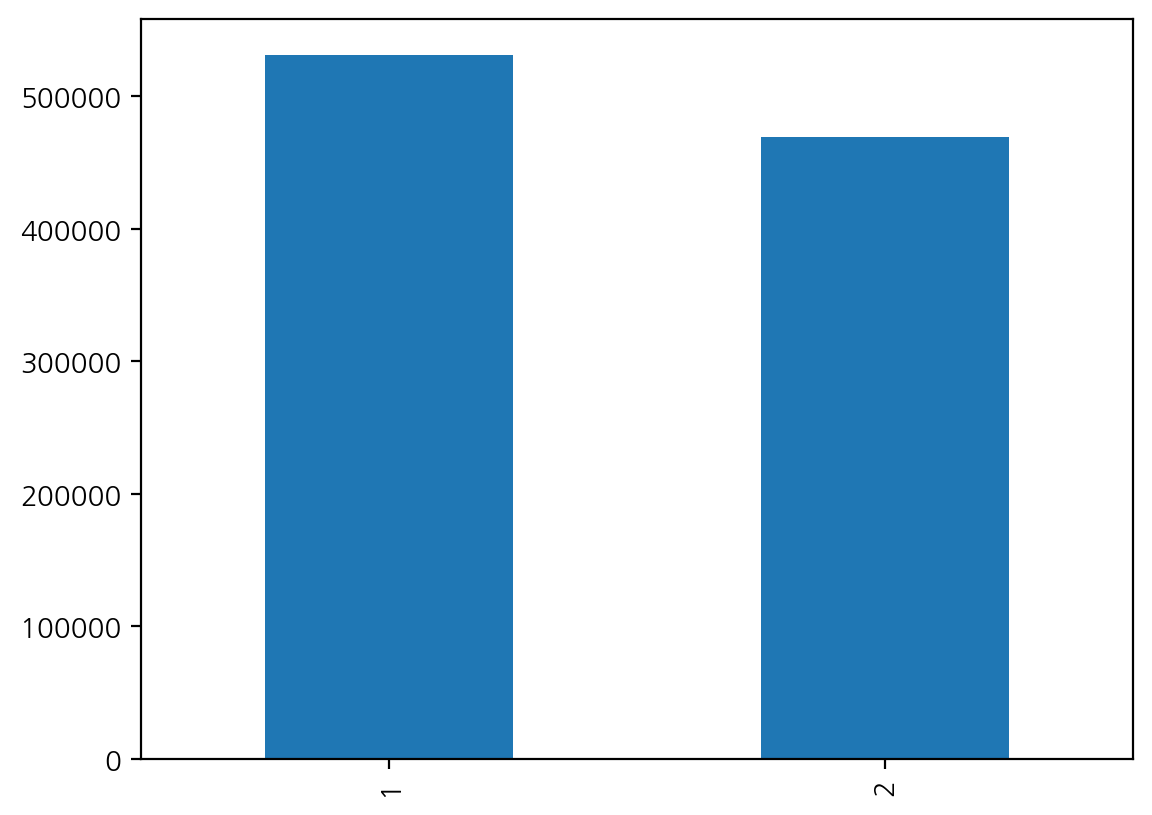

In [19]:
#@title value_counts로 빈도수 집계
df["성별코드"].value_counts().plot.bar()

1.0    608587
3.0    215061
2.0    176192
Name: 흡연상태, dtype: int64

<Axes: >

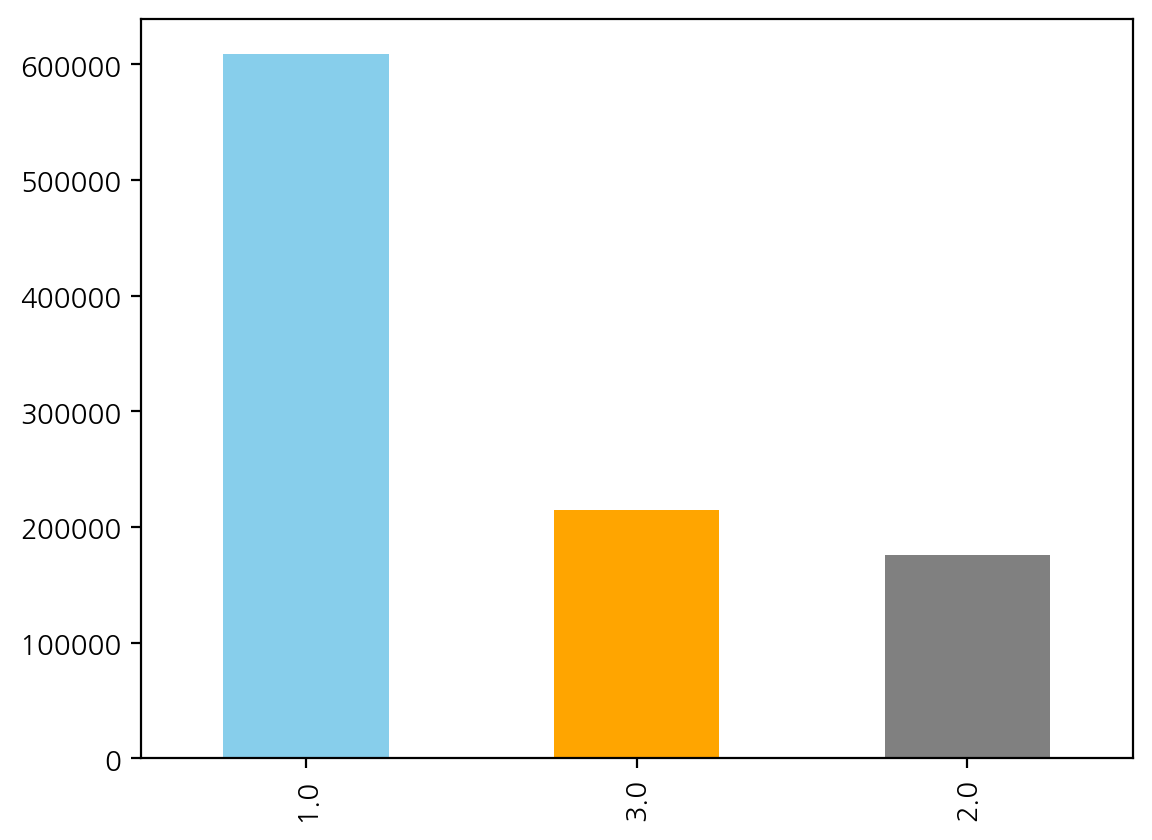

In [20]:
#@title 흡연상태 value-count
display(df["흡연상태"].value_counts())
df["흡연상태"].value_counts().plot.bar(color=["skyblue","orange","gray"])

In [21]:
#@title groupby와 pivot table로 다양한 집계 연산하기
#groupby
#성별 코드
df_drop.groupby?

In [22]:
#@title 성별코드를 groupby 했을 때 데이터 평균
df.groupby(["성별코드"]).mean()

기준년도        가입자일련번호  연령대코드(5세단위)      시도코드   신장(5Cm단위)  체중(5Kg 단위)  \
성별코드                                                                         
1     2017.0  499946.580386    10.324381  34.15184  168.516441   70.211016   
2     2017.0  500061.589758    10.783424  33.25853  155.078899   55.701656   

           허리둘레     시력(좌)     시력(우)     청력(좌)  ...      감마지티피      흡연상태  \
성별코드                                           ...                        
1     85.171843  1.035268  1.034448  1.032813  ...  49.446249  2.058548   
2     77.061441  0.915023  0.910340  1.031968  ...  23.396111  1.094082   

          음주여부  구강검진 수검여부  치아우식증유무  결손치유무  치아마모증유무  제3대구치(사랑니)이상        치석  \
성별코드                                                                         
1     0.670136   0.433298      NaN    NaN      NaN           NaN  0.640683   
2     0.300790   0.359603      NaN    NaN      NaN           NaN  0.549563   

         데이터공개일자  
성별코드              
1     20181126.0  
2     20181126.0  

[2 rows x 33 columns]

In [23]:
#@title 여러개의 값을 한번에 연산을 수행할 수 있따
df.groupby(["성별코드"])["가입자일련번호"].count()

성별코드
1    531172
2    468828
Name: 가입자일련번호, dtype: int64

<Axes: xlabel='성별코드'>

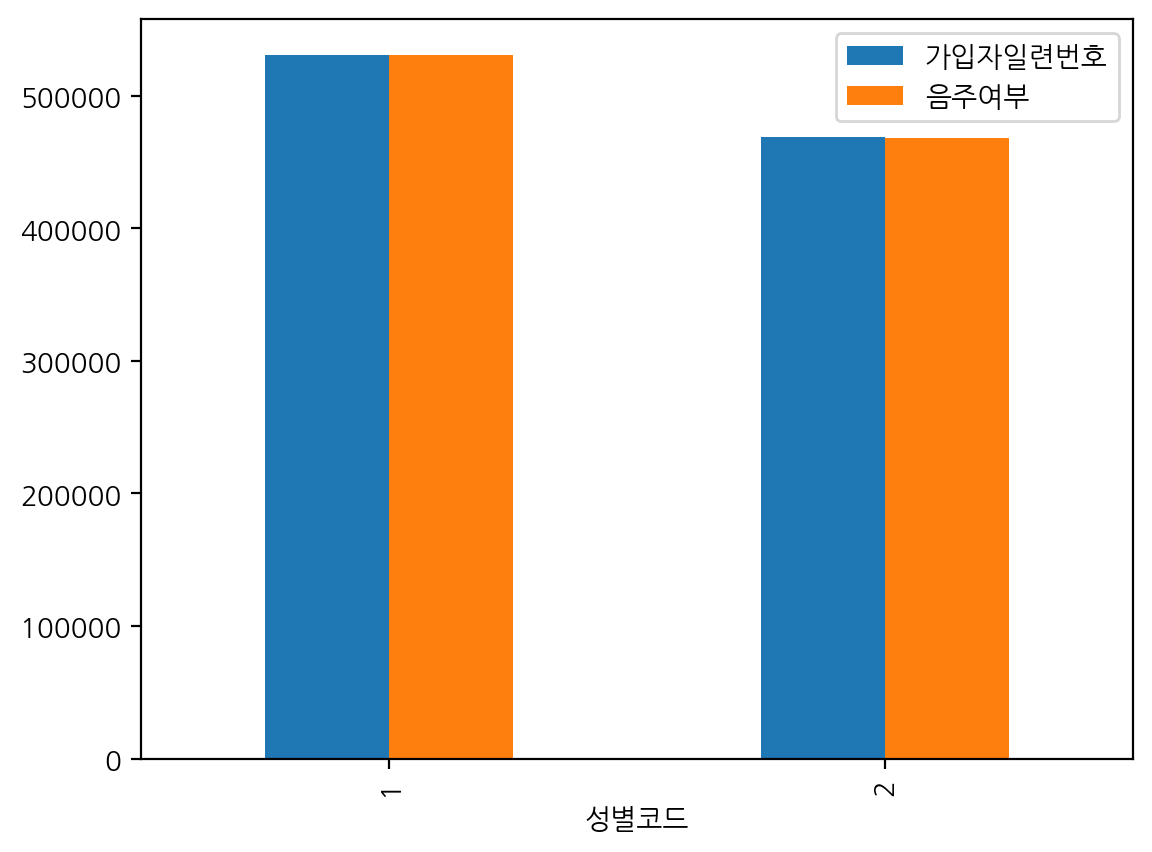

In [24]:
df.groupby(["성별코드"])[["가입자일련번호","음주여부"]].count().plot.bar()

In [25]:
#@title 성별 코드와 음주여부로 그룹화 하고 감마지티피의 평균
df.groupby(["성별코드","음주여부"])["감마지티피"].mean()

성별코드  음주여부
1     0.0     34.710544
      1.0     56.707919
2     0.0     22.660238
      1.0     25.115149
Name: 감마지티피, dtype: float64

In [26]:
df.groupby(["성별코드","음주여부"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   175139.0  34.710544  37.715218  1.0  18.0  25.0  38.0  999.0
     1.0   355819.0  56.707919  69.039084  1.0  24.0  37.0  63.0  999.0
2    0.0   327559.0  22.660238  25.181300  1.0  13.0  17.0  24.0  999.0
     1.0   140913.0  25.115149  35.870812  1.0  13.0  17.0  25.0  999.0

In [27]:
df.groupby(["성별코드","음주여부"])["감마지티피"].agg(["count","mean"])

count       mean
성별코드 음주여부                   
1    0.0   175139  34.710544
     1.0   355819  56.707919
2    0.0   327559  22.660238
     1.0   140913  25.115149

In [28]:
#@title pivot table
df.pivot_table?

In [29]:
#@title 음주여부에 따른 그룹화된 수를 피봇테이블로 구한
df.pivot_table(index="음주여부")

(혈청지오티)ALT  (혈청지오티)AST   HDL콜레스테롤    LDL콜레스테롤        가입자일련번호      감마지티피  \
음주여부                                                                            
0.0    24.107862   25.094792  56.161852  114.467632  499800.113284  26.858541   
1.0    27.634991   27.069879  57.606351  111.444394  500196.825986  47.745678   

      구강검진 수검여부  기준년도   데이터공개일자      성별코드  ...     청력(우)     청력(좌)  \
음주여부                                       ...                       
0.0    0.358768  2017  20181126  1.651602  ...  1.041086  1.042881   
1.0    0.439257  2017  20181126  1.283686  ...  1.020745  1.021758   

      체중(5Kg 단위)      총콜레스테롤        치석    트리글리세라이드       허리둘레        혈색소  \
음주여부                                                                       
0.0    60.082827  194.699007  0.573111  122.063887  80.269019  13.748950   
1.0    66.778226  196.346568  0.626153  144.077696  82.484576  14.704997   

       혈청크레아티닌      흡연상태  
음주여부                      
0.0   0.837132  1.320330  
1.0   0.892460  1.896158  

[2 rows x 29 columns]

In [30]:
# groupby와 pivot table의 차이는 Series로 반환되는지 DataFrame으로 반환되는지의 여부이다.
df.pivot_table(index="음주여부", values="가입자일련번호",aggfunc="count")

가입자일련번호
음주여부         
0.0    502729
1.0    496746

In [31]:
#@title 음주 여부에 따른 감마지티피 평균
#aggfunc 여러개 지정할 때 리스트로 전달한다
pd.pivot_table(df_drop,index="음주여부",values="감마지티피",aggfunc="mean")

감마지티피
음주여부           
0.0   26.858541
1.0   47.745678

In [32]:
#@title histogram으로 전체 수치 데이터 한번에 시각화 하기
# seaborn은 내부연산을 하기 때문에 느릴 수 있다

df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 29 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   기준년도         1000000 non-null  int64  
 1   가입자일련번호      1000000 non-null  int64  
 2   성별코드         1000000 non-null  int64  
 3   연령대코드(5세단위)  1000000 non-null  int64  
 4   시도코드         1000000 non-null  int64  
 5   신장(5Cm단위)    999738 non-null   float64
 6   체중(5Kg 단위)   999732 non-null   float64
 7   허리둘레         999560 non-null   float64
 8   시력(좌)        999712 non-null   float64
 9   시력(우)        999721 non-null   float64
 10  청력(좌)        999758 non-null   float64
 11  청력(우)        999757 non-null   float64
 12  수축기혈압        999924 non-null   float64
 13  이완기혈압        999923 non-null   float64
 14  식전혈당(공복혈당)   999957 non-null   float64
 15  총콜레스테롤       999957 non-null   float64
 16  트리글리세라이드     999957 non-null   float64
 17  HDL콜레스테롤     999956 non-null   float64
 18  LDL

array([[<Axes: title={'center': '기준년도'}>,
        <Axes: title={'center': '가입자일련번호'}>,
        <Axes: title={'center': '성별코드'}>,
        <Axes: title={'center': '연령대코드(5세단위)'}>,
        <Axes: title={'center': '시도코드'}>],
       [<Axes: title={'center': '신장(5Cm단위)'}>,
        <Axes: title={'center': '체중(5Kg 단위)'}>,
        <Axes: title={'center': '허리둘레'}>,
        <Axes: title={'center': '시력(좌)'}>,
        <Axes: title={'center': '시력(우)'}>],
       [<Axes: title={'center': '청력(좌)'}>,
        <Axes: title={'center': '청력(우)'}>,
        <Axes: title={'center': '수축기혈압'}>,
        <Axes: title={'center': '이완기혈압'}>,
        <Axes: title={'center': '식전혈당(공복혈당)'}>],
       [<Axes: title={'center': '총콜레스테롤'}>,
        <Axes: title={'center': '트리글리세라이드'}>,
        <Axes: title={'center': 'HDL콜레스테롤'}>,
        <Axes: title={'center': 'LDL콜레스테롤'}>,
        <Axes: title={'center': '혈색소'}>],
       [<Axes: title={'center': '요단백'}>,
        <Axes: title={'center': '혈청크레아티닌'}>,
        <Axes: title={'c

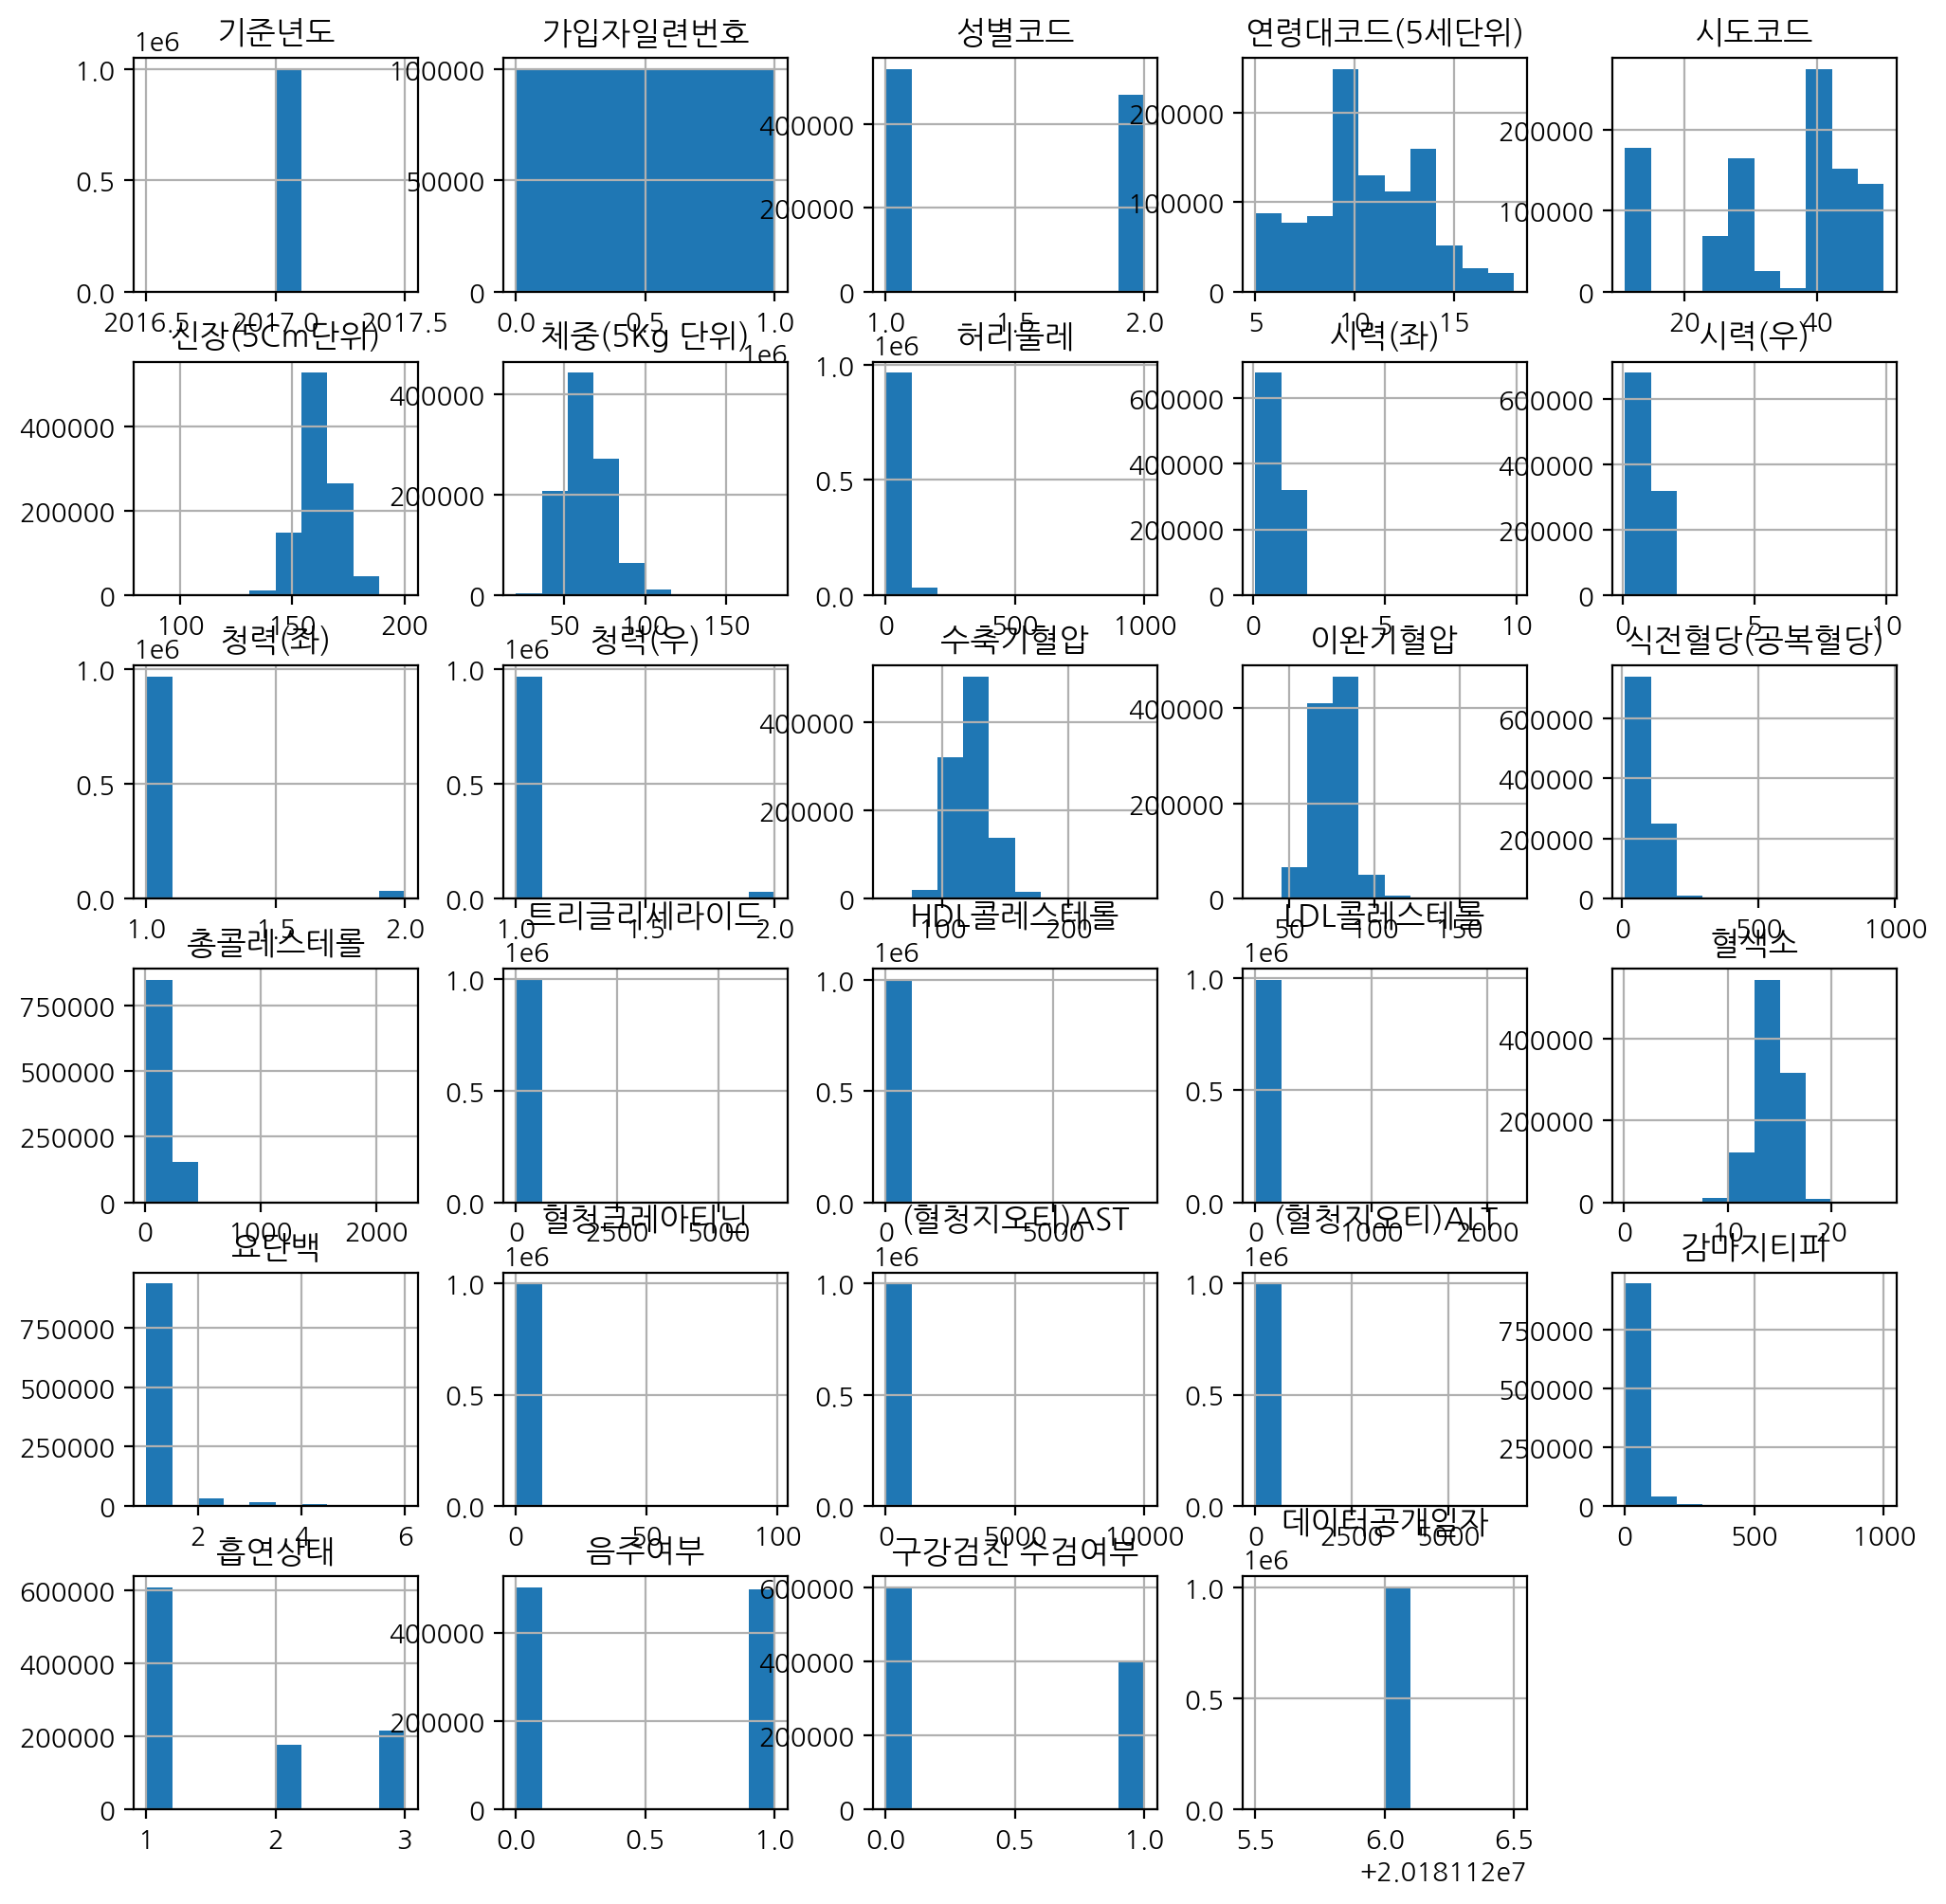

In [33]:
df_drop.hist(figsize=(12,12))

array([[<Axes: title={'center': '기준년도'}>,
        <Axes: title={'center': '가입자일련번호'}>,
        <Axes: title={'center': '성별코드'}>],
       [<Axes: title={'center': '연령대코드(5세단위)'}>,
        <Axes: title={'center': '시도코드'}>,
        <Axes: title={'center': '신장(5Cm단위)'}>],
       [<Axes: title={'center': '체중(5Kg 단위)'}>,
        <Axes: title={'center': '허리둘레'}>,
        <Axes: title={'center': '시력(좌)'}>],
       [<Axes: title={'center': '시력(우)'}>,
        <Axes: title={'center': '청력(좌)'}>,
        <Axes: title={'center': '청력(우)'}>]], dtype=object)

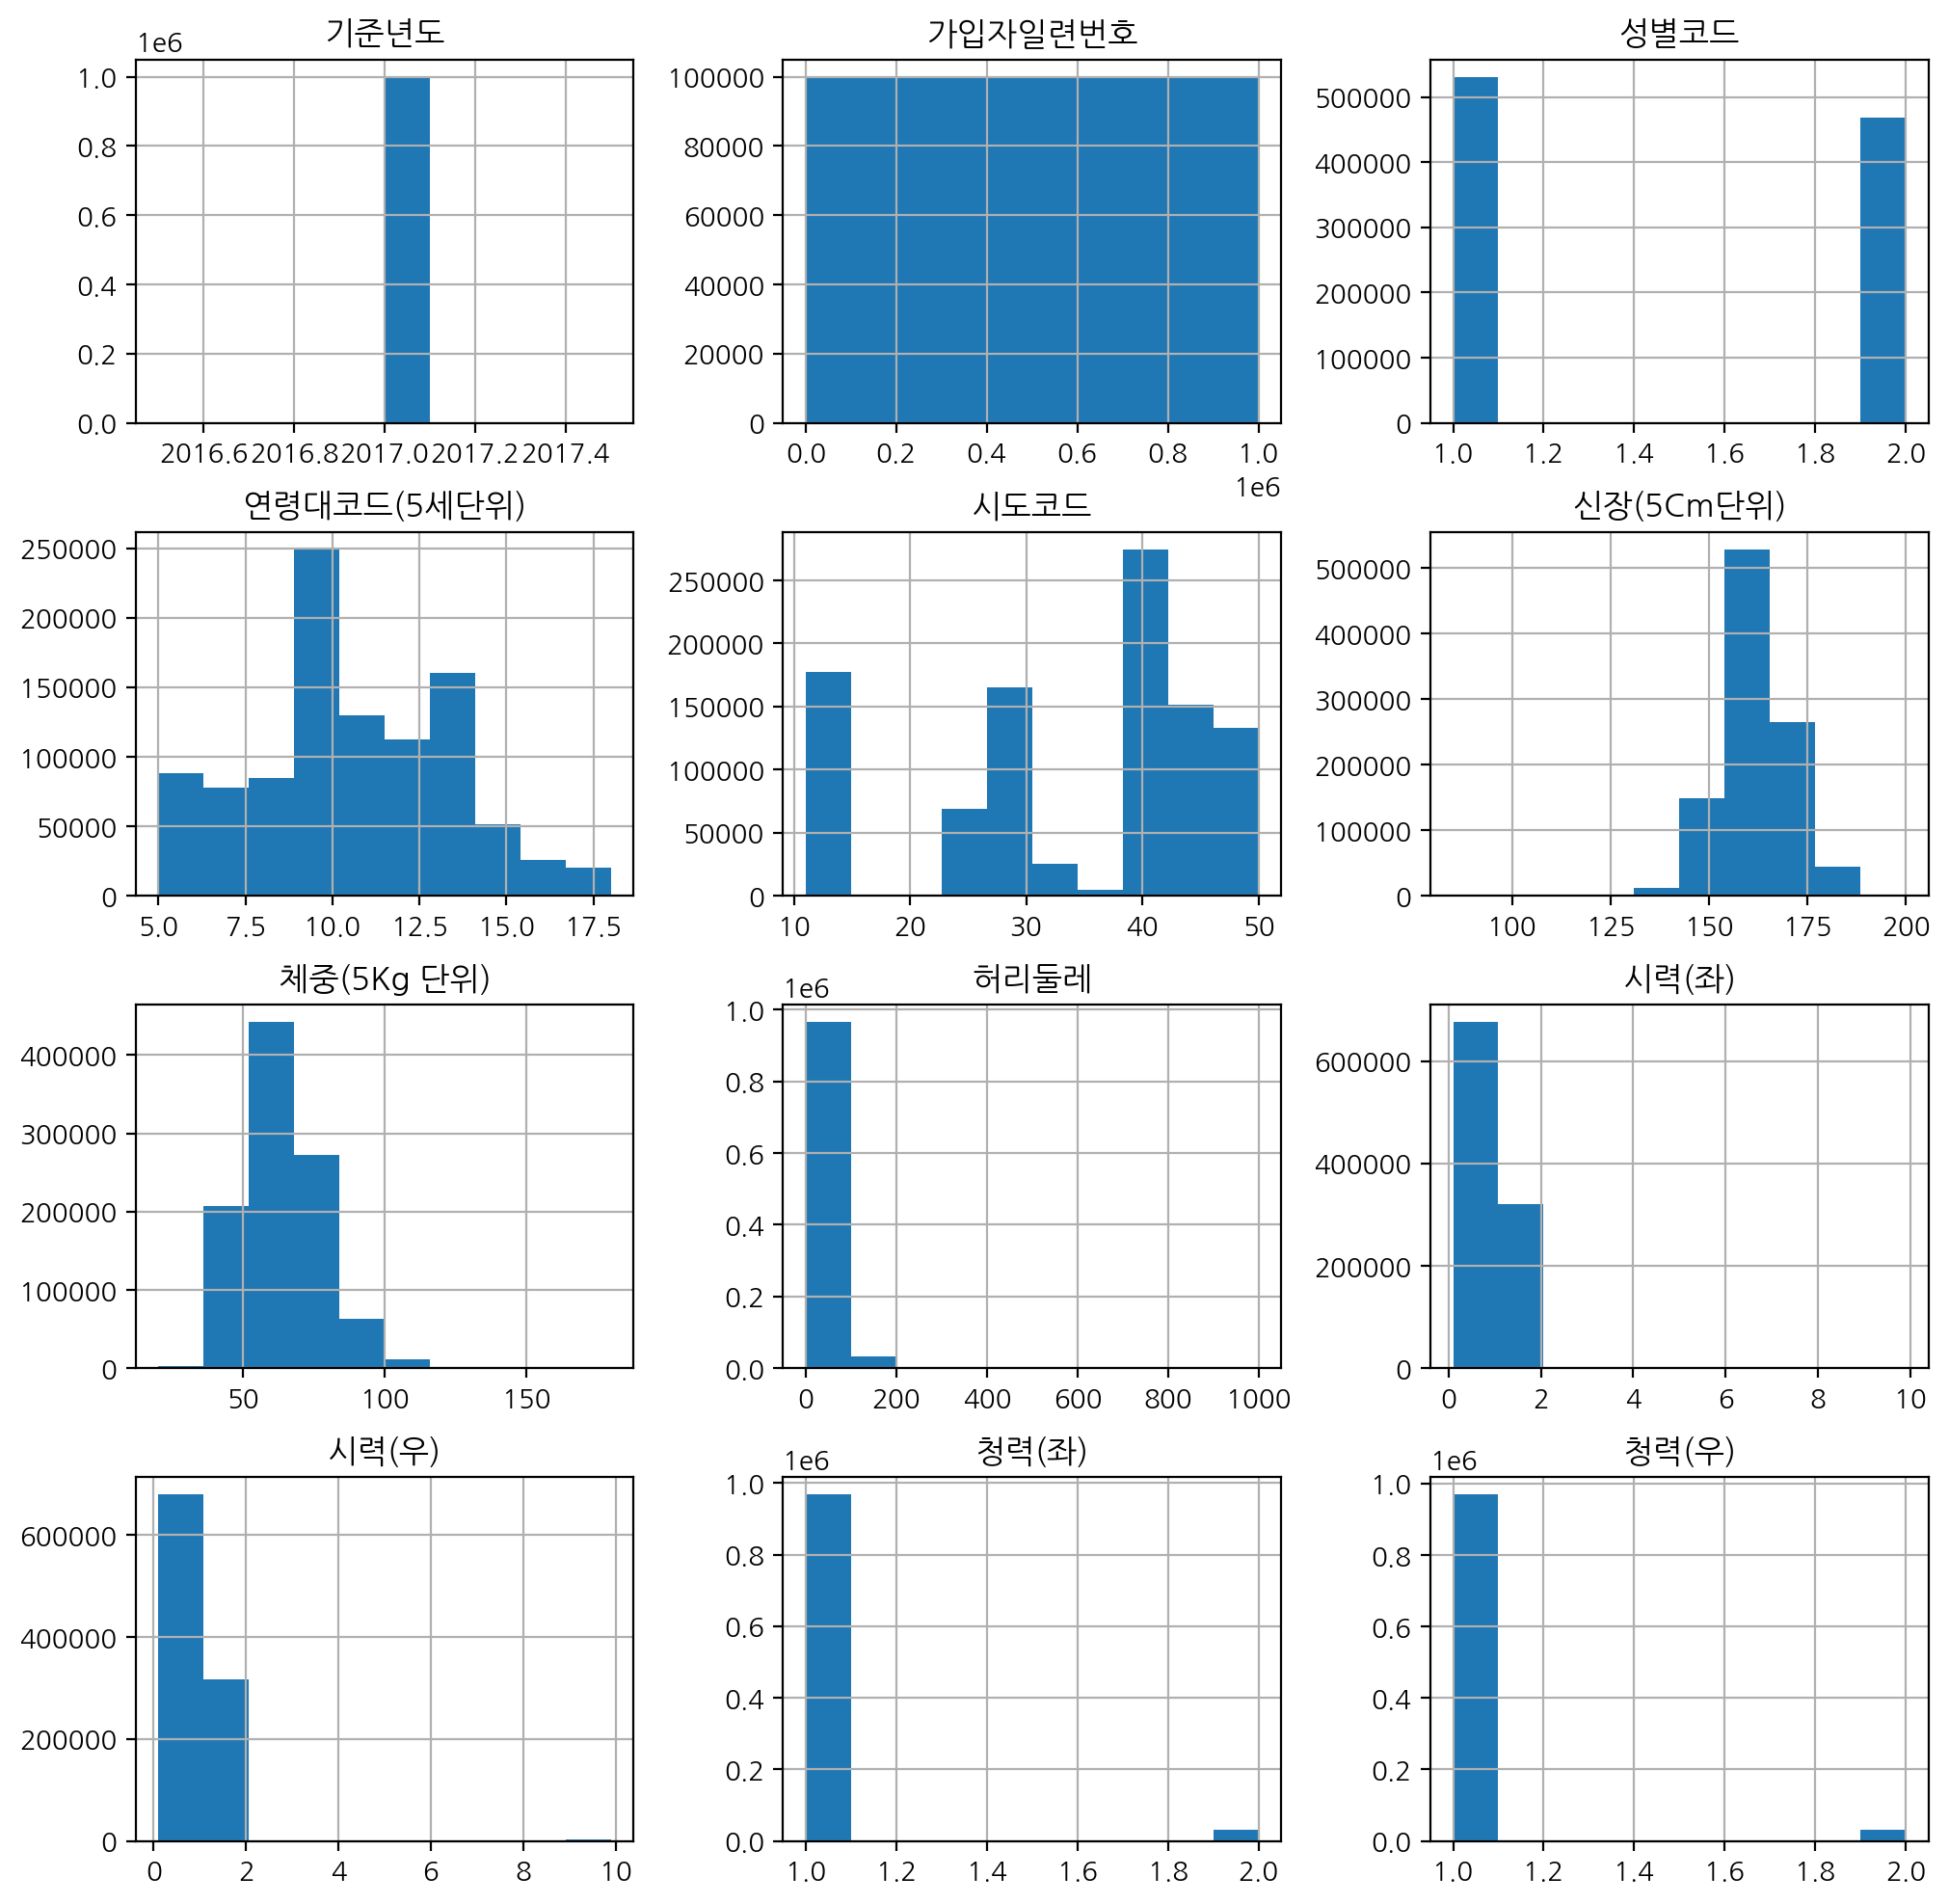

In [34]:
#@ 슬라이싱을 사용해 히스토그램 그리기
# 전체 데이터를 가지고 시각화 하는 경우 모두 보기 힘들끼 때문에 나눠서 돌린다
df.iloc[:,:12].hist(figsize=(12,12))

In [35]:
df["연령대코드(5세단위)"].unique()

array([13,  8, 12,  6, 17, 10,  9, 15,  5, 11,  7, 14, 16, 18])

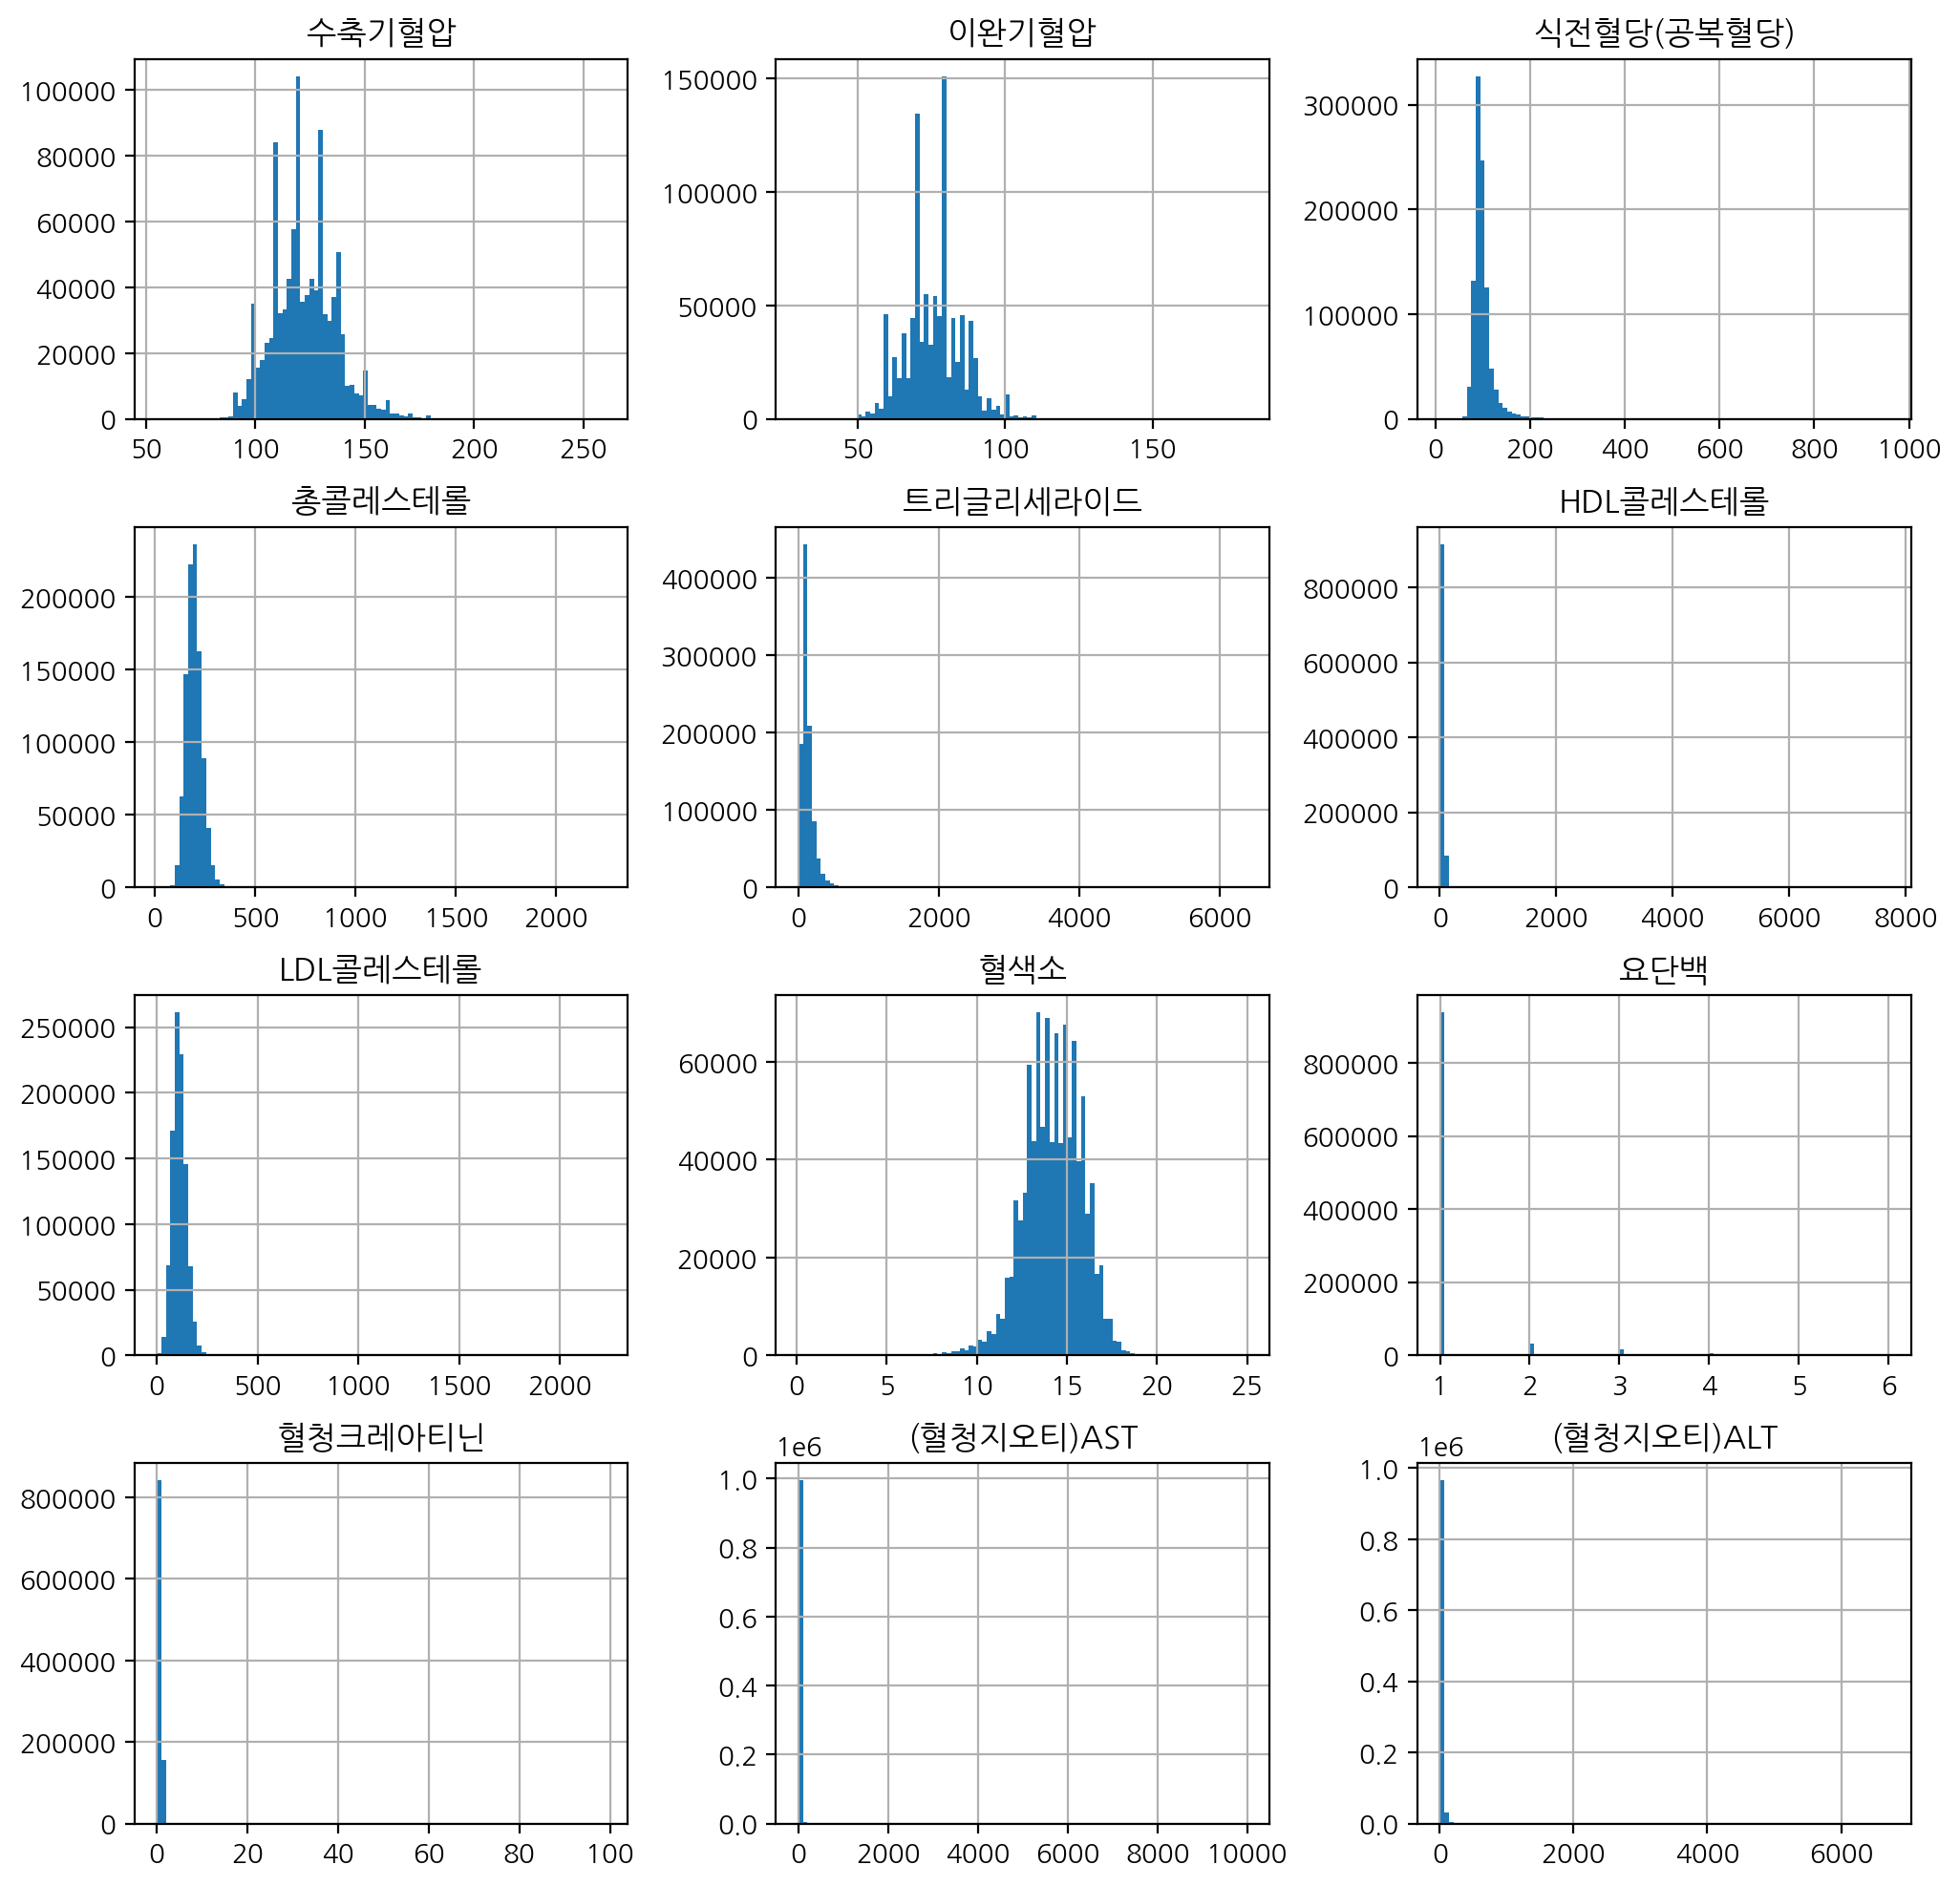

In [36]:
# bins를 조정해서 더 잘게 쪼개서 그려볼 수 있다
h = df.iloc[:,12:24].hist(figsize=(12,12),bins=100)

array([[<Axes: title={'center': '감마지티피'}>,
        <Axes: title={'center': '흡연상태'}>,
        <Axes: title={'center': '음주여부'}>],
       [<Axes: title={'center': '구강검진 수검여부'}>,
        <Axes: title={'center': '치아우식증유무'}>,
        <Axes: title={'center': '결손치유무'}>],
       [<Axes: title={'center': '치아마모증유무'}>,
        <Axes: title={'center': '제3대구치(사랑니)이상'}>,
        <Axes: title={'center': '치석'}>],
       [<Axes: title={'center': '데이터공개일자'}>, <Axes: >, <Axes: >]],
      dtype=object)

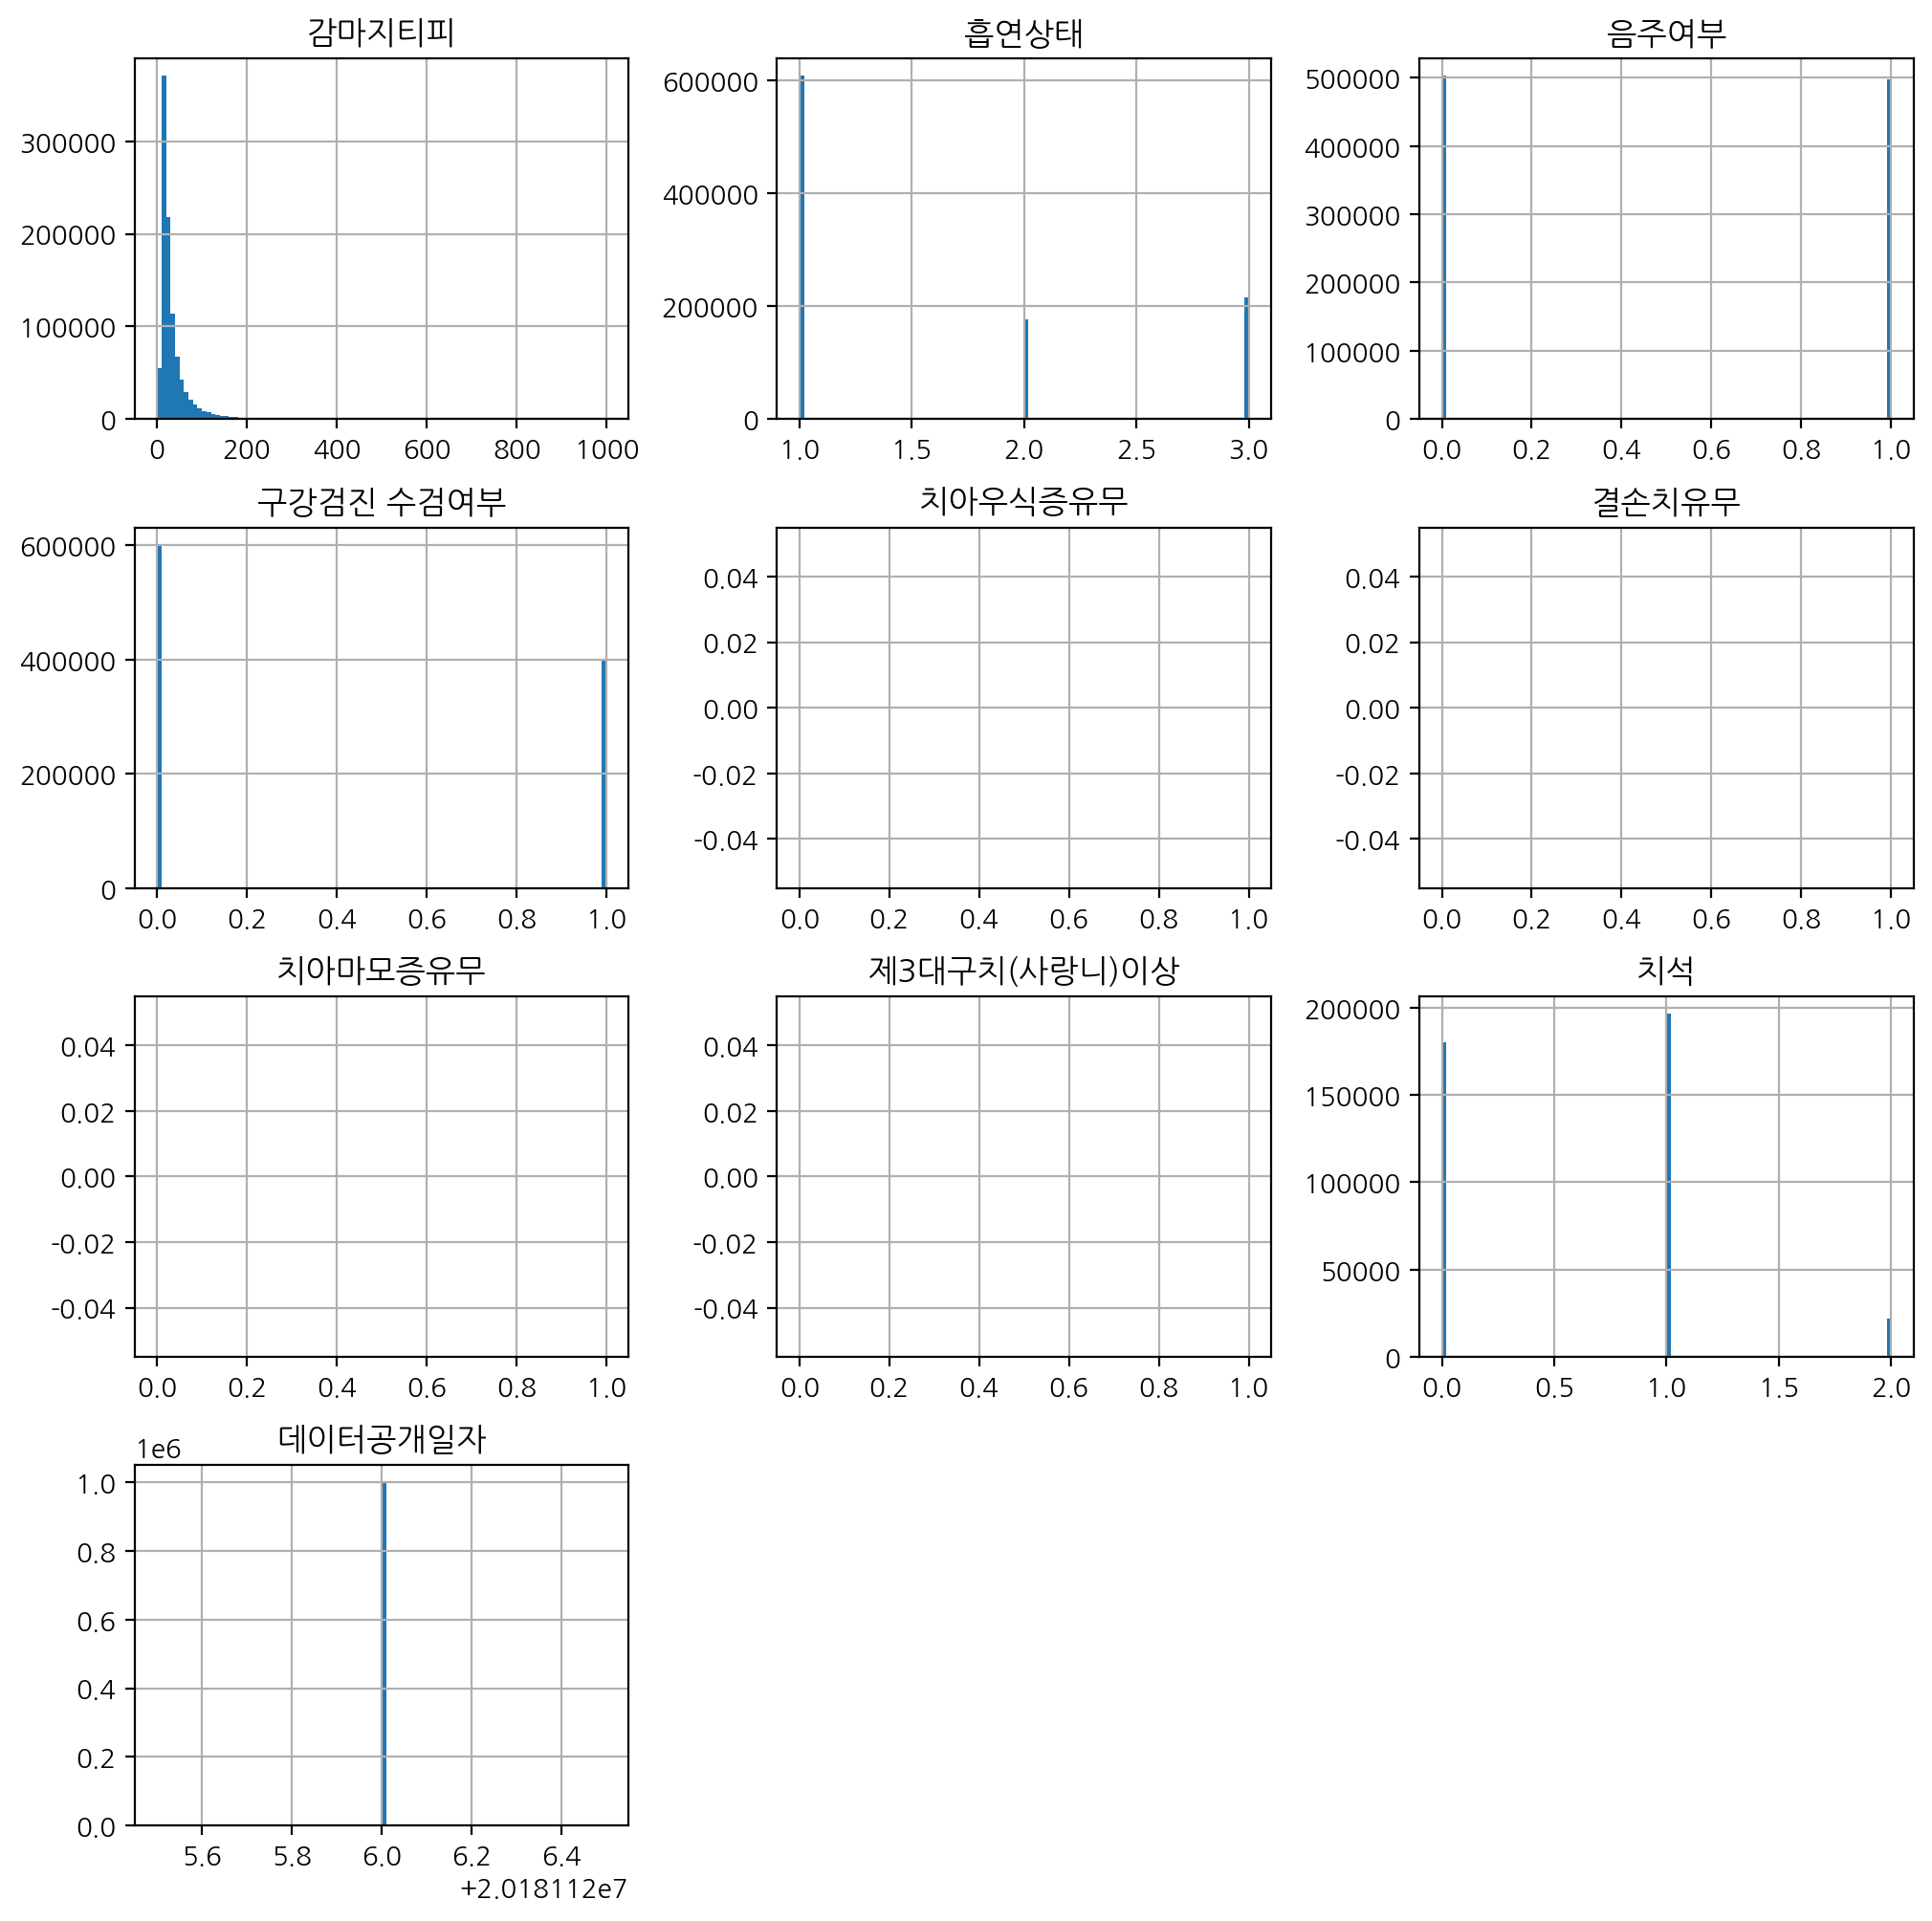

In [37]:
df.iloc[:,24:].hist(figsize=(12,12),bins=100)

In [38]:
#@title seaborn libaray 활용, 1000개만 먼저 sampling
df = df.sample(1000,random_state=1)
df.head()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)   허리둘레  \
276826  2017   276827     2           12    11      155.0        85.0  113.0   
849425  2017   849426     2           15    11      155.0        45.0   73.0   
504499  2017   504500     1           11    47      170.0        45.0   63.0   
601054  2017   601055     2           16    26      150.0        50.0   77.0   
980221  2017   980222     2           13    41      150.0        65.0   95.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
276826    0.7    1.0  ...   35.0   1.0   0.0          0      NaN    NaN   
849425    0.5    0.4  ...   19.0   1.0   0.0          1      NaN    NaN   
504499    0.7    0.4  ...   15.0   3.0   0.0          0      NaN    NaN   
601054    0.4    0.3  ...   13.0   1.0   0.0          0      NaN    NaN   
980221    1.0    0.8  ...  265.0   1.0   0.0          0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
276826      NaN           NaN  NaN  20181126  
849425      NaN           NaN  0.0  20181126  
504499      NaN           NaN  NaN  20181126  
601054      NaN           NaN  NaN  20181126  
980221      NaN           NaN  NaN  20181126  

[5 rows x 34 columns]

<Axes: >

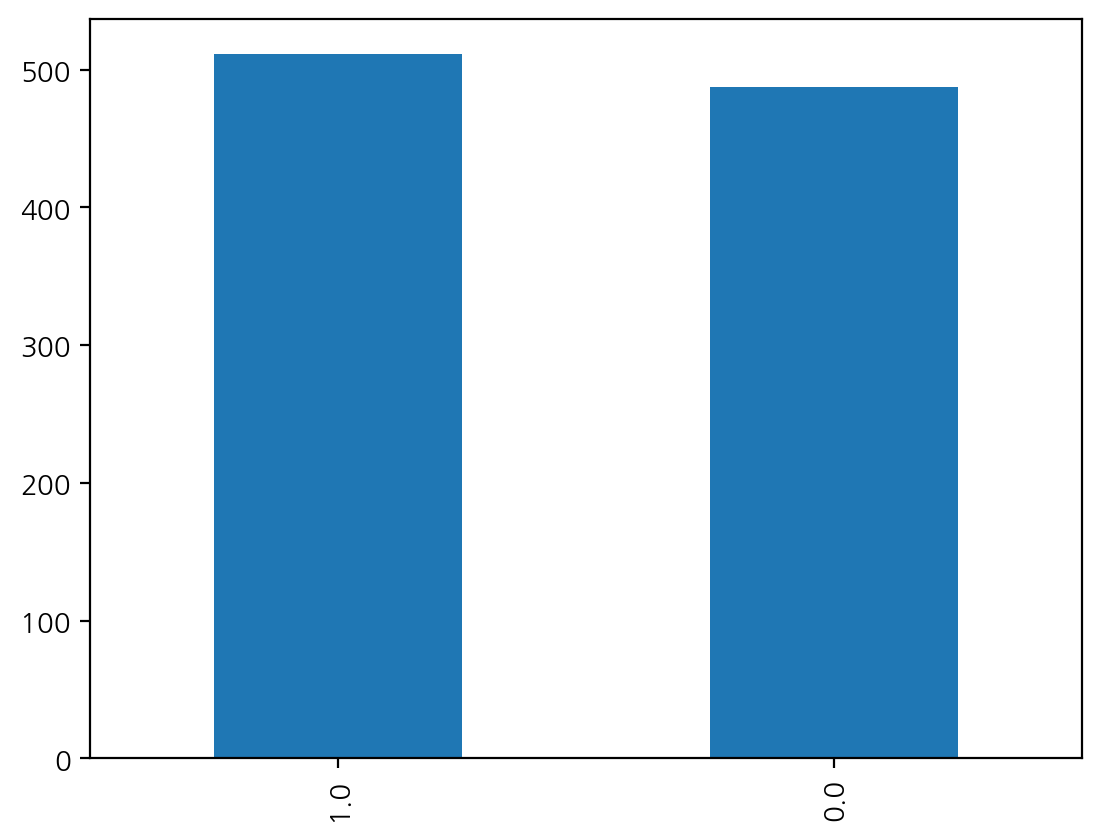

In [39]:
#@title 범주형 데이터와 연속 데이터
df["음주여부"].value_counts().plot.bar()

<Axes: xlabel='음주여부', ylabel='count'>

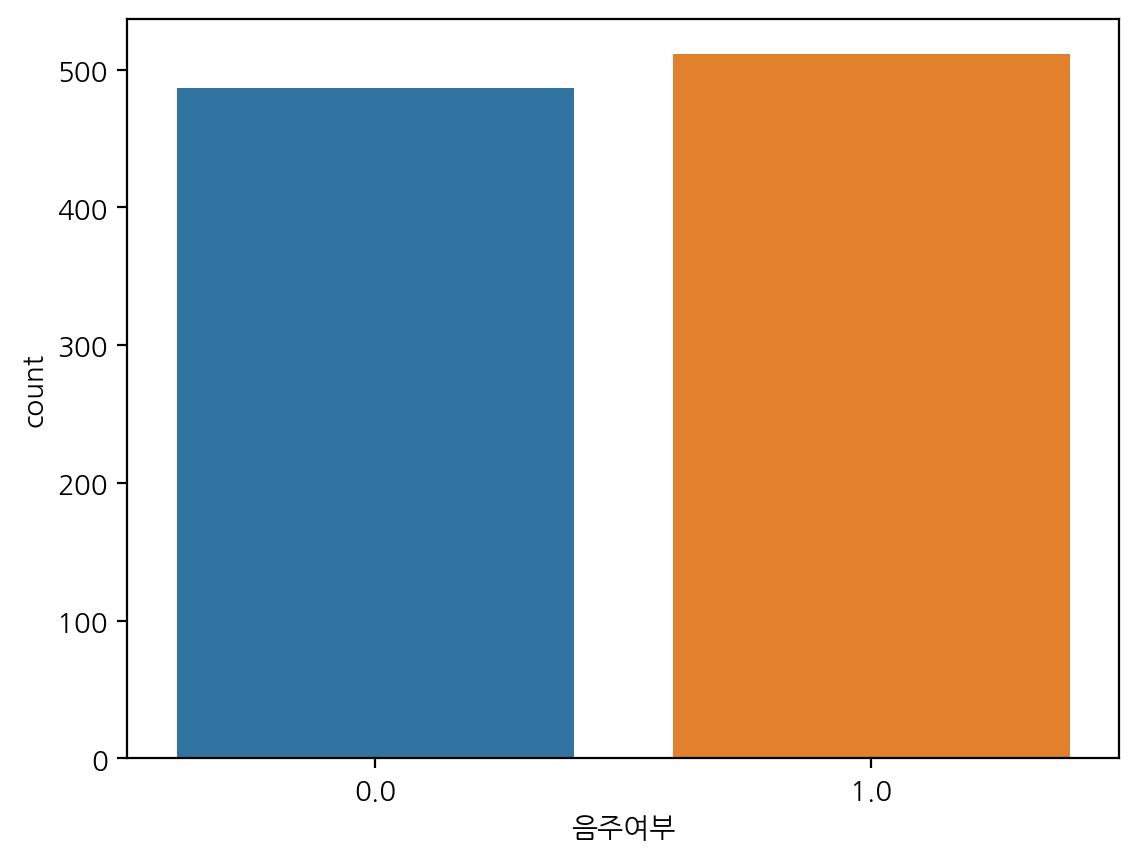

In [40]:
# seaborn으로 그려보기
sns.countplot(x="음주여부", data=df)

<Axes: xlabel='흡연상태', ylabel='count'>

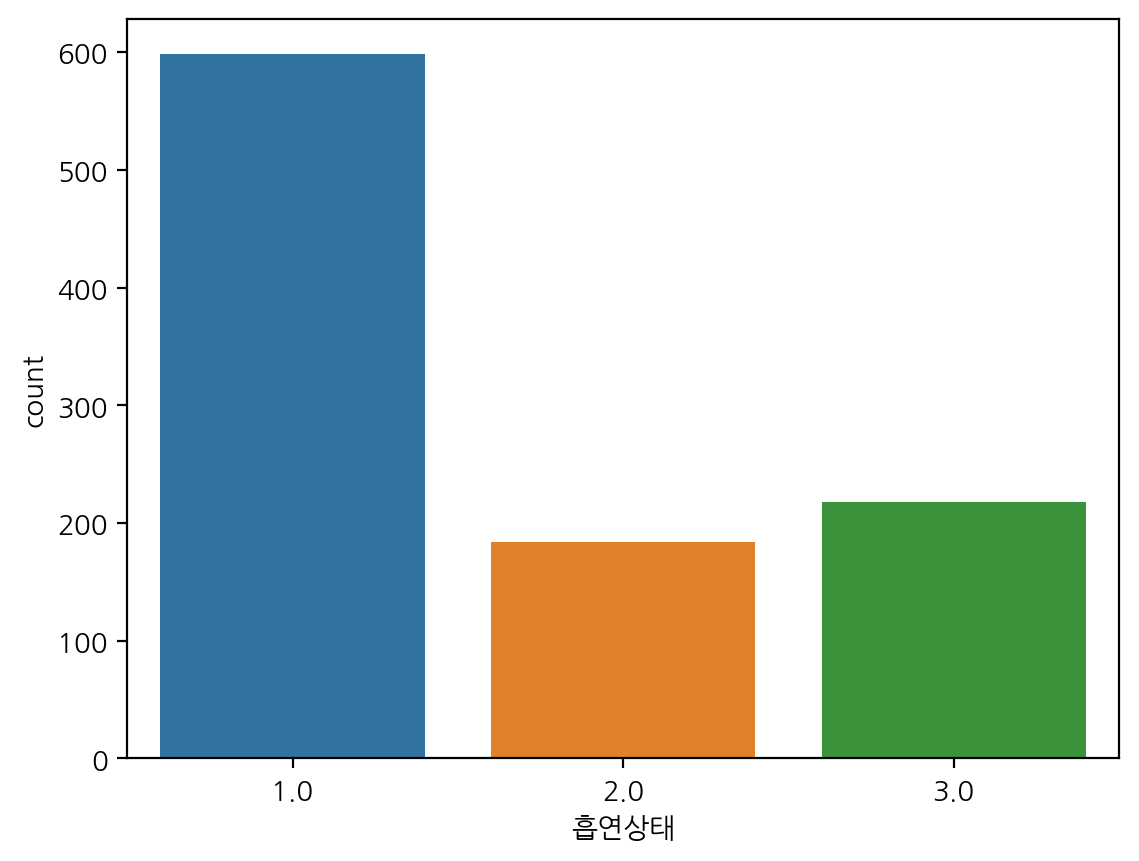

In [41]:
sns.countplot(x="흡연상태", data=df)

<Axes: xlabel='음주여부', ylabel='count'>

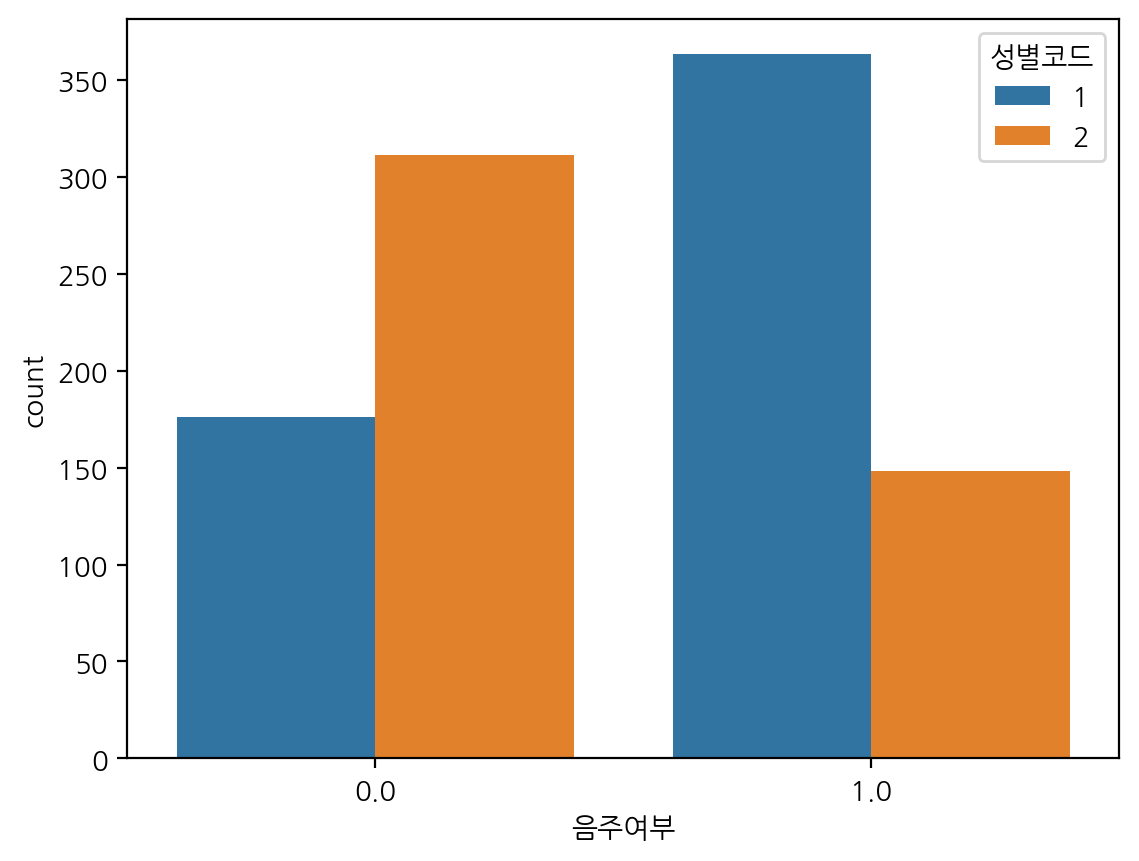

In [42]:
#@title 성별 별로 음주 여부
sns.countplot(data=df,x="음주여부",hue="성별코드")

<Axes: xlabel='연령대코드(5세단위)', ylabel='count'>

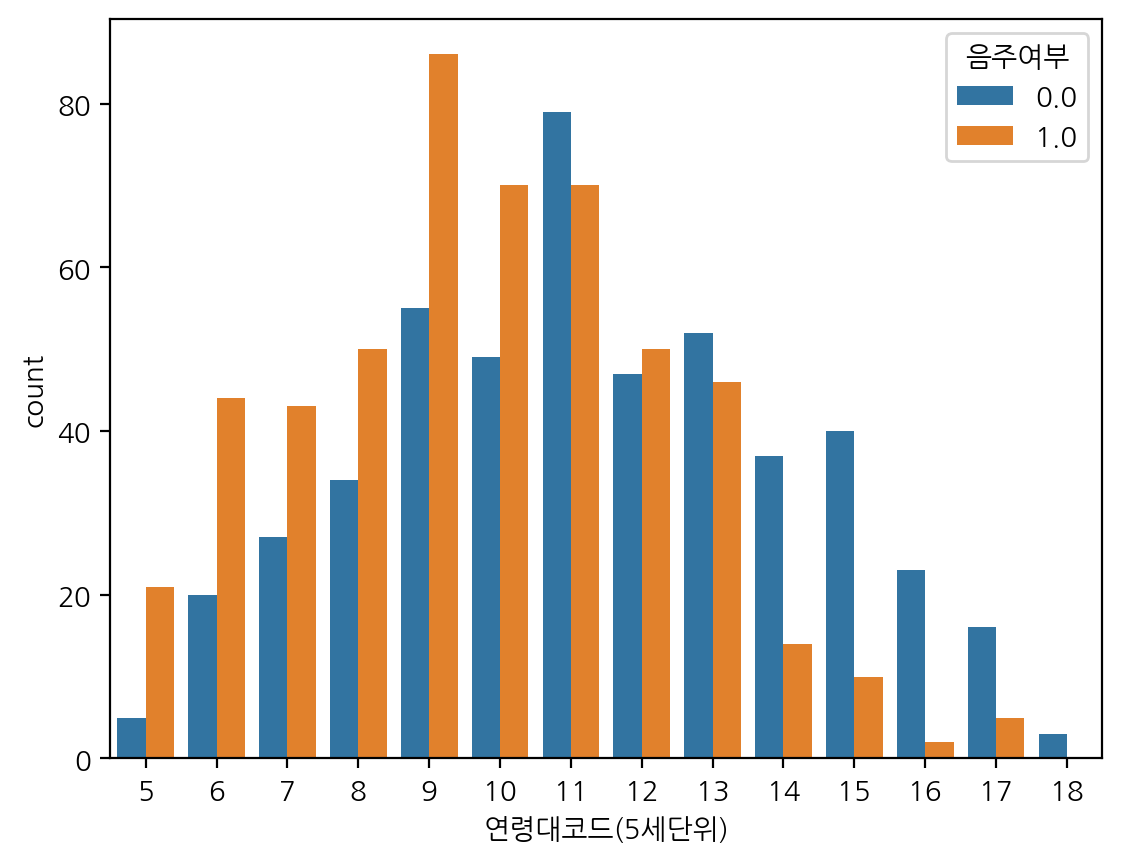

In [43]:
#연령대별 음주여부
sns.countplot(data=df,x="연령대코드(5세단위)", hue="음주여부")

<Axes: xlabel='신장(5Cm단위)', ylabel='count'>

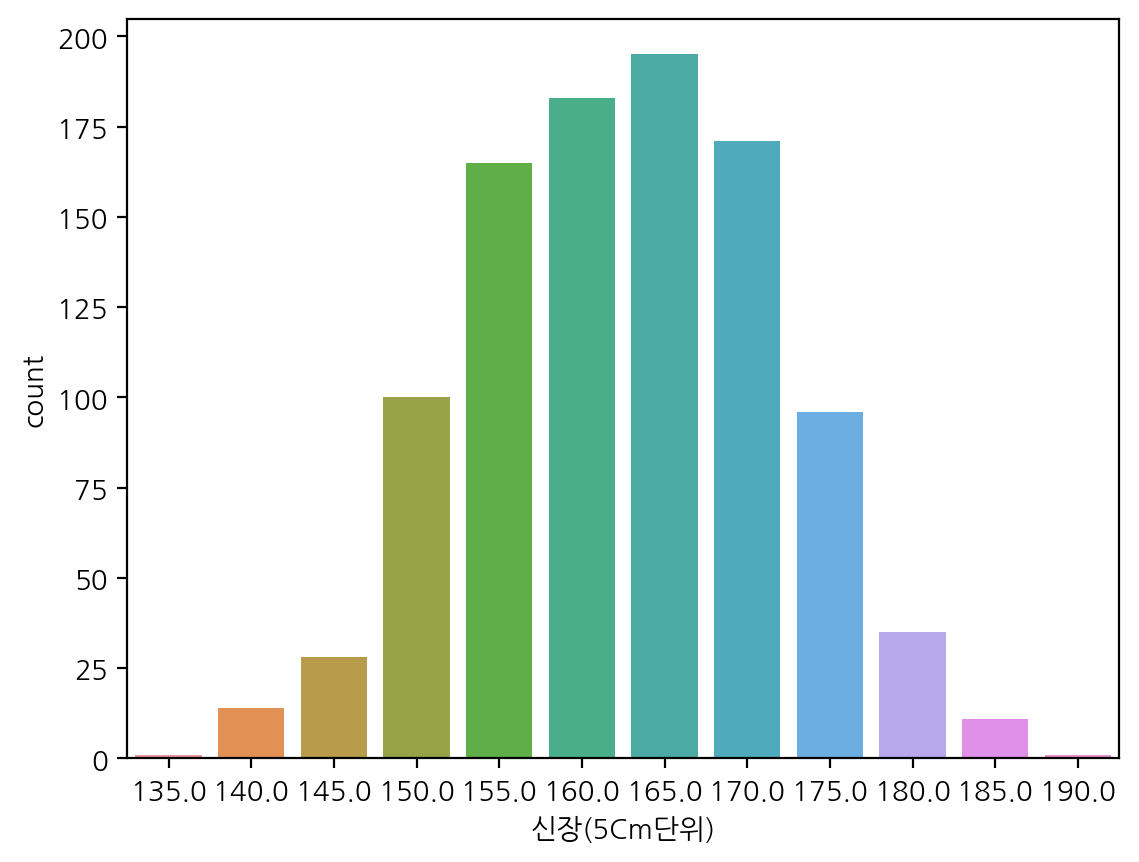

In [44]:
sns.countplot(data=df, x ="신장(5Cm단위)")

<Axes: xlabel='체중(5Kg 단위)', ylabel='count'>

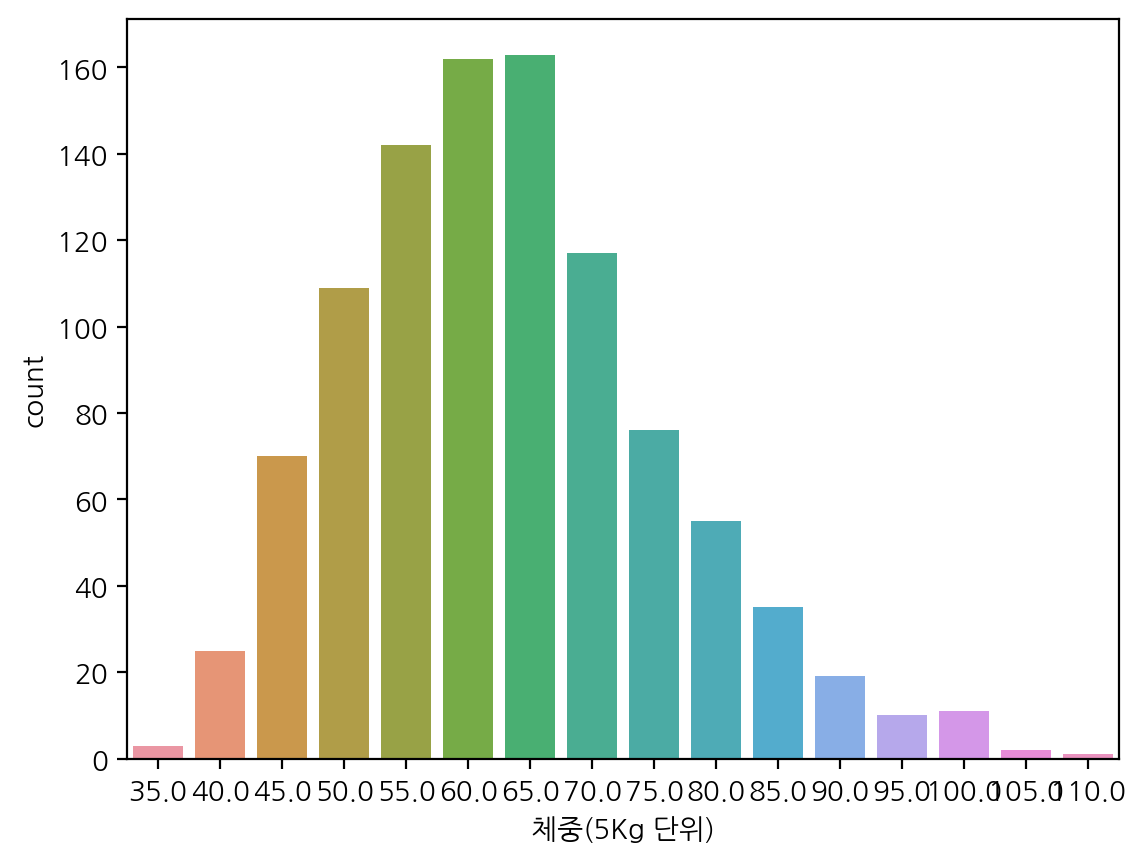

In [45]:
sns.countplot(data=df, x ="체중(5Kg 단위)")

<Axes: xlabel='체중(5Kg 단위)', ylabel='count'>

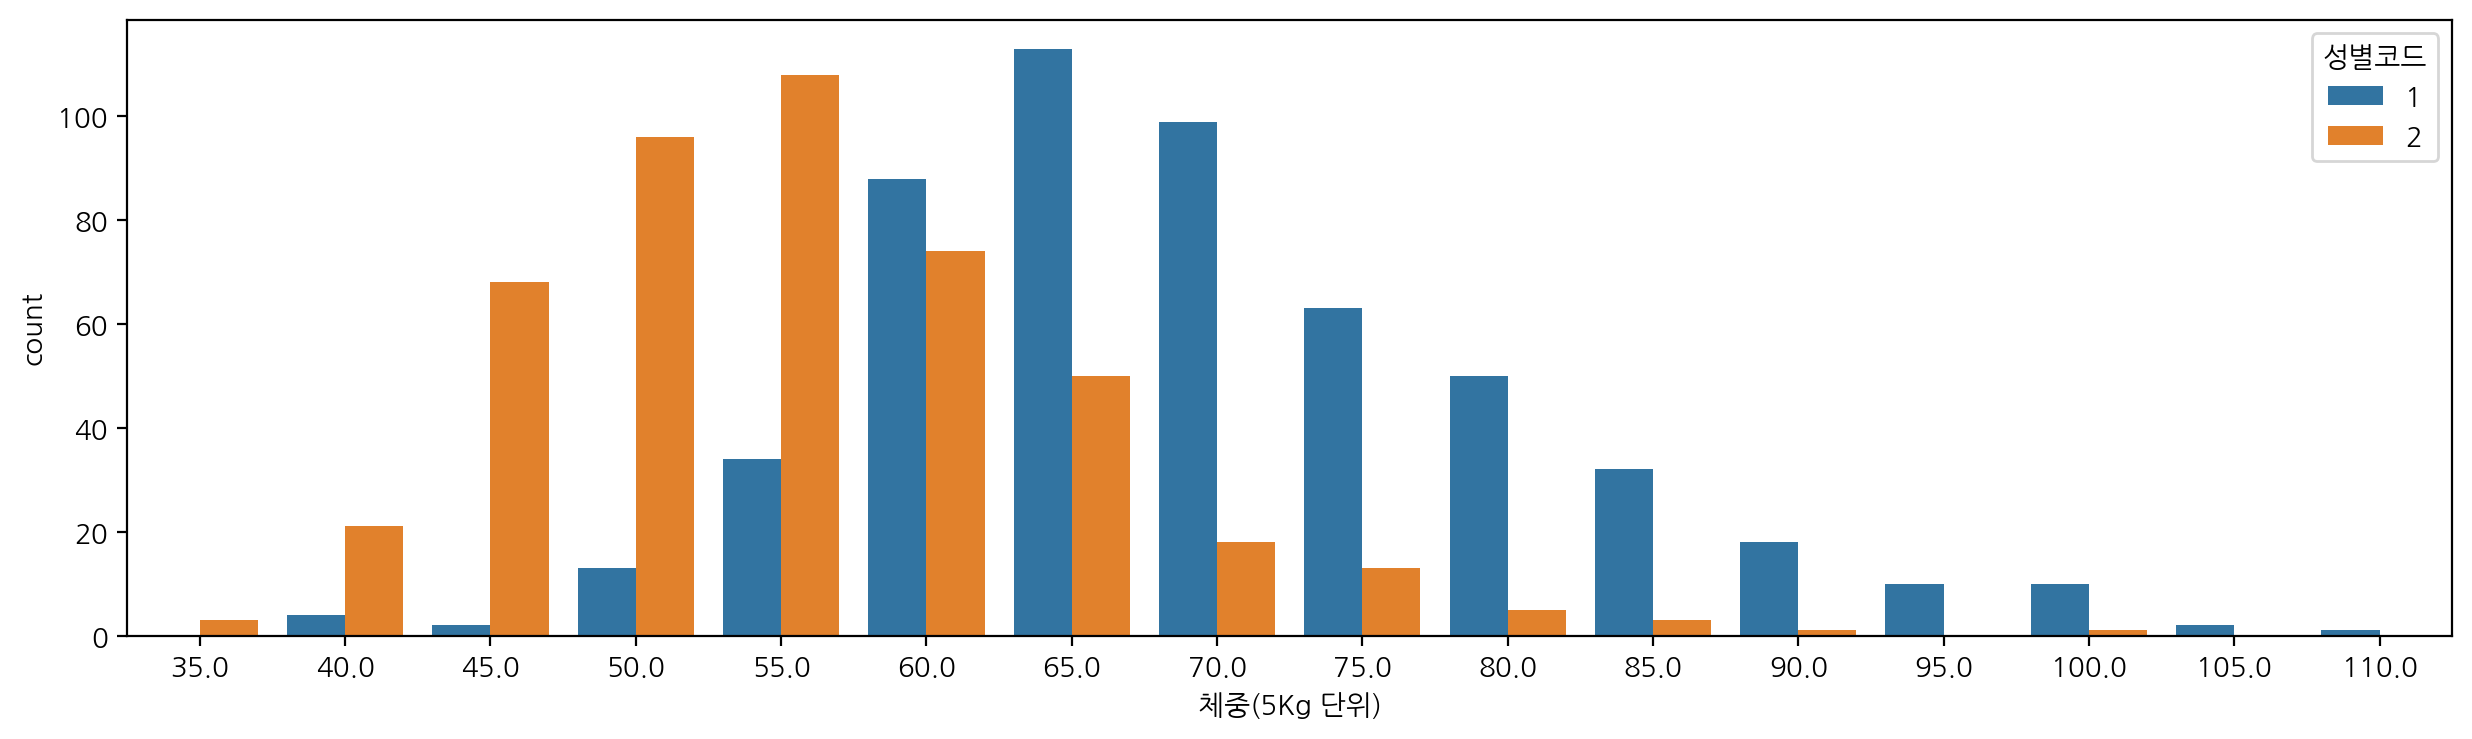

In [46]:
plt.figure(figsize=(15,4))
sns.countplot(data=df,x="체중(5Kg 단위)", hue="성별코드")

<Axes: xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

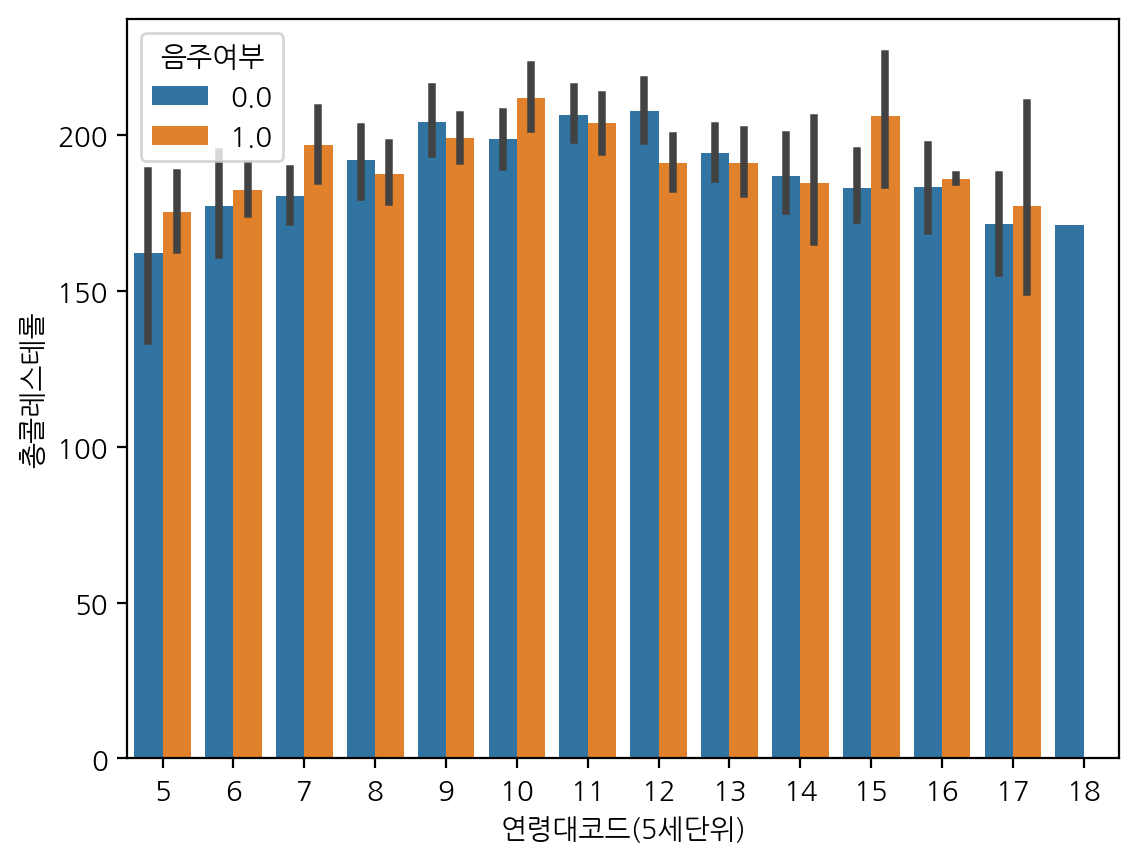

In [47]:
#@title barplot 수치형 VS 범주형 데이터 시각화
sns.barplot(data=df,x="연령대코드(5세단위)", y="총콜레스테롤",hue="음주여부")

<Axes: xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

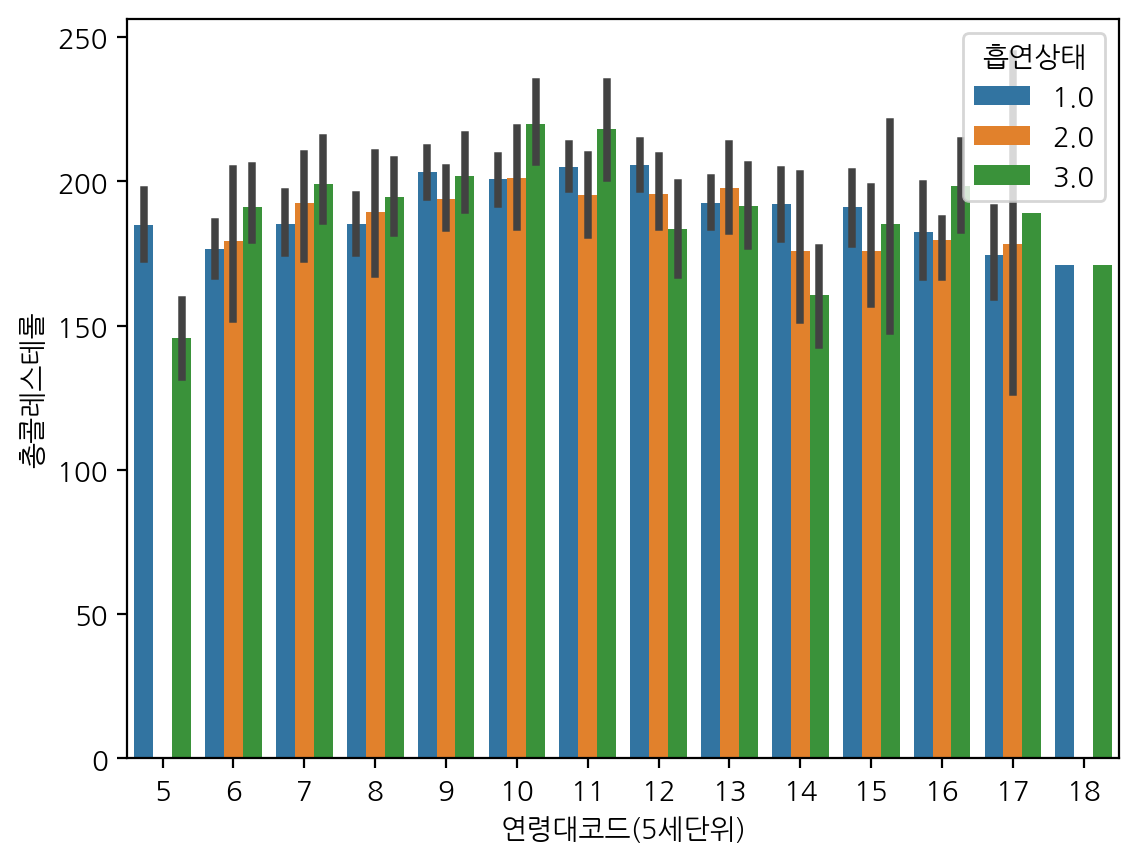

In [48]:
#@title barplot 수치형 VS 범주형 데이터 시각화
sns.barplot(data=df,x="연령대코드(5세단위)", y="총콜레스테롤",hue="흡연상태")

<Axes: xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

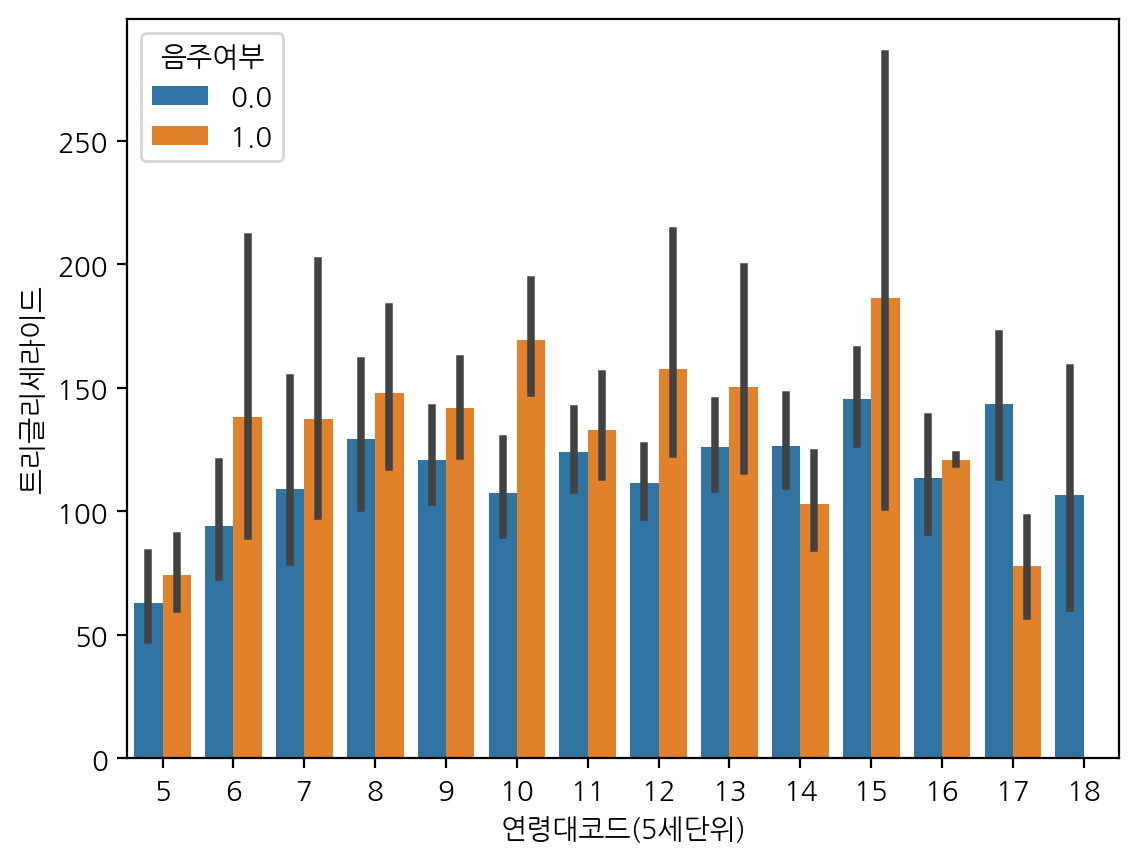

In [49]:
#트리글리세라이드 - 중성지방 ci는 신뢰구간 기본값 , 표준편차도 구할 수 있음
sns.barplot(data=df, x="연령대코드(5세단위)", y="트리글리세라이드", hue ="음주여부" )

<ipython-input-50-f0a095faeb71>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x="연령대코드(5세단위)", y="트리글리세라이드", hue ="음주여부",ci="sd" )


<Axes: xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

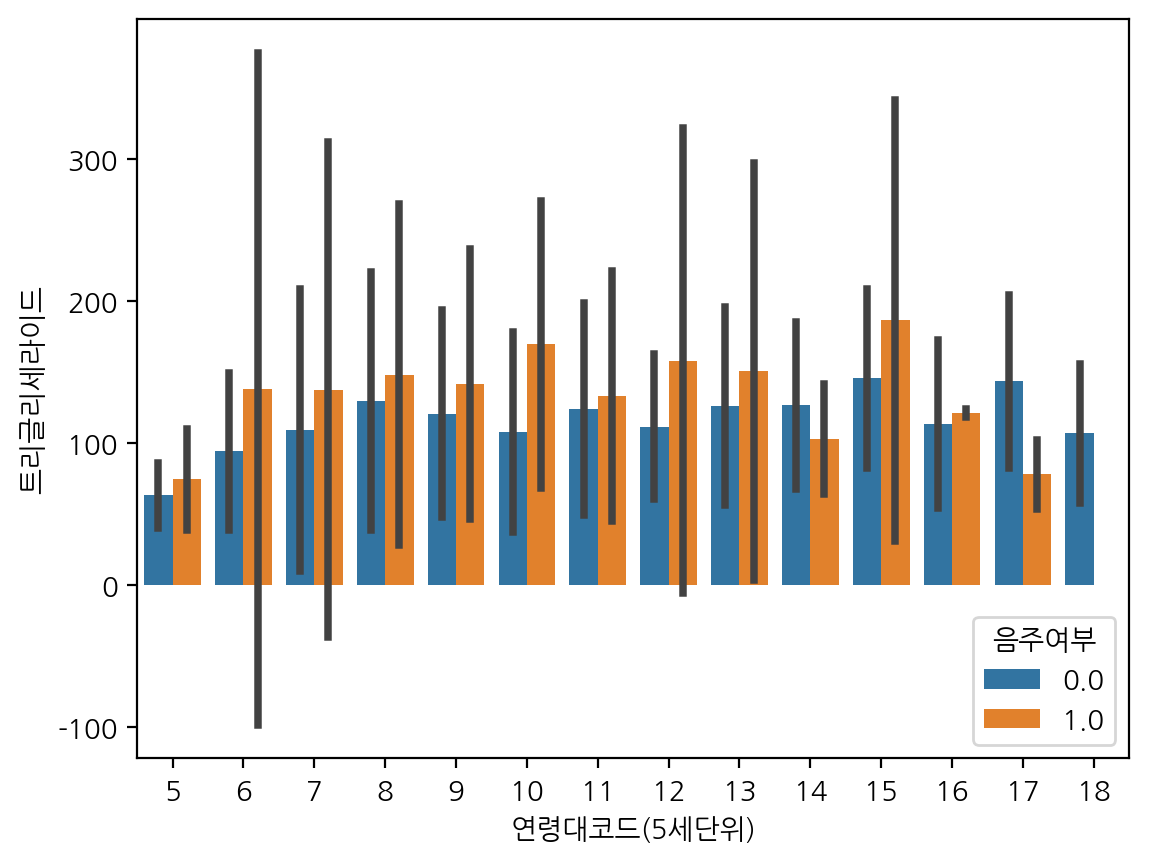

In [50]:
#트리글리세라이드 - 중성지방 ci표준편차도 구할 수 있음
sns.barplot(data=df, x="연령대코드(5세단위)", y="트리글리세라이드", hue ="음주여부",ci="sd" )

<Axes: xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

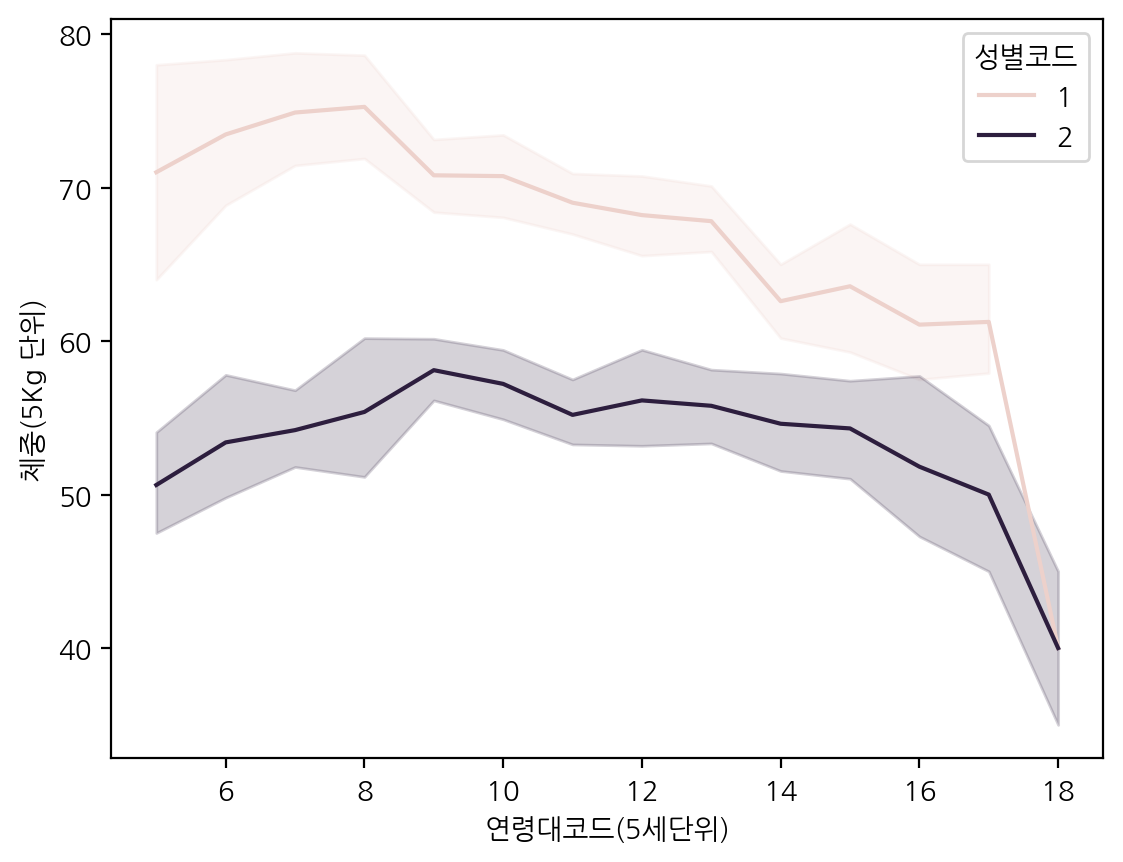

In [51]:
#@title line plot and point plot , 신뢰구간 나타냄 , 신뢰구간이 없는 구간은 모수가 부족한 부
sns.lineplot(data=df,x = "연령대코드(5세단위)", y="체중(5Kg 단위)",hue="성별코드")

<ipython-input-52-bfb151489285>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x= "연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci=None)


<Axes: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

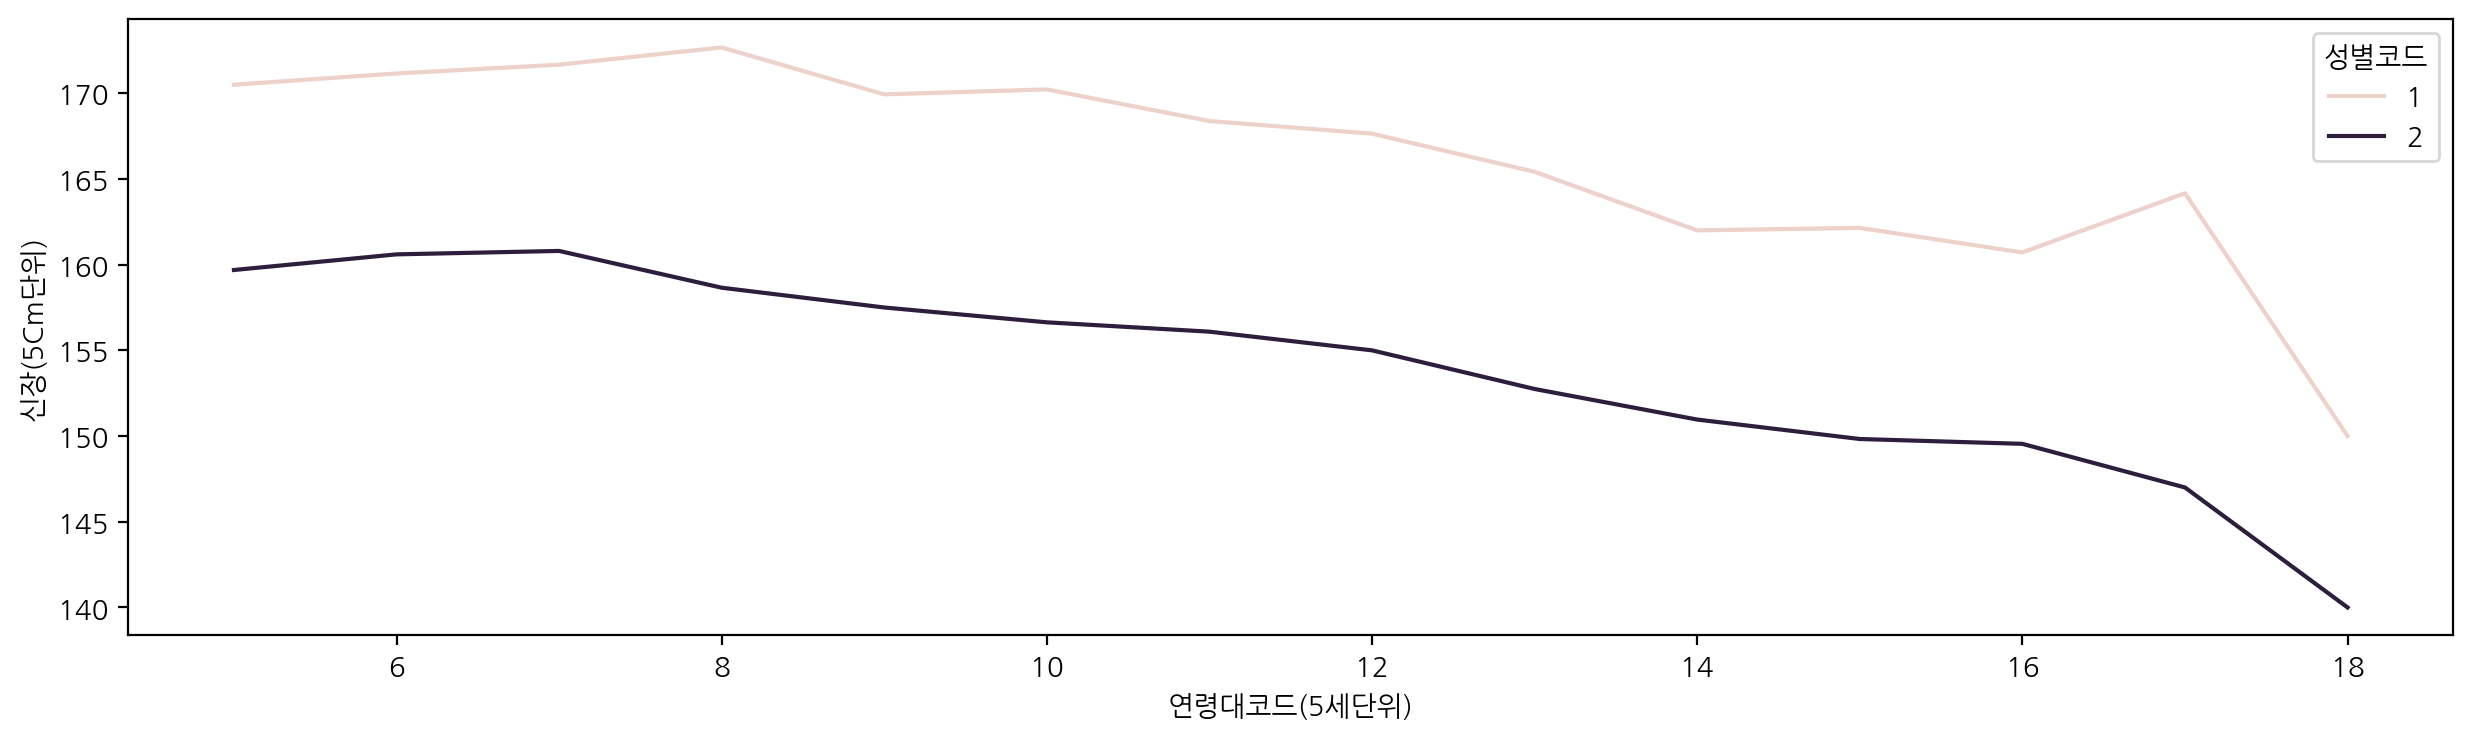

In [52]:
#@title 연령대 코드에 따른 신장을 성별 코드에 따라 line plot
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x= "연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci=None)

<Axes: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

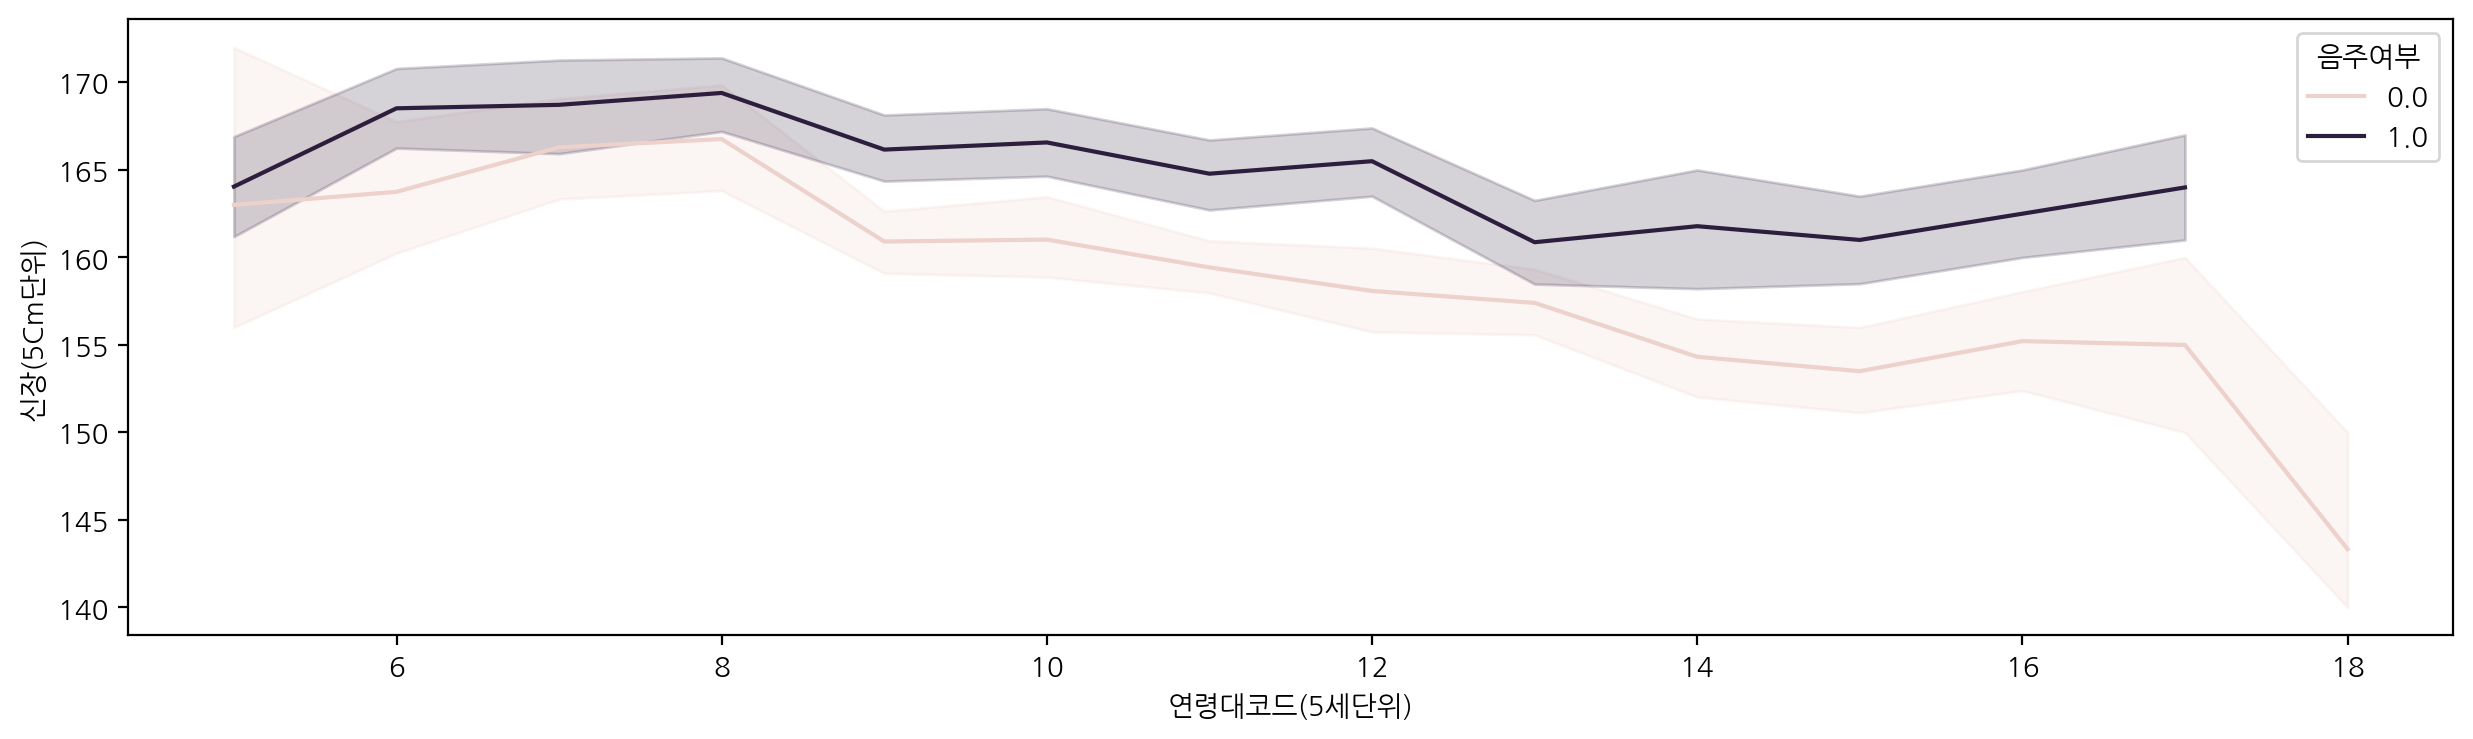

In [53]:
#@title 연령대 코드에 따른 신장을 음주여부 코드에 따라 line plot
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x= "연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부")

<ipython-input-54-7db1a8ac8f50>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, x= "연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci=None)


<Axes: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

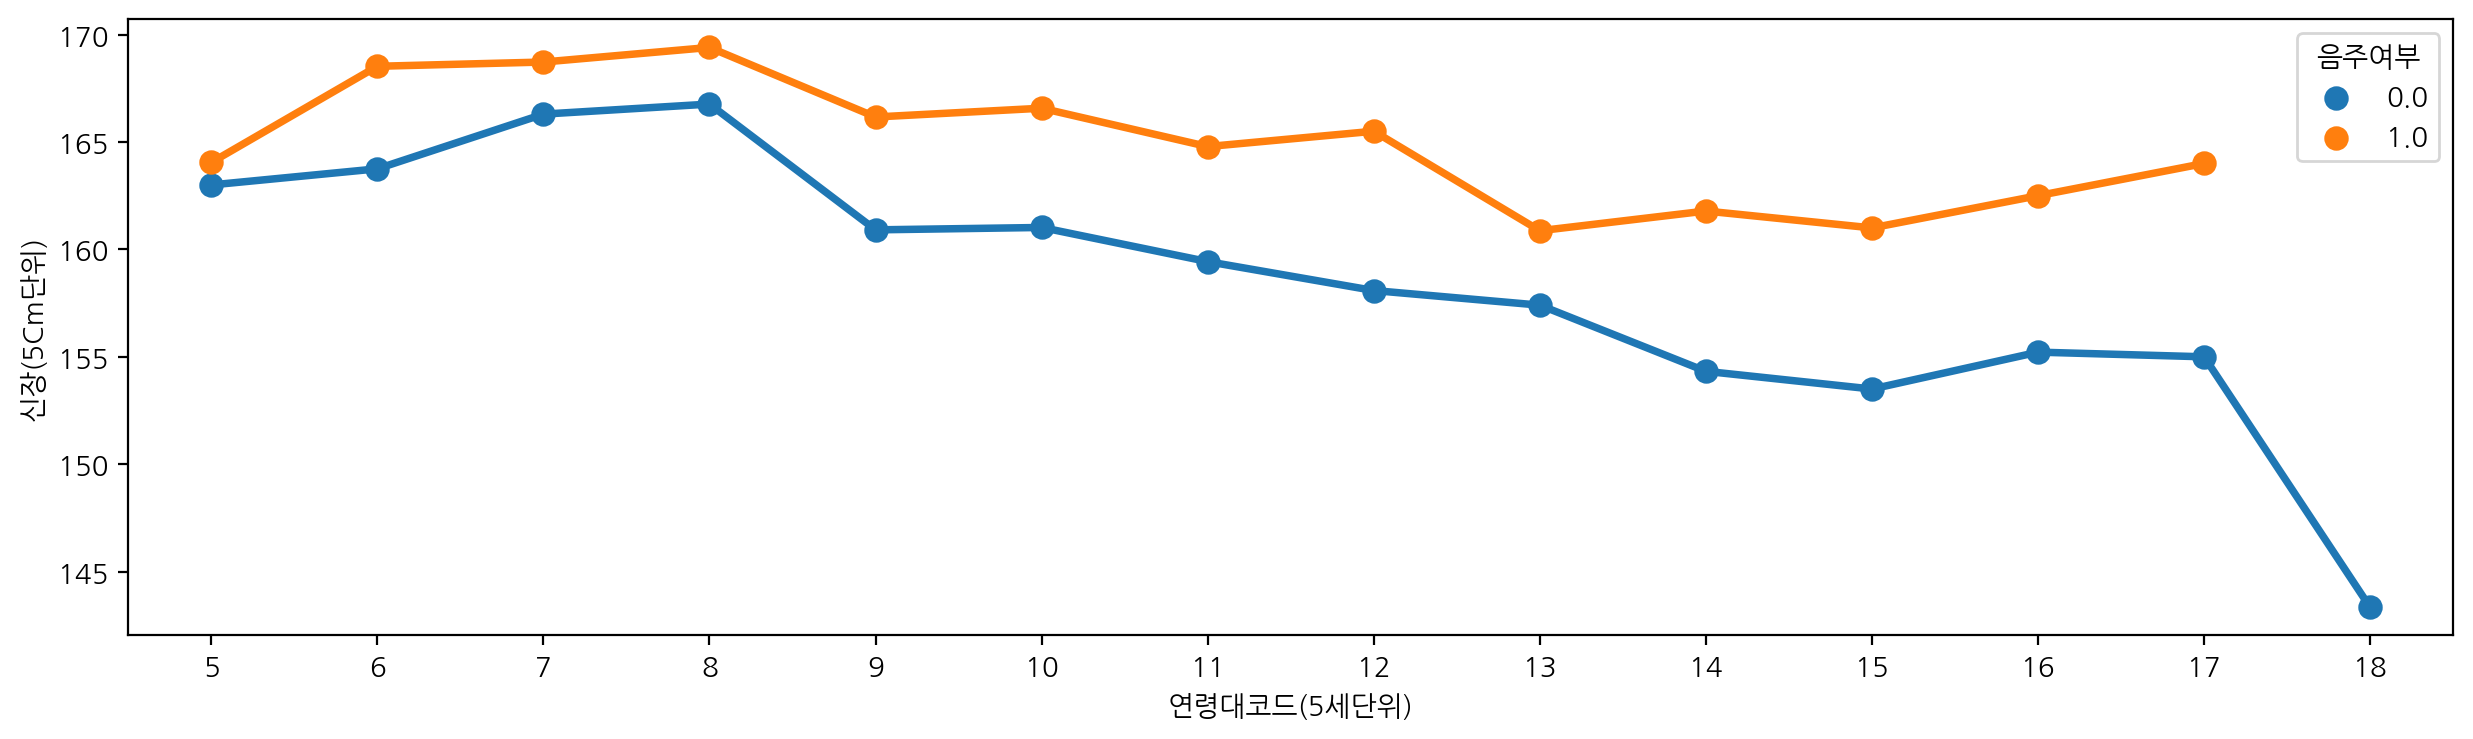

In [54]:
#@title 연령대 코드에 따른 신장을 음주여부 코드에 따라 line plot
plt.figure(figsize=(15,4))
sns.pointplot(data=df, x= "연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci=None)

<ipython-input-55-8cf541c6186a>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, x= "연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci=None)


<Axes: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

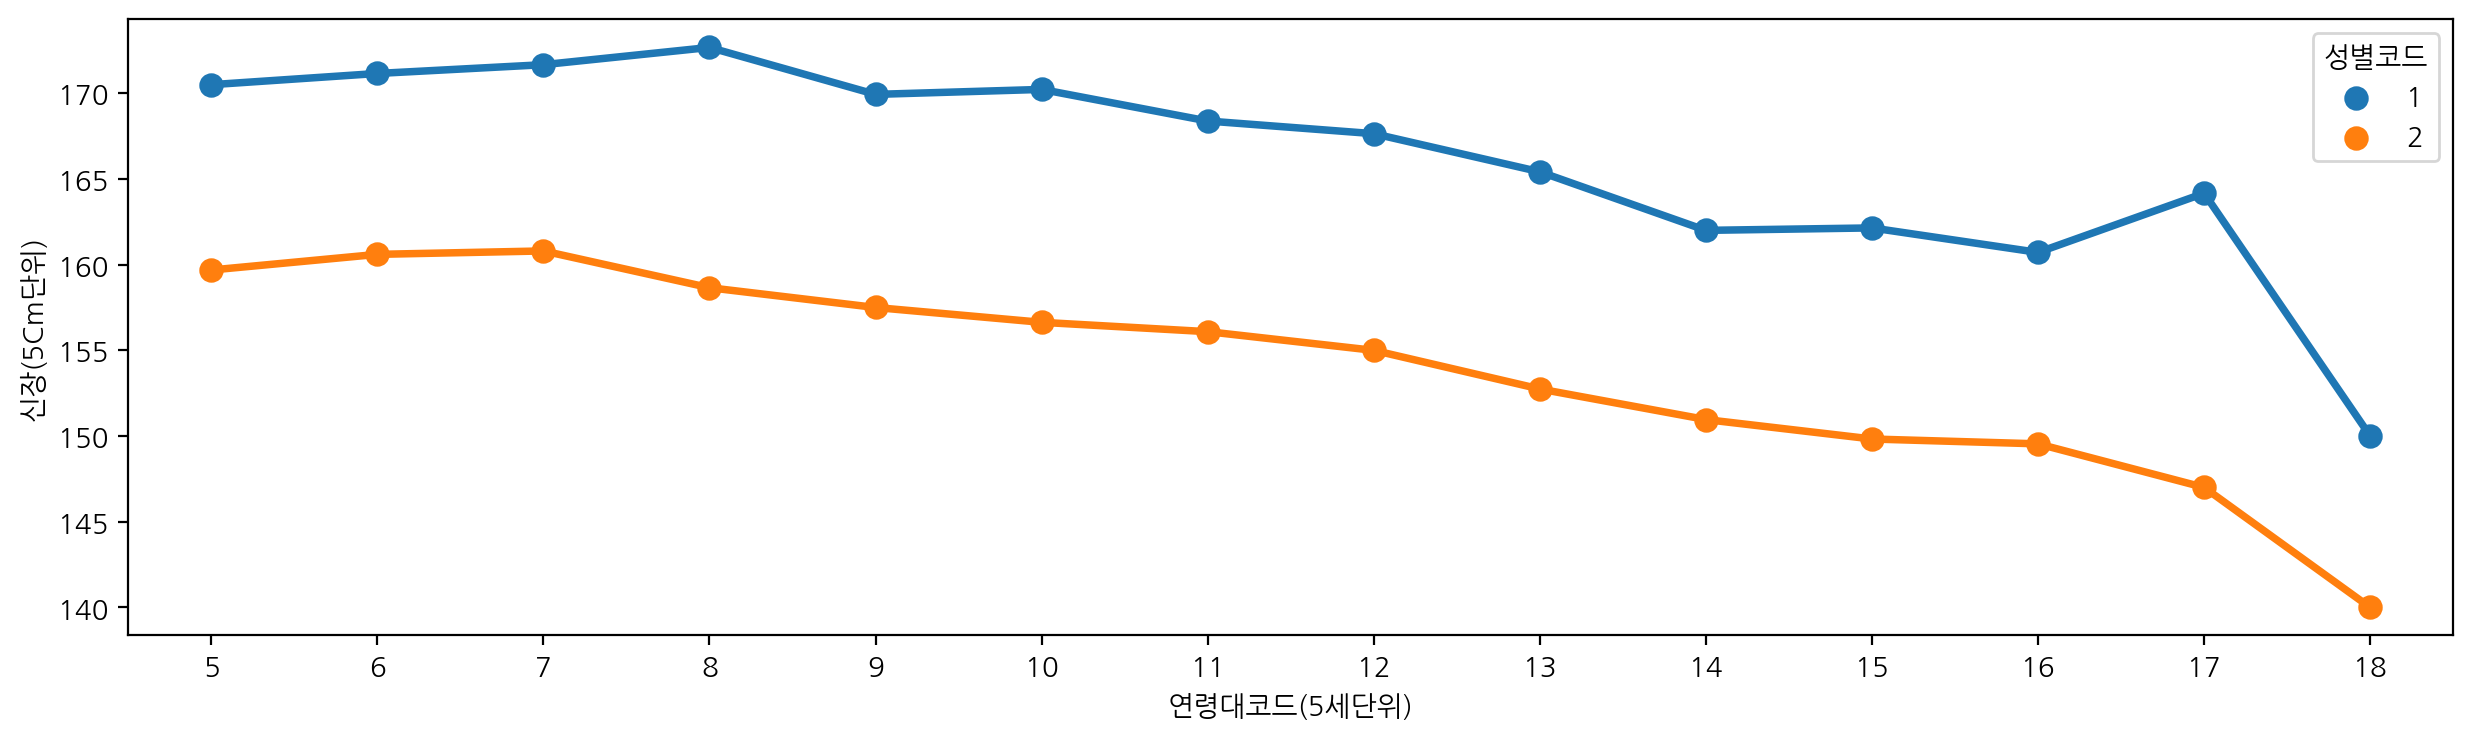

In [55]:
#@title 연령대 코드에 따른 신장을 성별 코드에 따라 line plot
plt.figure(figsize=(15,4))
sns.pointplot(data=df, x= "연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci=None)

<ipython-input-56-cc6fd1b32097>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x= "연령대코드(5세단위)", y="혈색소", ci=None)


<Axes: xlabel='연령대코드(5세단위)', ylabel='혈색소'>

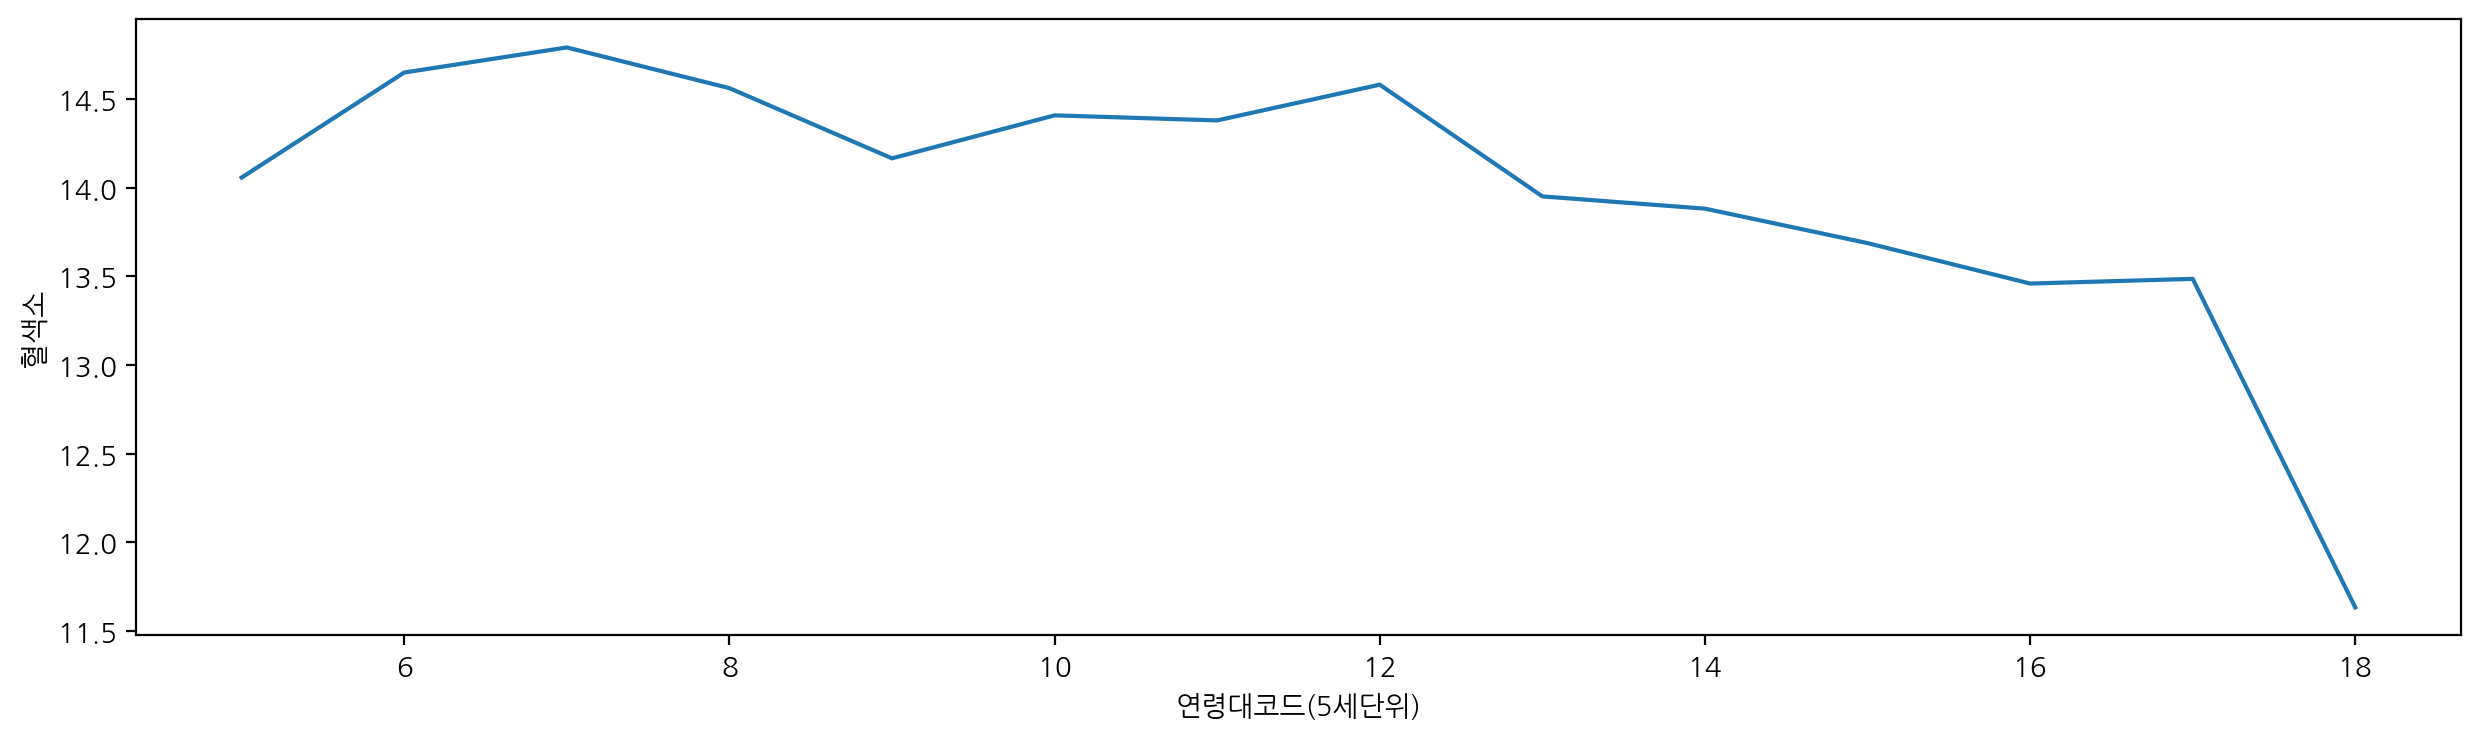

In [56]:
#@title 연령대 코드에 따른 혈색소 line plot
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x= "연령대코드(5세단위)", y="혈색소", ci=None)

<Axes: xlabel='연령대코드(5세단위)', ylabel='혈색소'>

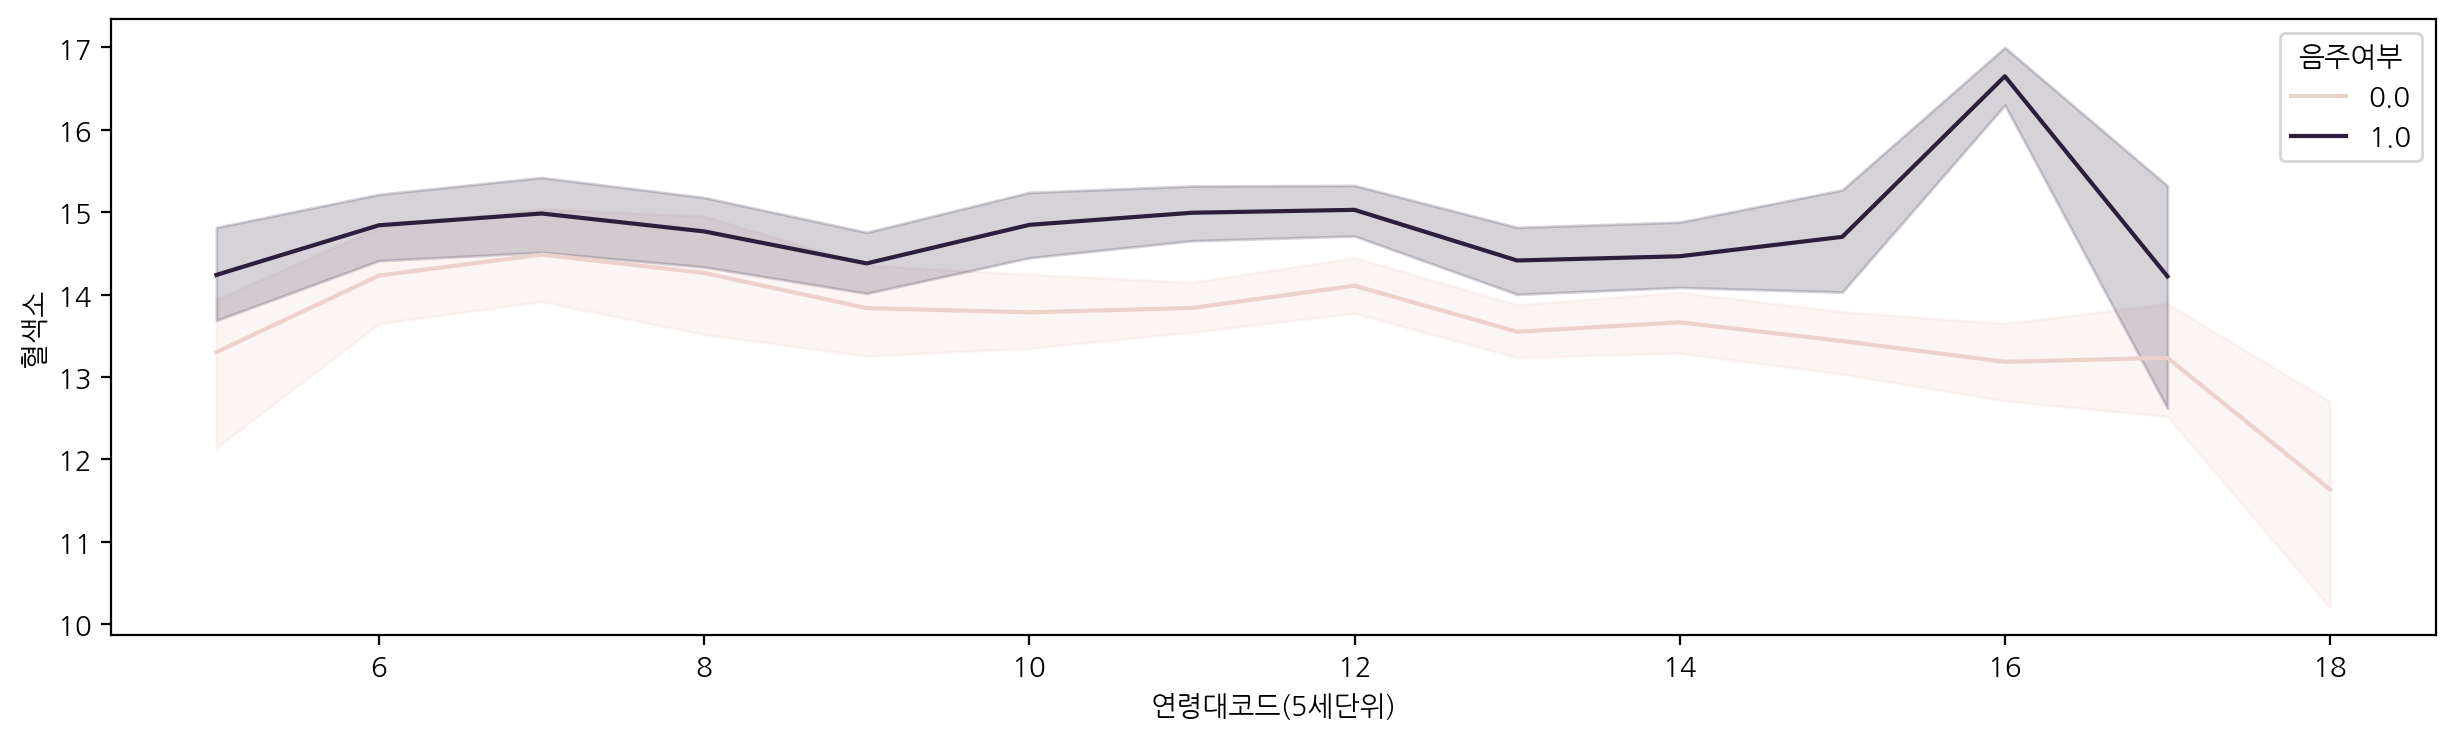

In [57]:
#@title 연령대 코드에 따른 혈색소를 음주여부 코드에 따라 line plot
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x= "연령대코드(5세단위)", y="혈색소",hue="음주여부")

<ipython-input-58-91c0224959e5>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df ,x ="연령대코드(5세단위)", y="혈색소",hue= "음주여부", ci =None)


<Axes: xlabel='연령대코드(5세단위)', ylabel='혈색소'>

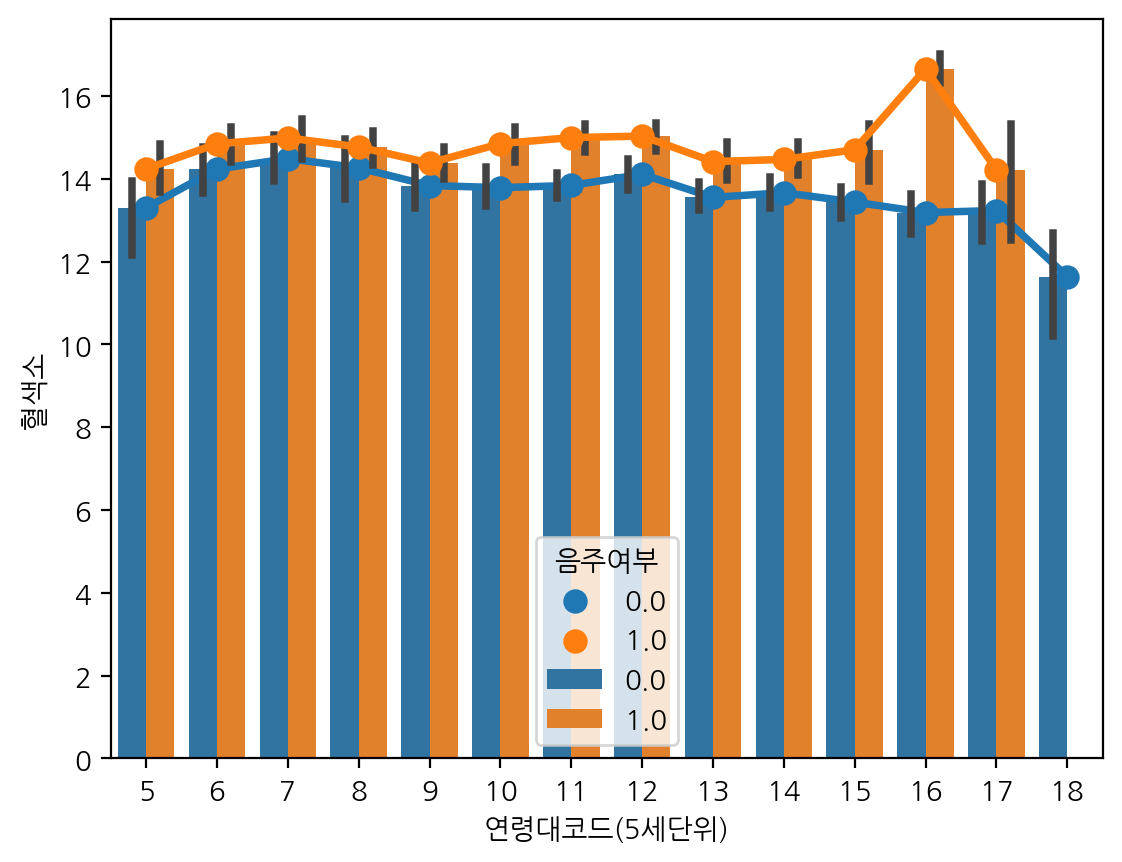

In [58]:
sns.barplot(data=df ,x ="연령대코드(5세단위)", y="혈색소",hue= "음주여부")
sns.pointplot(data=df ,x ="연령대코드(5세단위)", y="혈색소",hue= "음주여부", ci =None)

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

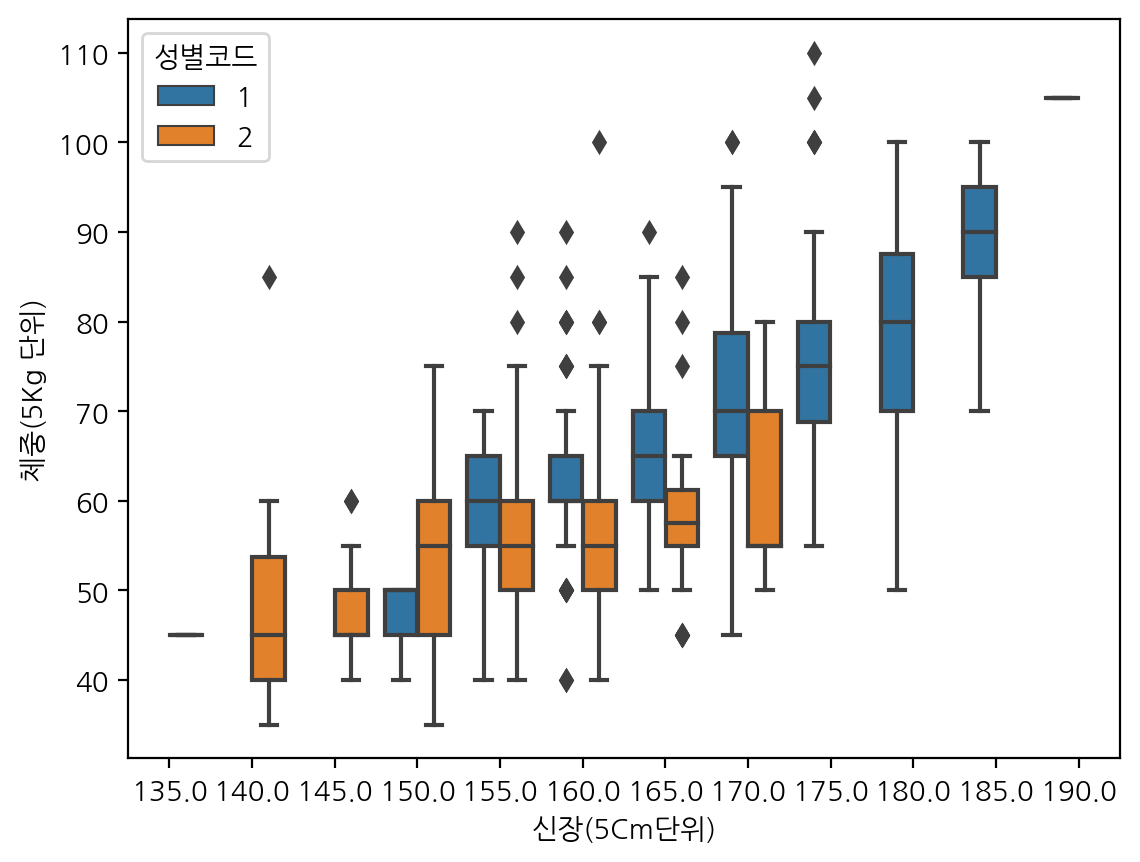

In [59]:
#@title box plot
sns.boxplot(data=df,x = "신장(5Cm단위)" ,y = "체중(5Kg 단위)", hue="성별코드")

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

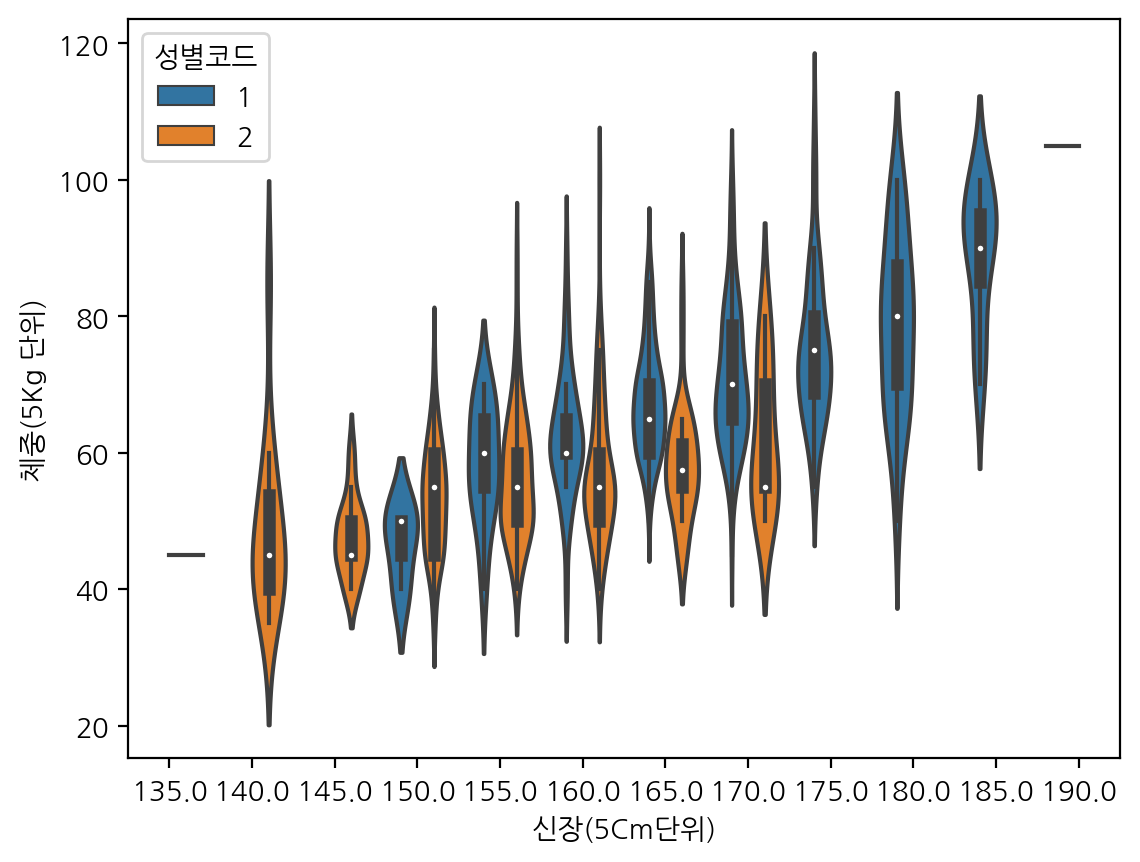

In [60]:
#@title 바이올린 플롯
sns.violinplot(data=df,x = "신장(5Cm단위)" ,y = "체중(5Kg 단위)", hue="성별코드")

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

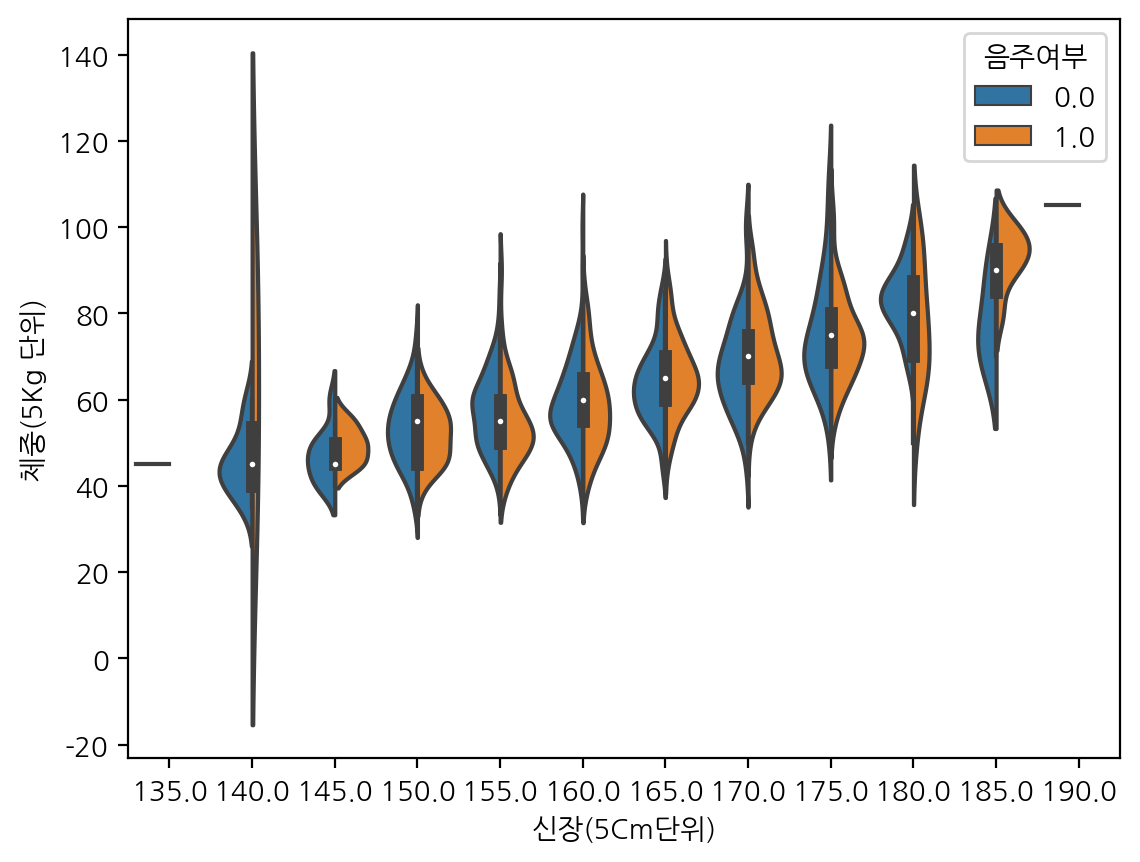

In [61]:
sns.violinplot(data=df,x = "신장(5Cm단위)" ,y = "체중(5Kg 단위)", hue="음주여부",split=True)

<Axes: xlabel='연령대코드(5세단위)', ylabel='혈색소'>

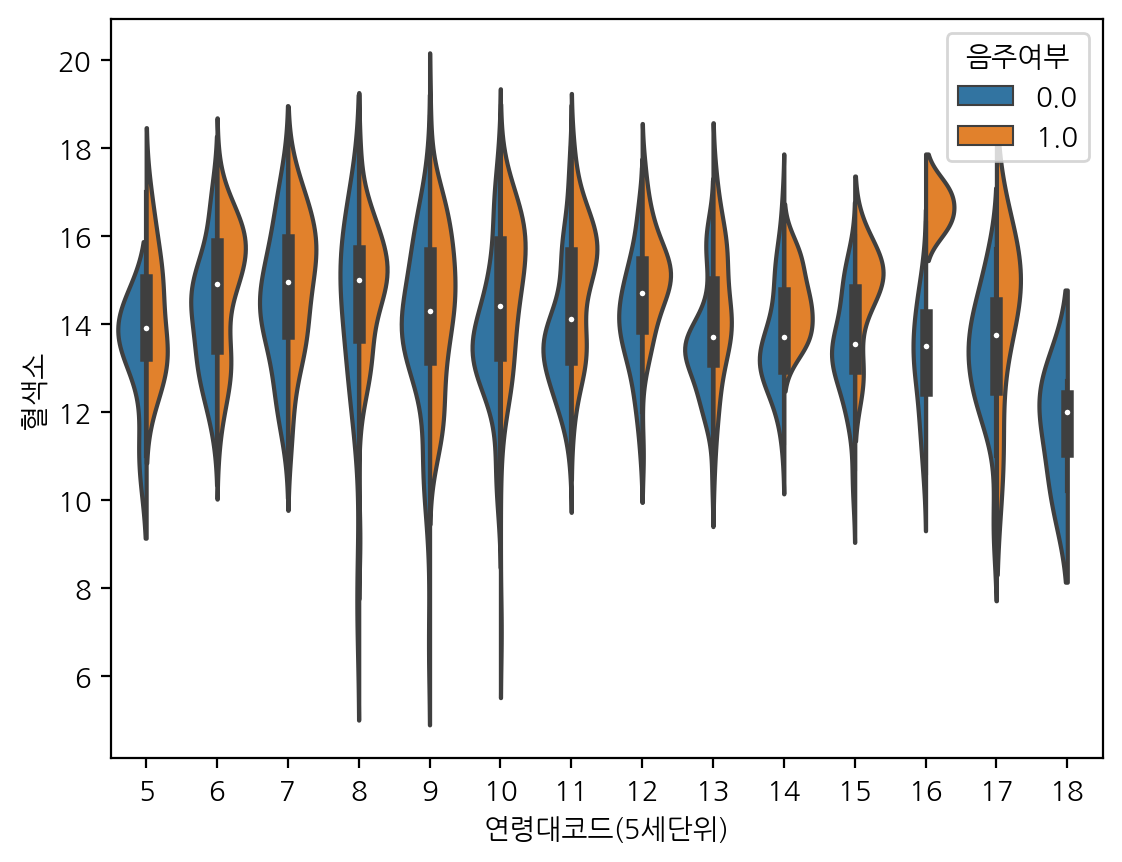

In [62]:
# 하얀색은 median 값 이다
sns.violinplot(data=df,x = "연령대코드(5세단위)" ,y = "혈색소", hue="음주여부",split=True)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 12.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='연령대코드(5세단위)', ylabel='혈색소'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


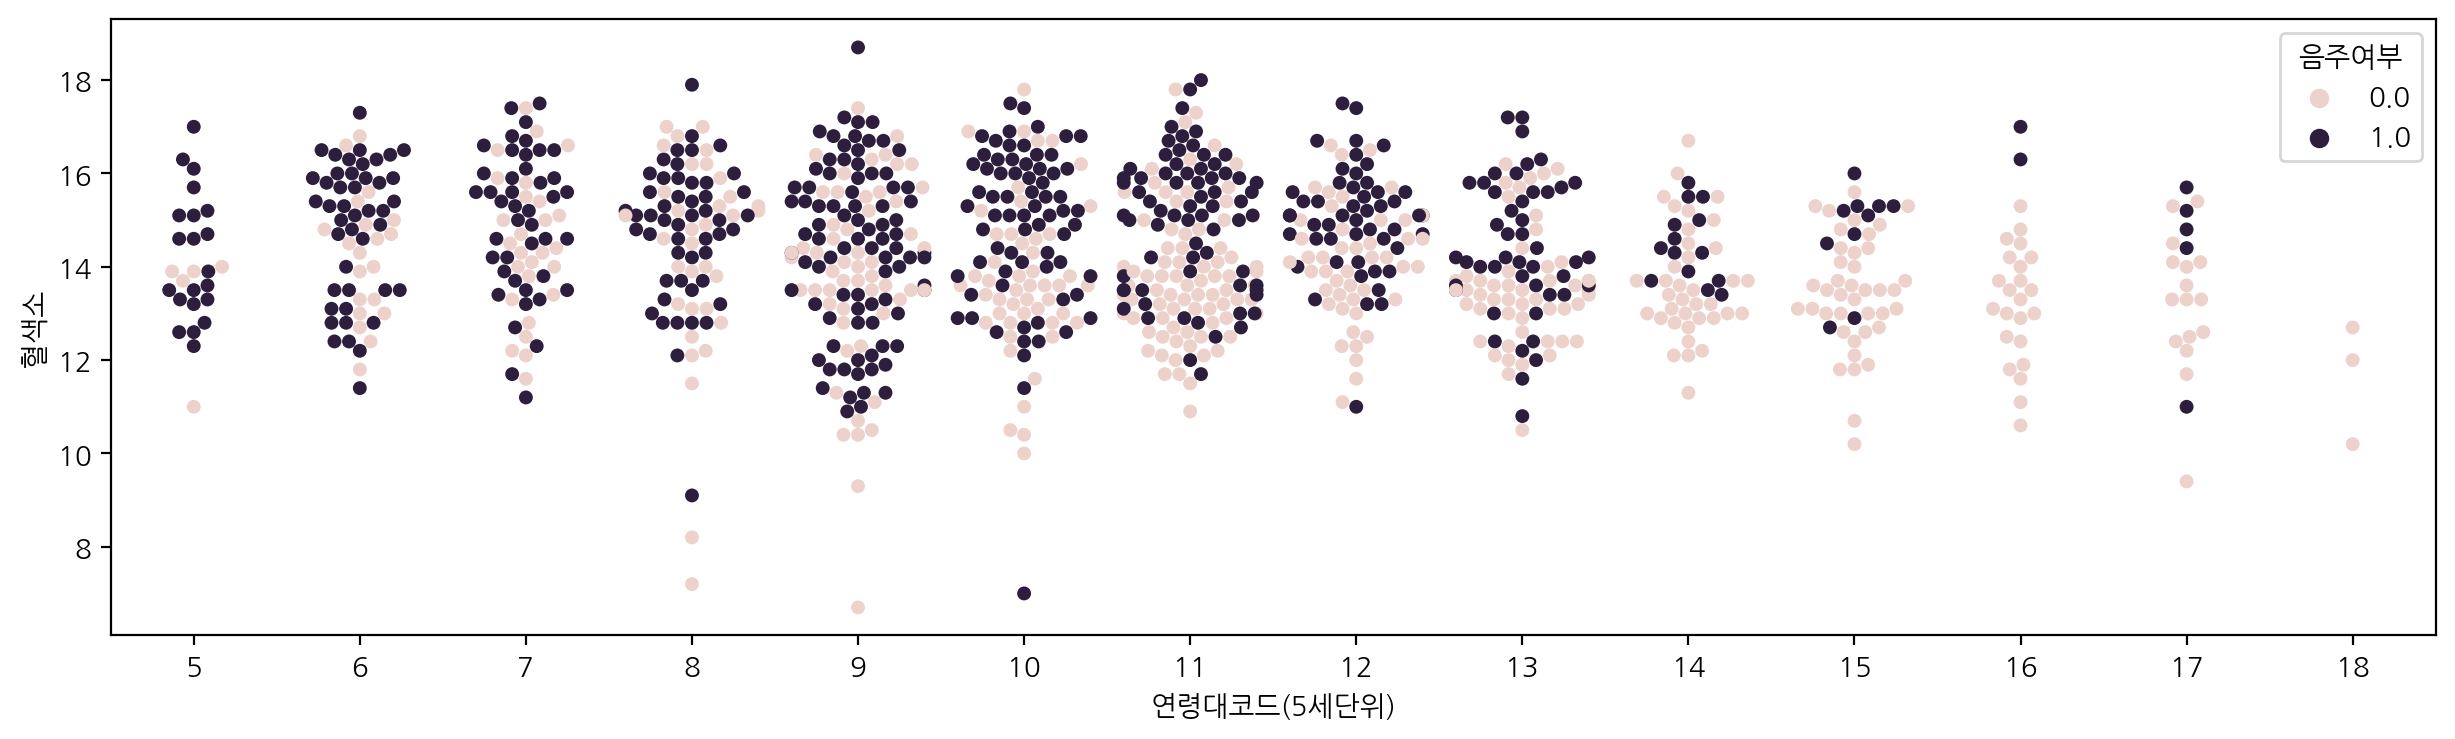

In [63]:
#@title swarmplot
plt.figure(figsize =(15,4))
sns.swarmplot(data=df,x = "연령대코드(5세단위)" ,y = "혈색소", hue="음주여부")

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 43.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 32.8% of the points cannot be placed;

<Axes: xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

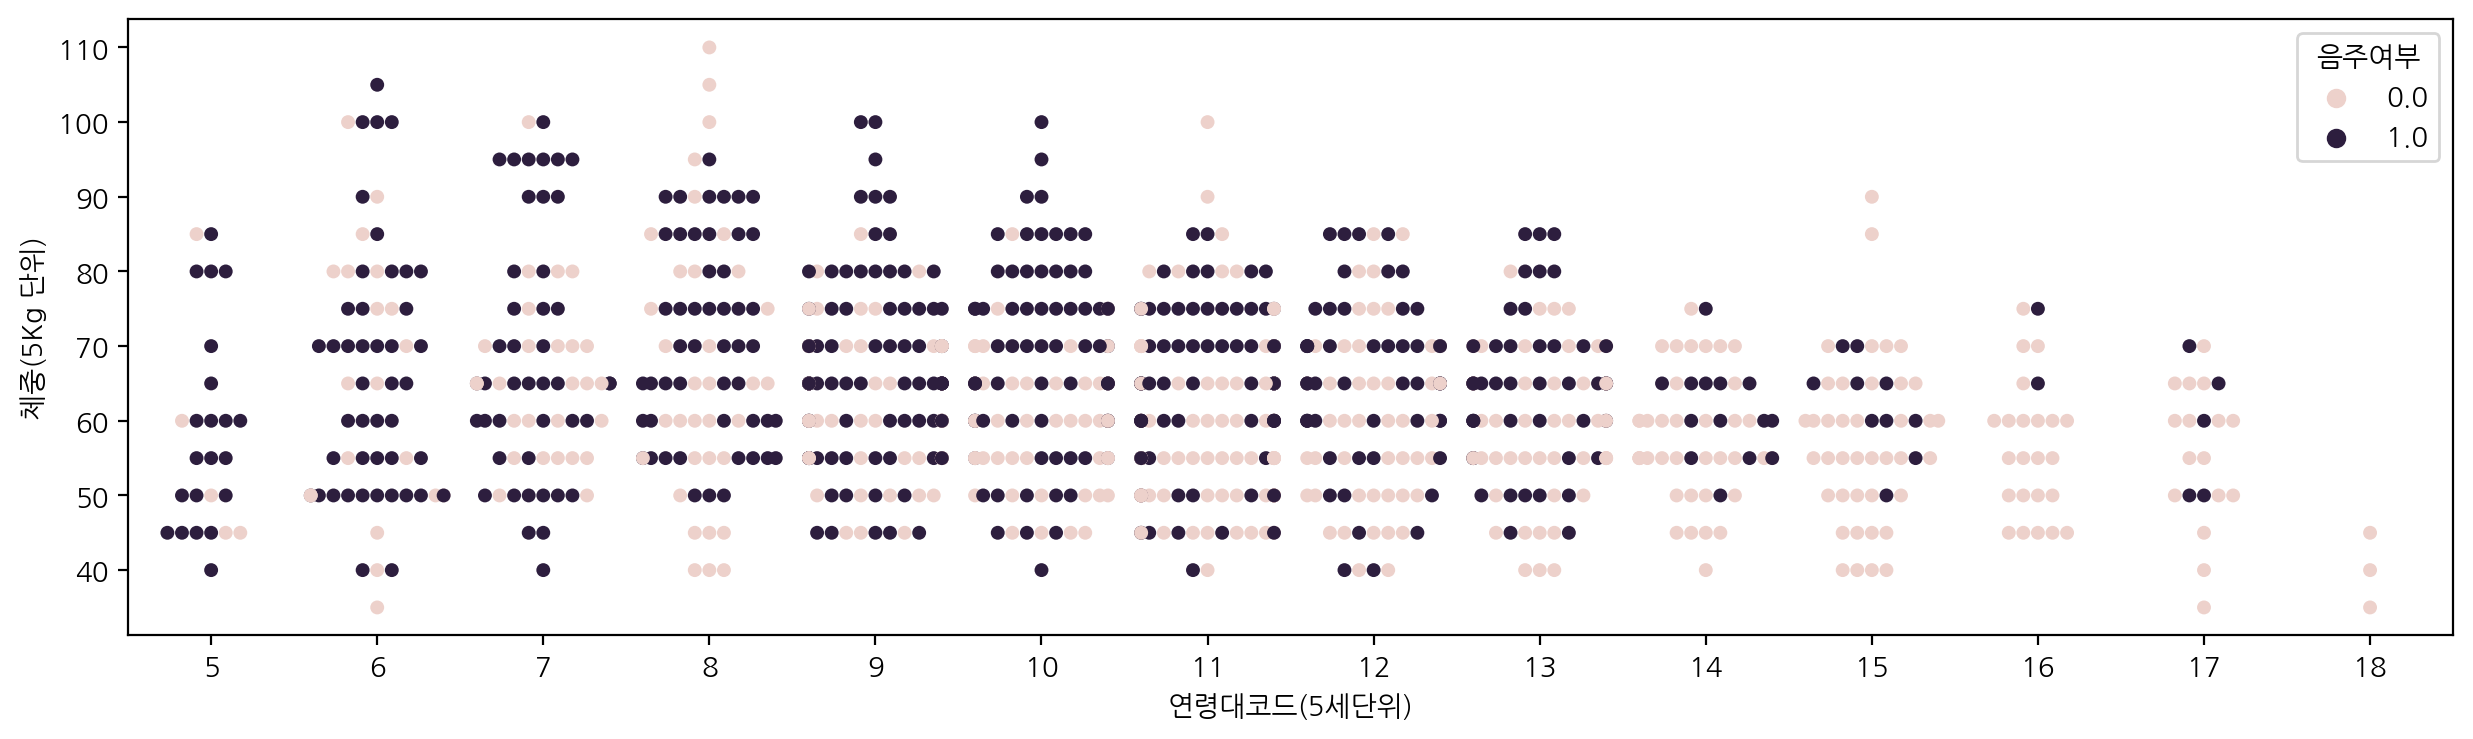

In [64]:
plt.figure(figsize =(15,4))
sns.swarmplot(data=df,x = "연령대코드(5세단위)" ,y = "체중(5Kg 단위)", hue="음주여부")

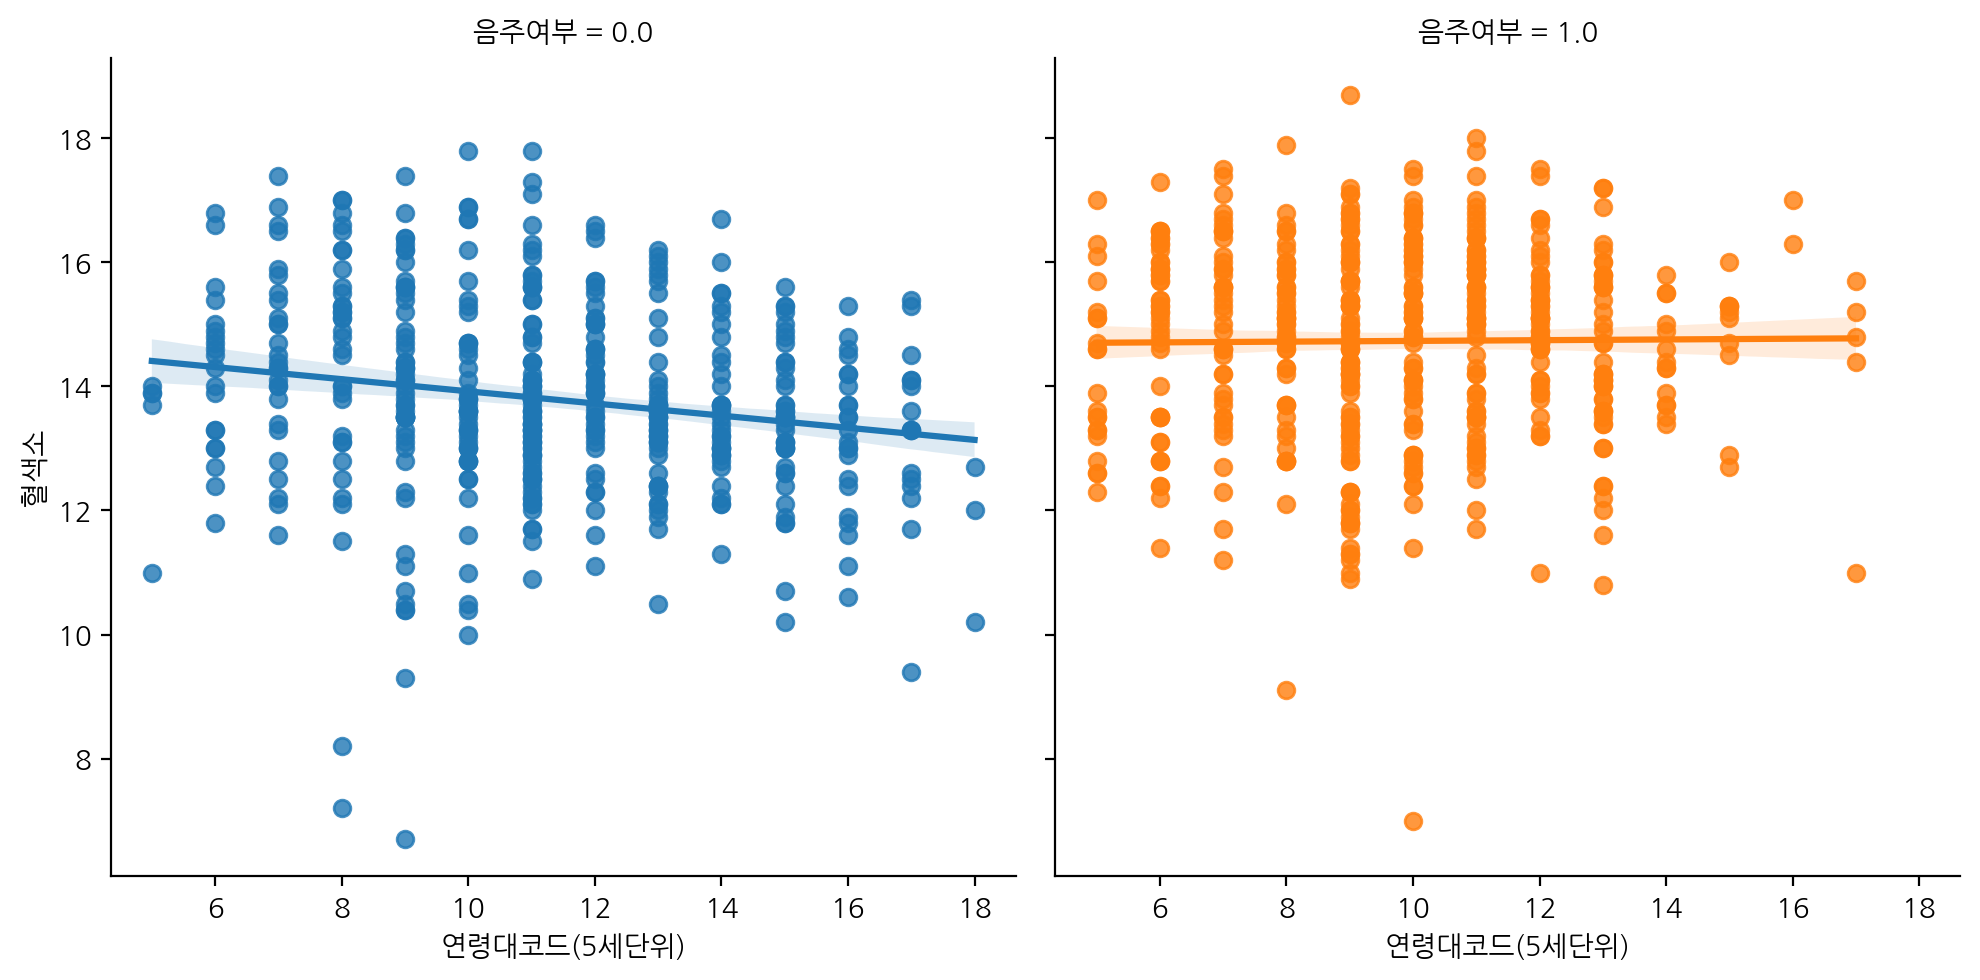

In [65]:
#@title 다변수 및 회귀 분석에 용이한 lmplot
sns.lmplot(data=df,x = "연령대코드(5세단위)" ,y = "혈색소", hue="음주여부",col="음주여부")

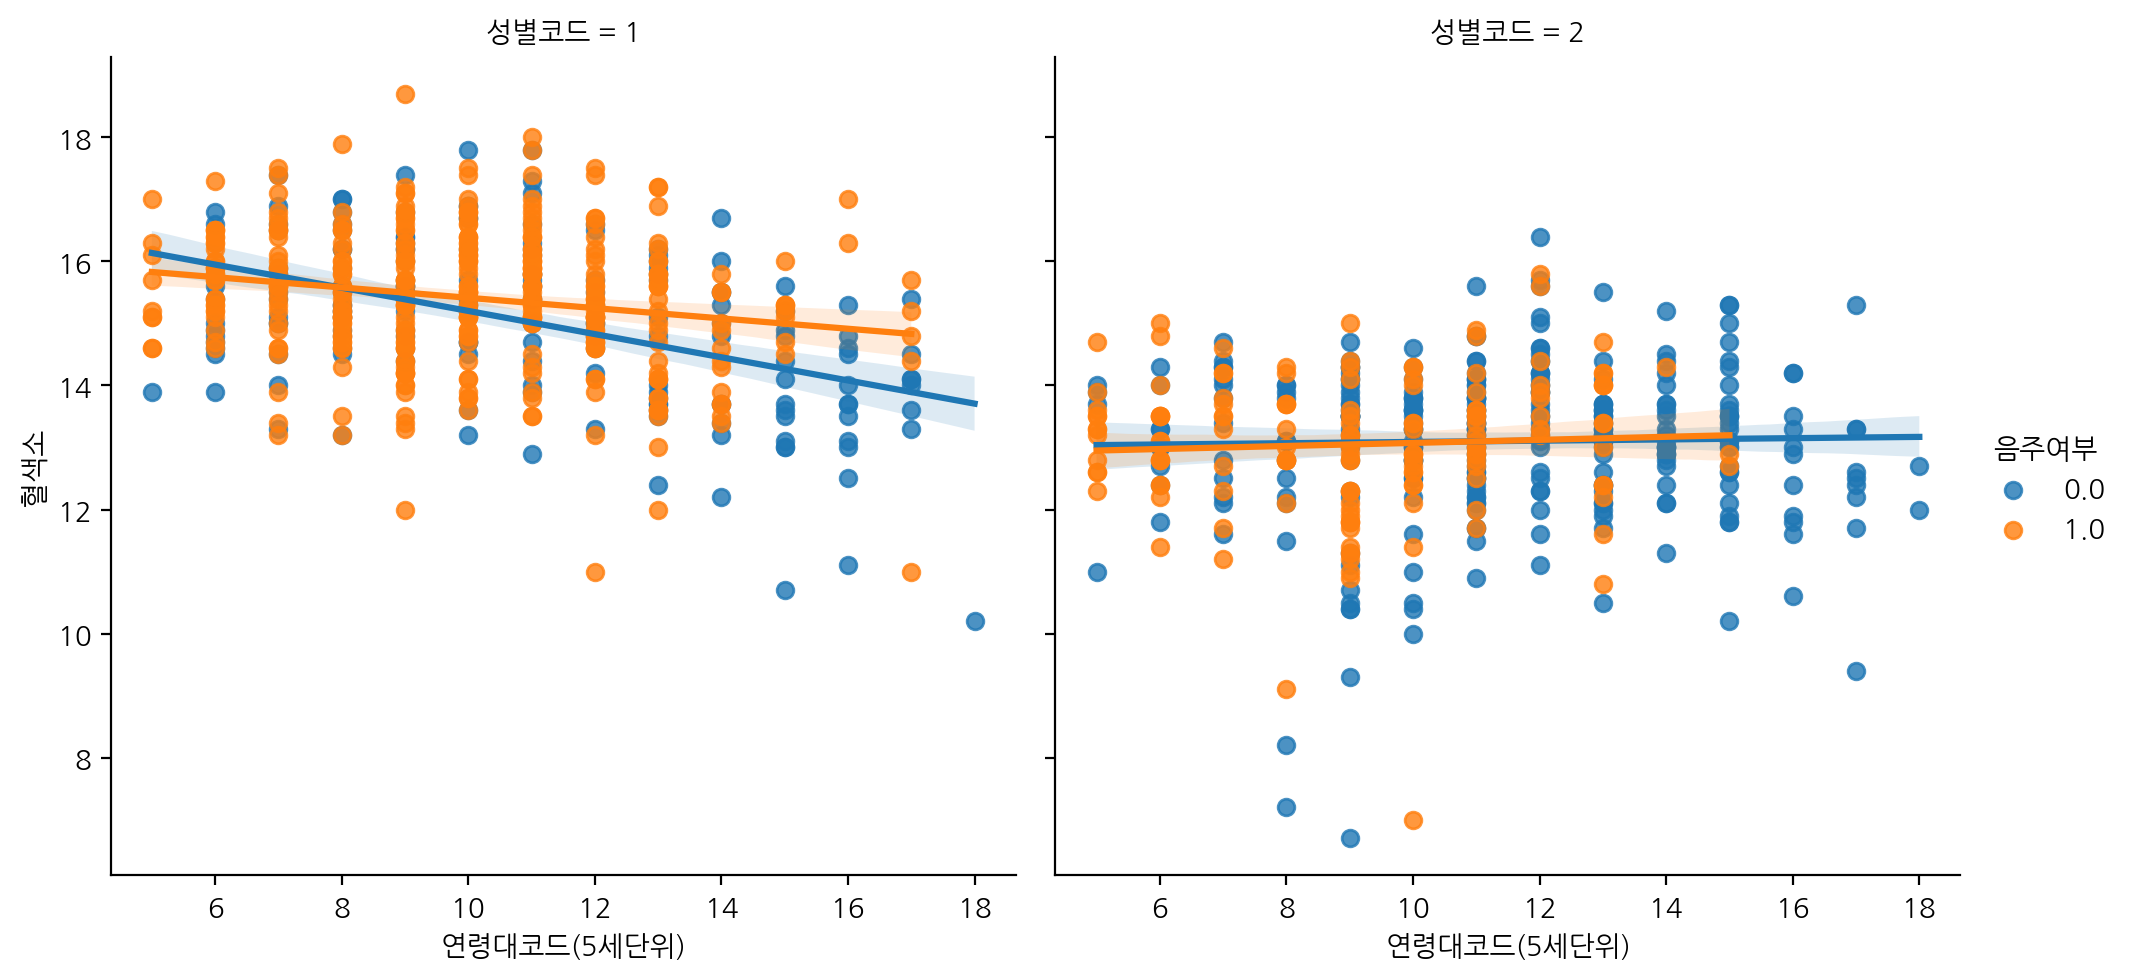

In [66]:
sns.lmplot(data=df,x = "연령대코드(5세단위)" ,y = "혈색소", hue="음주여부",col="성별코드")

<Axes: xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

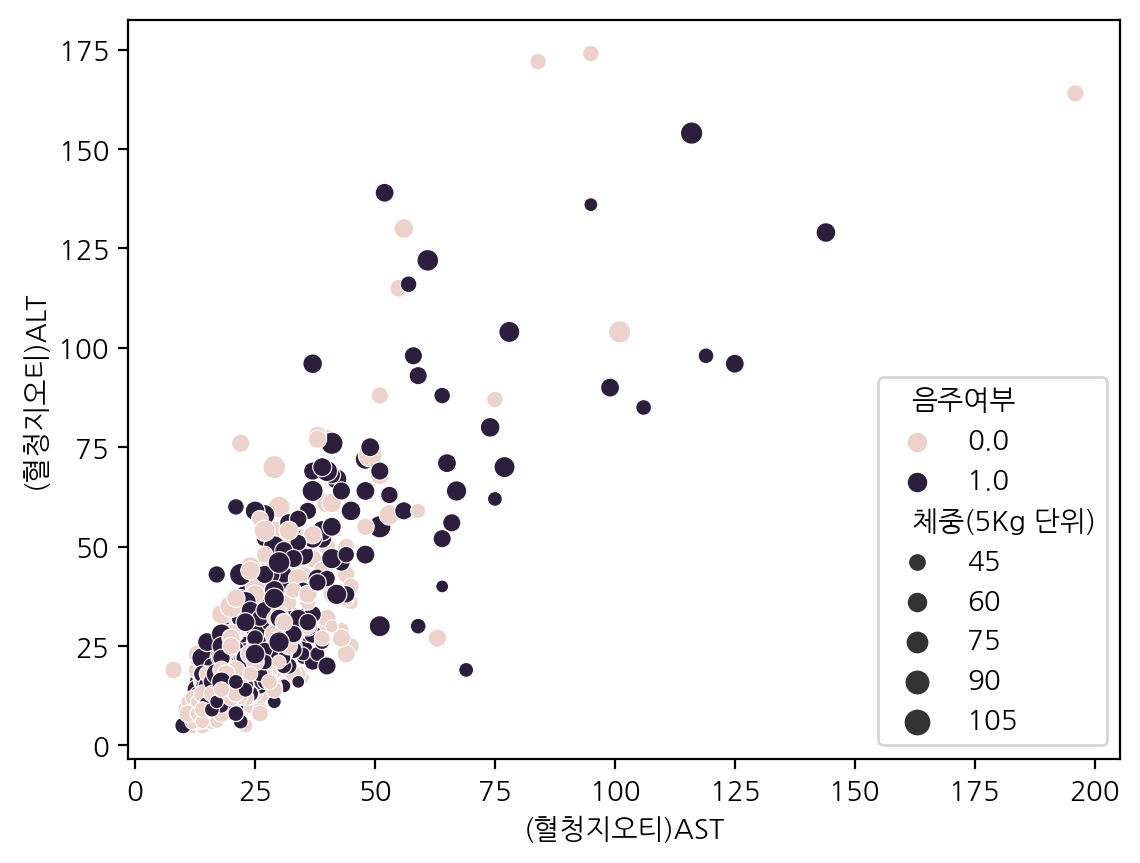

In [67]:
#@title 수치형 데이터 시각화 - scatter plot
sns.scatterplot(data=df, x = "(혈청지오티)AST", y ="(혈청지오티)ALT",
                hue= "음주여부" ,size = "체중(5Kg 단위)")

In [68]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

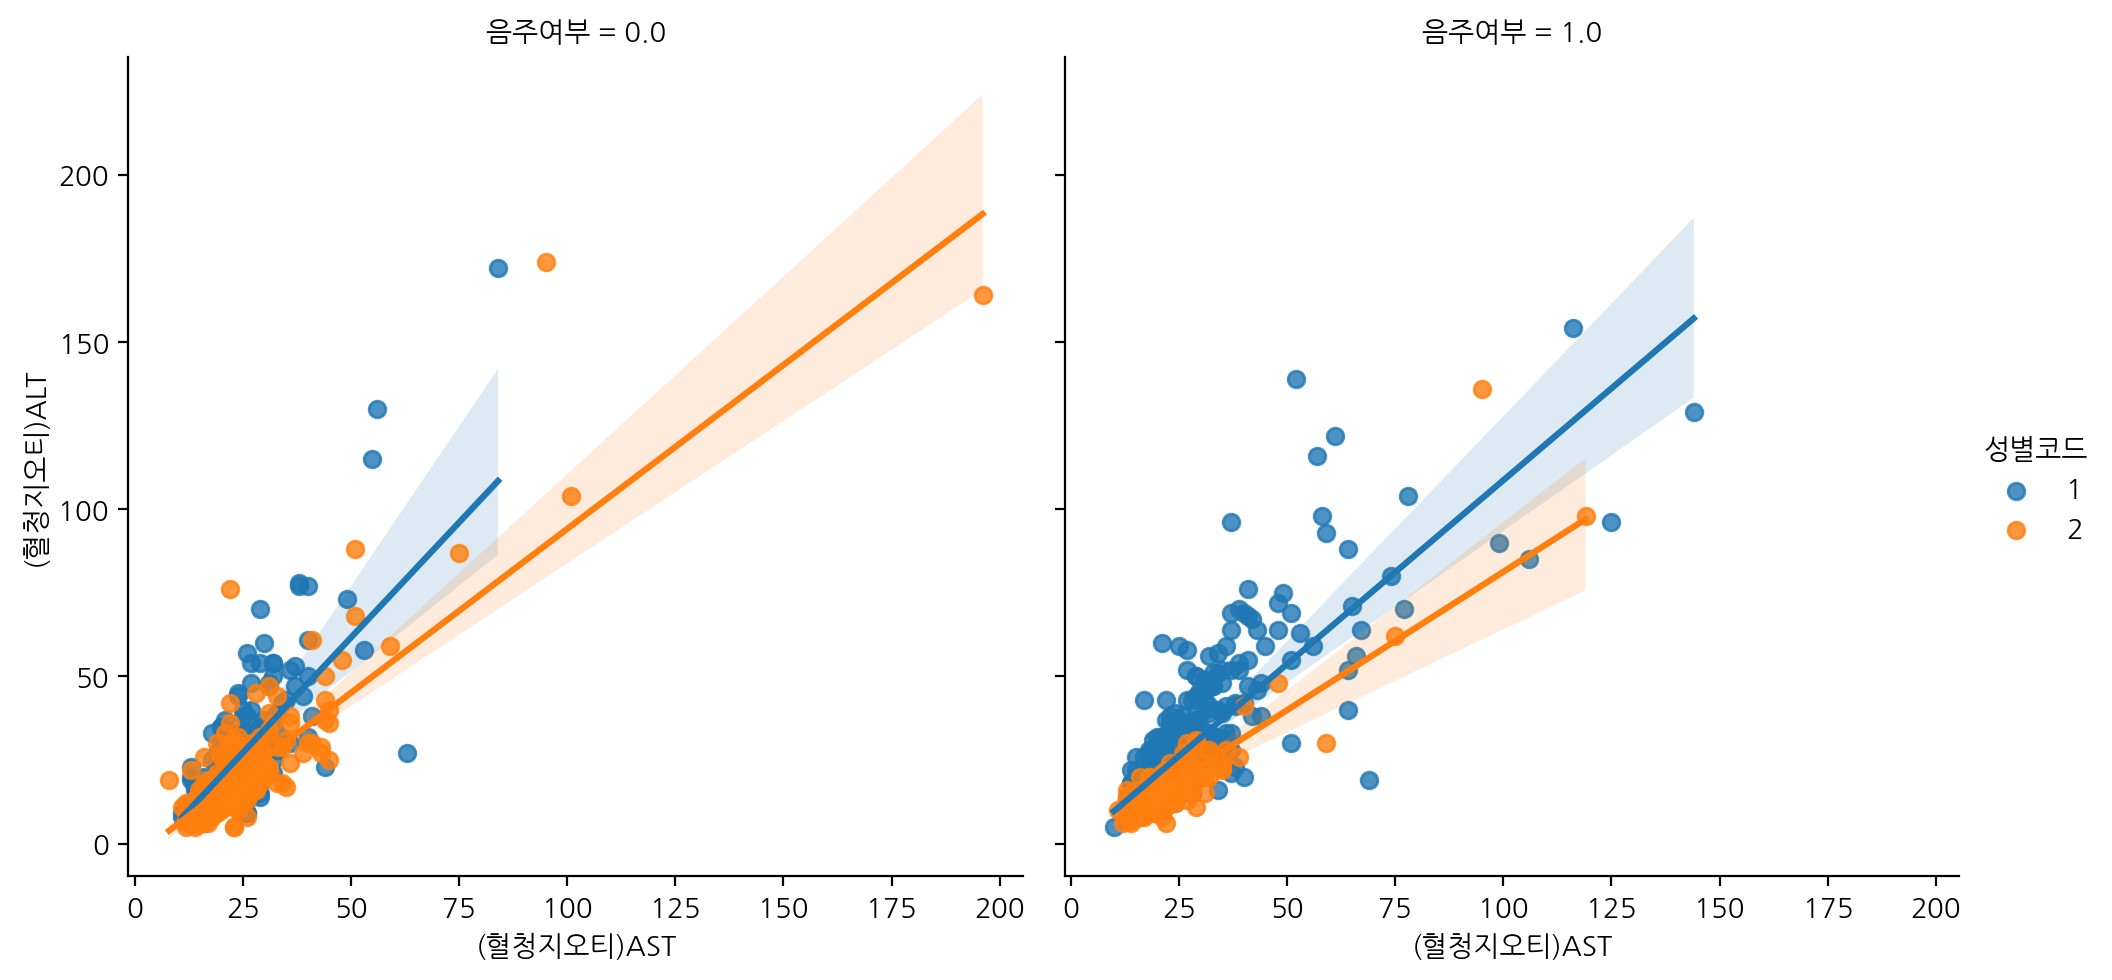

In [69]:
#@title 수치형 데이터 시각화 - implot
sns.lmplot(data=df, x = "(혈청지오티)AST", y ="(혈청지오티)ALT",
                hue= "성별코드", col ="음주여부", robust= True)
# x와 y가 양의 상관관계가 있다고 할 수 있다.
# 성별이 남자이면서 음주를 하는 사람이 더 강한 선형관계가 있다고 할 수 있다.
# robust true를 하게 되면 이상치를 고려하고 그려짐

In [70]:
#@title dist plot 그리기
# dist plot으로 그리는 경우에는 hist(도수분포표, 특정 단위의 분포도)와 확률 밀도 함수와 함께 그린다
df.columns


Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [71]:
#@title distplot은 결측치가 있으면 그릴 수 없다
# null 처리
df_chol = df.loc[df["총콜레스테롤"].notnull(),"총콜레스테롤"]

<ipython-input-72-45b0d85612ed>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_chol)


<Axes: xlabel='총콜레스테롤', ylabel='Density'>

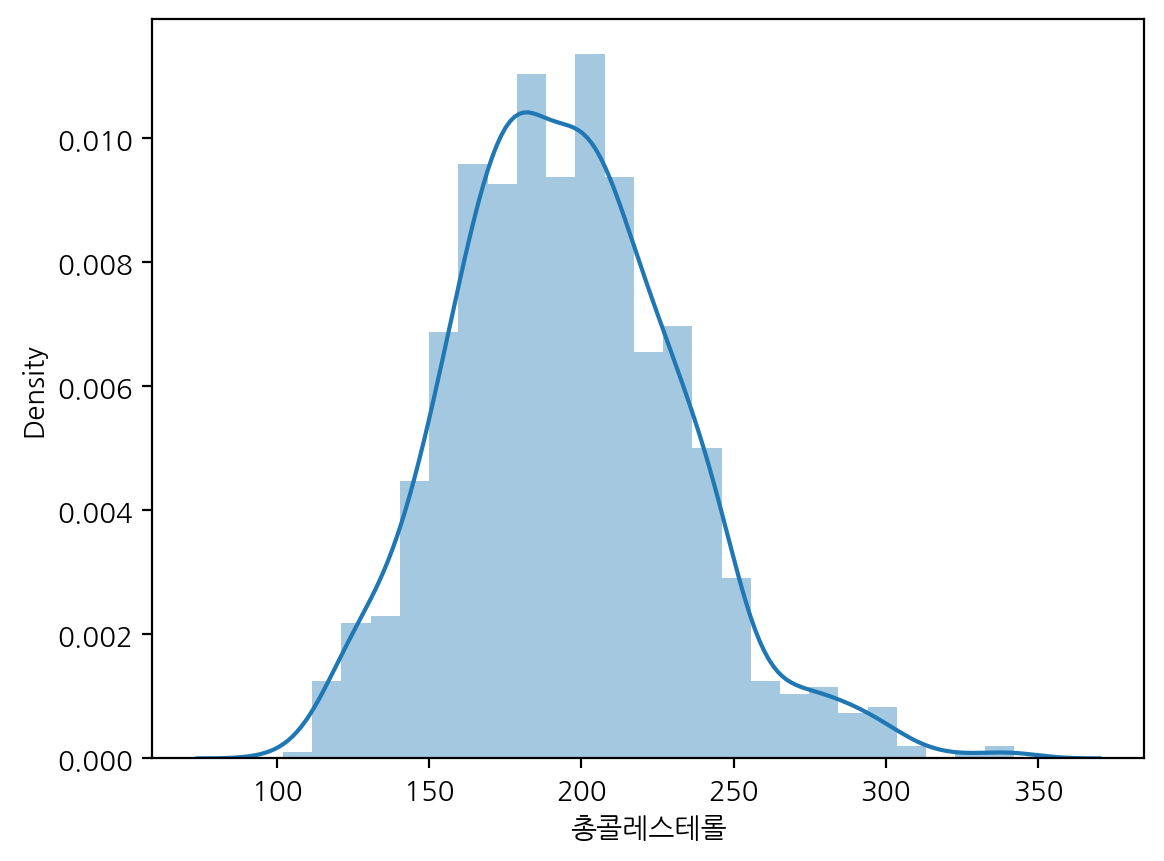

In [72]:
sns.distplot(df_chol)

<ipython-input-73-77012d6a8d5b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["총콜레스테롤"],bins = 100)


<Axes: xlabel='총콜레스테롤', ylabel='Density'>

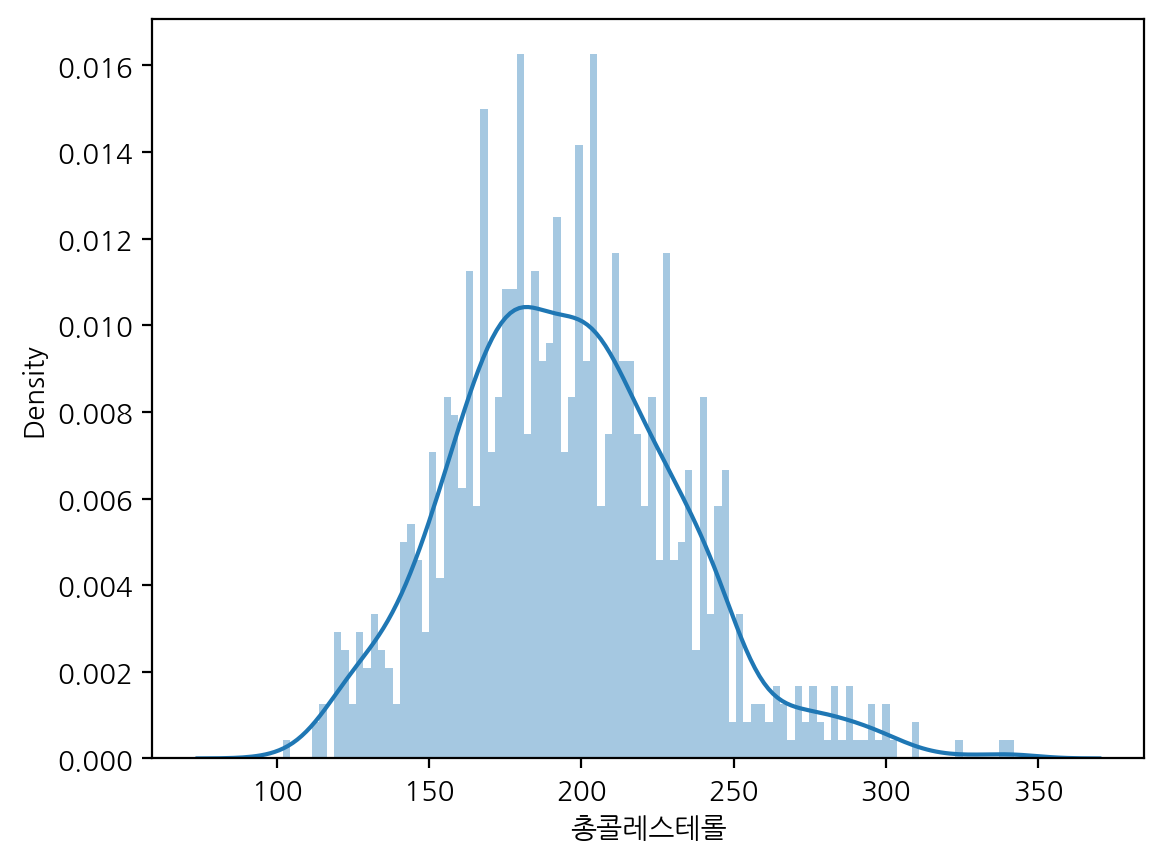

In [73]:
sns.distplot(df["총콜레스테롤"],bins = 100)

<ipython-input-74-4d15c4f4ca1a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 1),"총콜레스테롤"])


<Axes: xlabel='총콜레스테롤', ylabel='Density'>

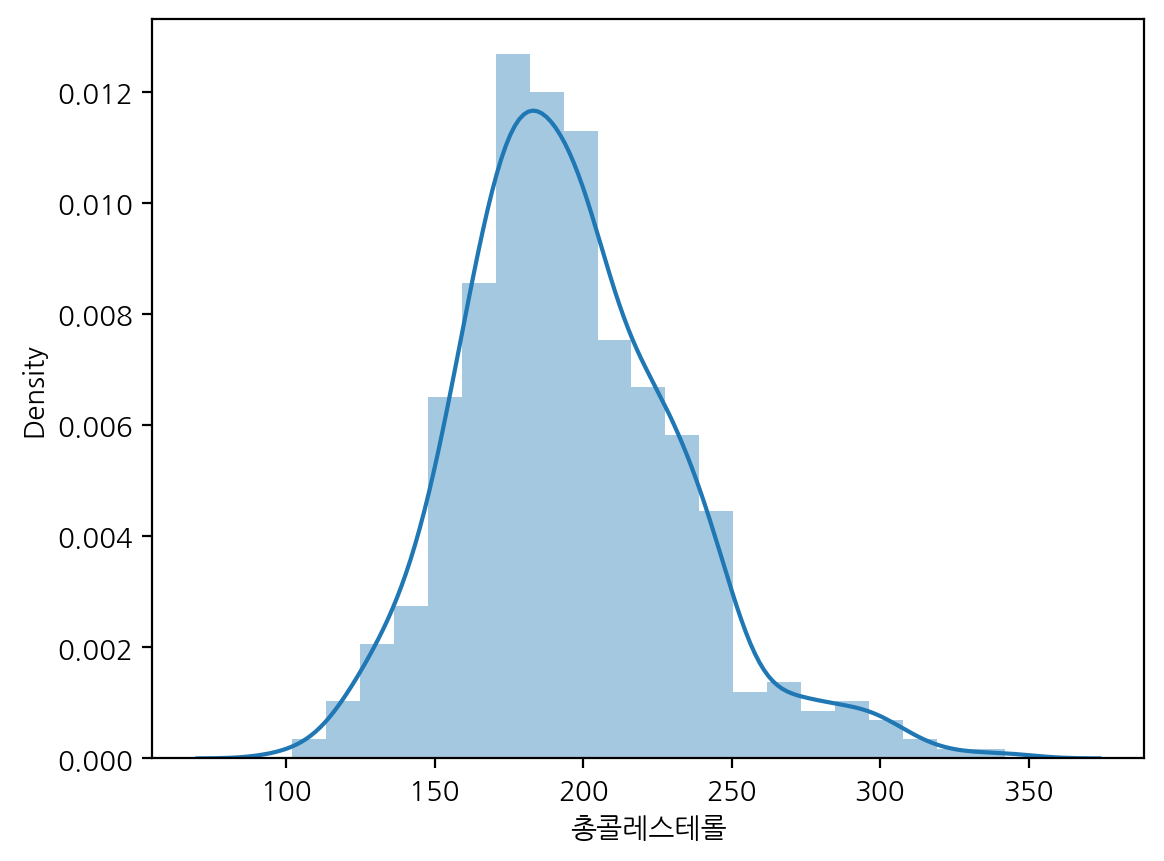

In [74]:
#@title 음주여부가 1인 값의 총 콜레스테롤 distplot
sns.distplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 1),"총콜레스테롤"])

<ipython-input-75-8386819e1b7d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 0),"총콜레스테롤"])


<Axes: xlabel='총콜레스테롤', ylabel='Density'>

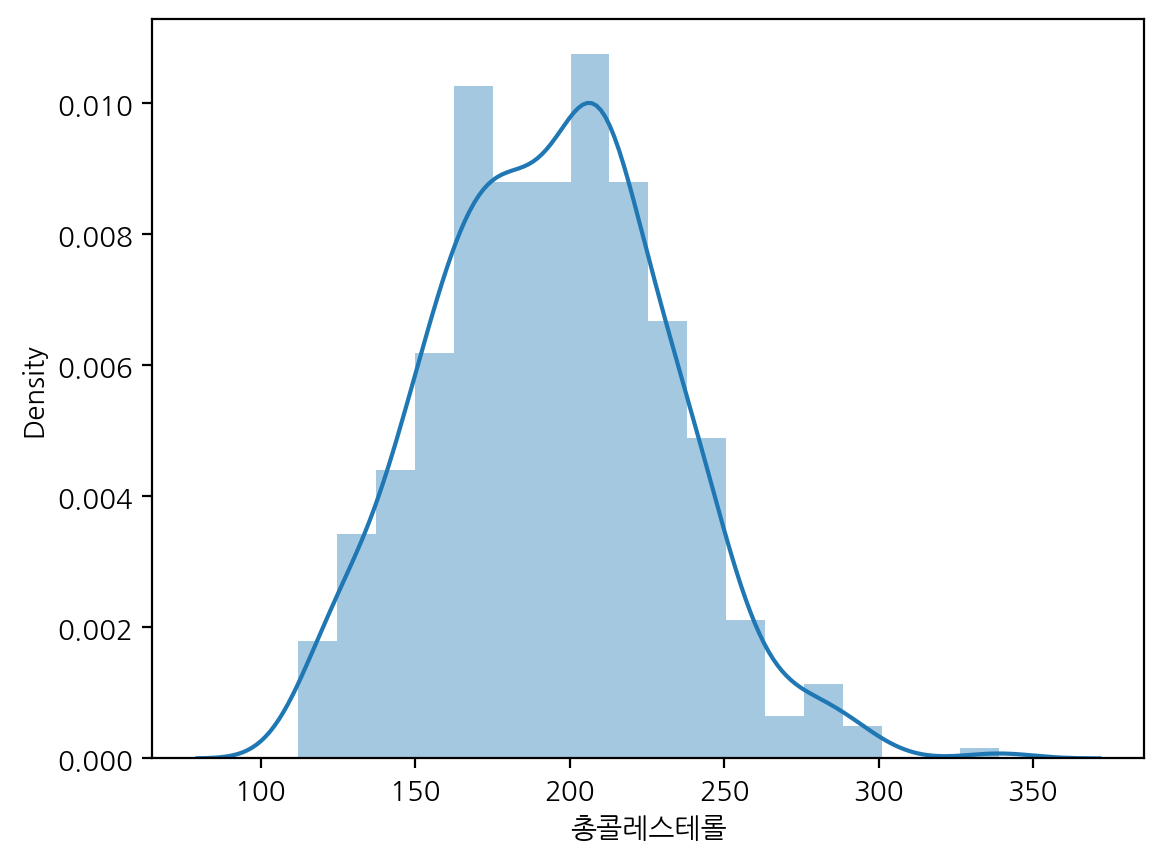

In [75]:
#@title음주여부가 0인 값의 총 콜레스테롤 distplot
sns.distplot(df.loc[df["총콜레스테롤"].notnull() & (df["음주여부"] == 0),"총콜레스테롤"])

<Axes: xlabel='총콜레스테롤', ylabel='Density'>

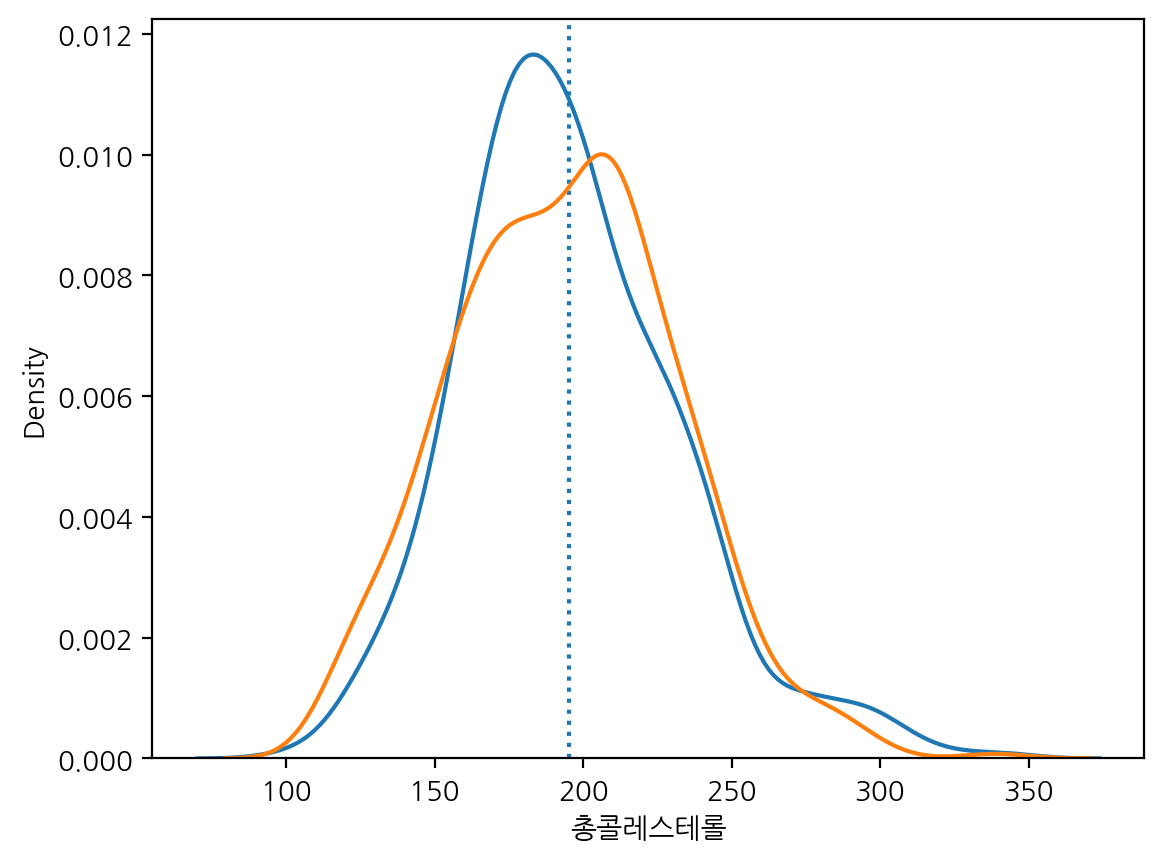

In [76]:
#@title kdeplot으로 하나의 그래프 위에 표기
# 평균값 표기
plt.axvline(df["총콜레스테롤"].mean(), linestyle= ":")
sns.kdeplot(df.loc[
    (df["총콜레스테롤"].notnull()) & (df["음주여부"] == 1),"총콜레스테롤"
],label="음주 중")
sns.kdeplot(df.loc[
    (df["총콜레스테롤"].notnull()) & (df["음주여부"] == 0),"총콜레스테롤"
],label="음주 안함")

<ipython-input-77-31533450f8b0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["감마지티피"])


<Axes: xlabel='감마지티피', ylabel='Density'>

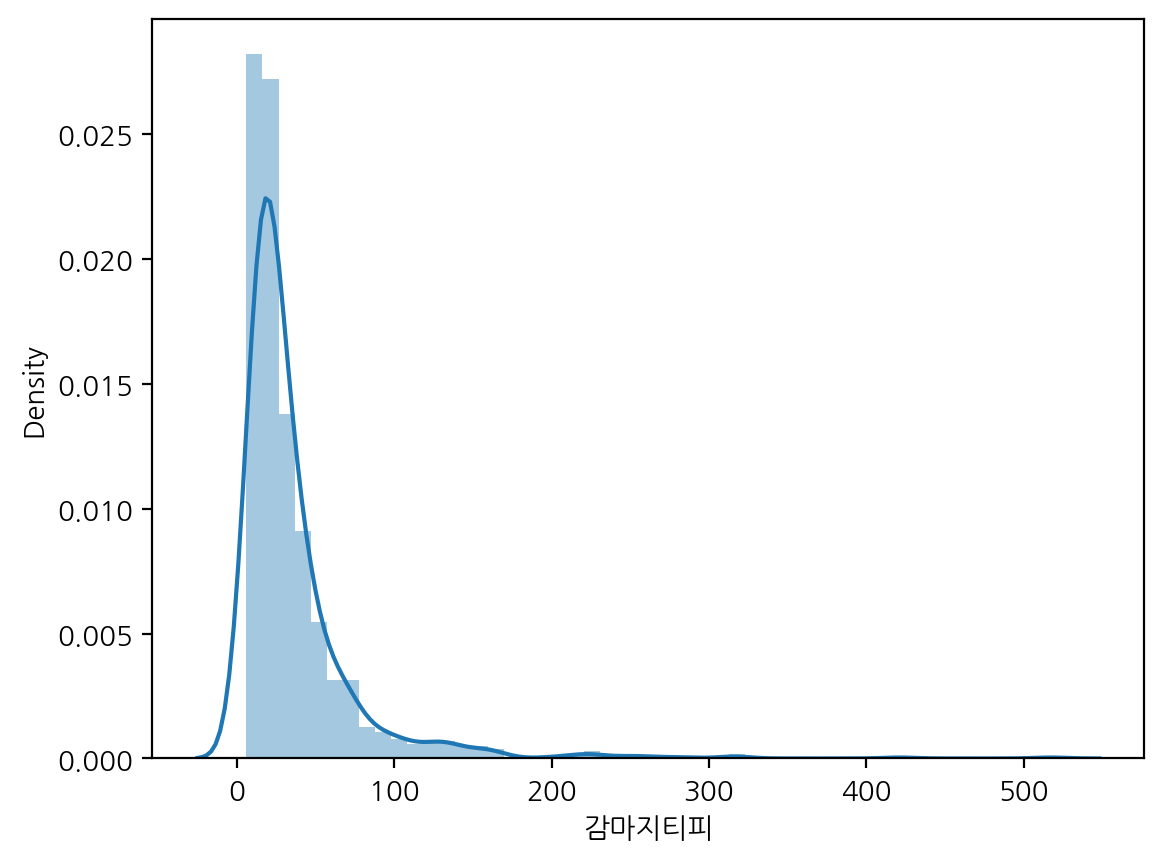

In [77]:
sns.distplot(df["감마지티피"])

<ipython-input-78-9a9cc953587c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s_1, label ="음주중")
<ipython-input-78-9a9cc953587c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s_2, label ="음주 안 함")


<Axes: xlabel='감마지티피', ylabel='Density'>

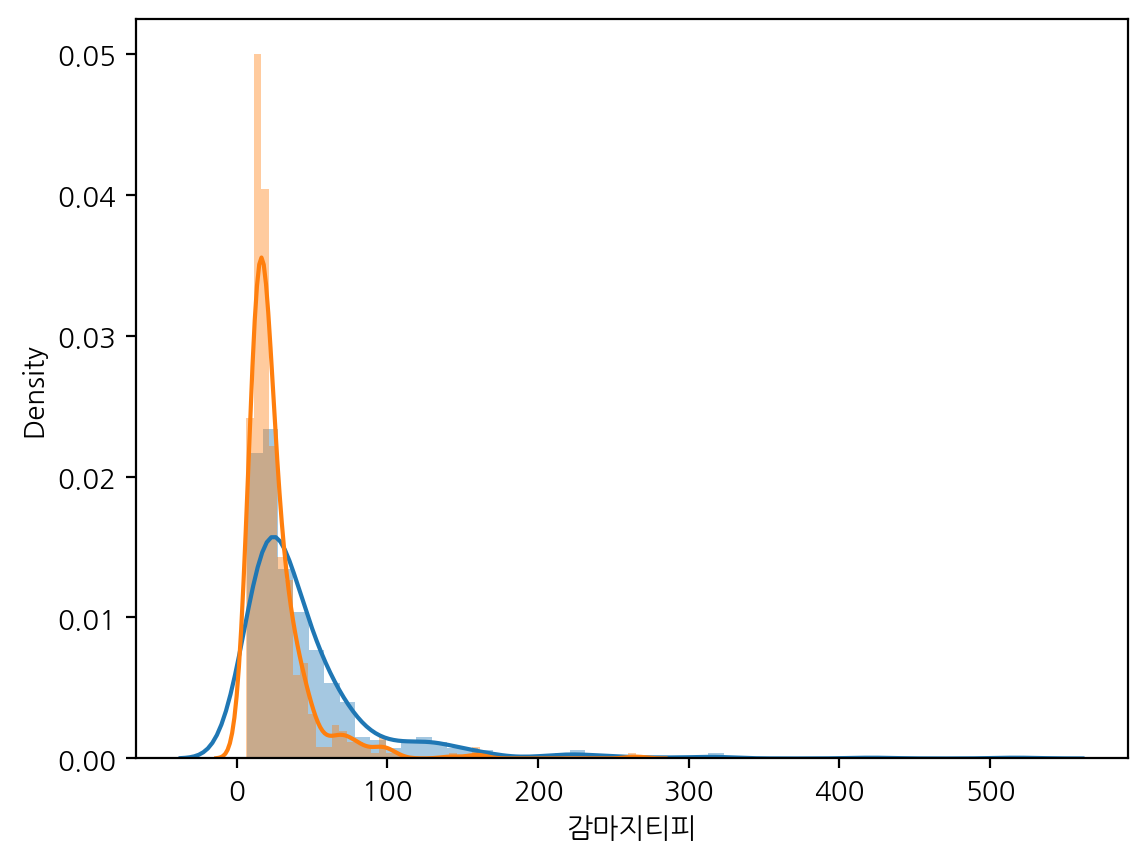

In [78]:
s_1 =df.loc[df["음주여부"]==1,"감마지티피"]
s_2 = df.loc[df["음주여부"]==0,"감마지티피"]

sns.distplot(s_1, label ="음주중")
sns.distplot(s_2, label ="음주 안 함")

<Axes: xlabel='감마지티피', ylabel='Density'>

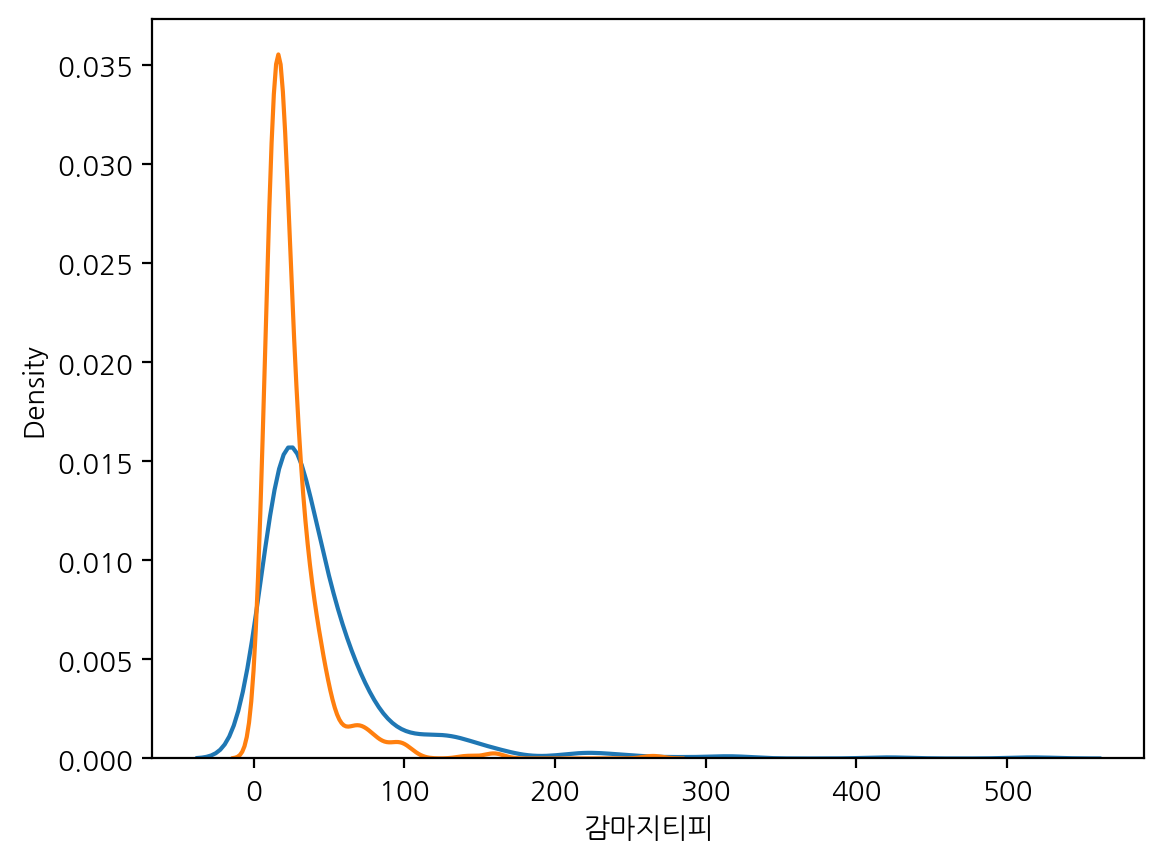

In [79]:
#@title density 그래프는 빼고 그릴 수 있다.
sns.kdeplot(s_1, label ="음주중")
sns.kdeplot(s_2, label ="음주 안 함")

In [88]:
#@title 상관 분석이 인과 관계는 아니다
df.columns.tolist()
columns =['신장(5Cm단위)',
 '체중(5Kg 단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '음주여부']

In [89]:
df_sample = df.sample(1000)
df_small = df_sample[columns]
df_small

신장(5Cm단위)  체중(5Kg 단위)  허리둘레  시력(좌)  시력(우)  청력(좌)  청력(우)  수축기혈압  이완기혈압  \
410358      160.0        65.0  96.0    0.8    0.7    1.0    1.0  142.0   76.0   
909244      150.0        50.0  67.0    1.5    1.2    1.0    1.0  107.0   70.0   
930984      165.0        55.0  68.0    1.5    1.2    1.0    1.0  103.0   61.0   
697809      170.0        60.0  70.0    1.2    1.0    1.0    1.0  100.0   60.0   
196716      175.0        65.0  85.0    1.0    1.0    1.0    1.0  110.0   70.0   
...           ...         ...   ...    ...    ...    ...    ...    ...    ...   
995227      170.0        75.0  84.0    1.2    1.2    1.0    1.0  130.0   80.0   
713606      160.0        70.0  83.0    1.2    1.5    1.0    1.0  150.0   90.0   
522226      185.0        95.0  96.0    1.5    1.5    1.0    1.0  130.0   80.0   
533016      155.0        60.0  80.8    1.0    1.5    1.0    1.0  150.0   90.0   
536506      165.0        45.0  60.0    1.5    0.9    1.0    1.0  120.0   60.0   

        식전혈당(공복혈당)  ...  HDL콜레스테롤  LDL콜레스테롤   혈색소  요단백  혈청크레아티닌  (혈청지오티)AST  \
410358       124.0  ...      49.0     129.0  15.8  1.0      1.1        38.0   
909244        83.0  ...      66.0     108.0  14.0  1.0      0.5        24.0   
930984        90.0  ...     104.0     101.0  13.5  2.0      0.6        14.0   
697809       108.0  ...      51.0      79.0  15.2  1.0      1.1        12.0   
196716       102.0  ...      64.0     139.0  16.3  1.0      1.0        18.0   
...            ...  ...       ...       ...   ...  ...      ...         ...   
995227        95.0  ...      55.0     124.0  13.2  1.0      1.1        38.0   
713606        78.0  ...      60.0     127.0  13.1  1.0      0.8        43.0   
522226        84.0  ...      57.0     153.0  15.8  1.0      0.9        22.0   
533016       109.0  ...      42.0     132.0  14.5  1.0      0.9        21.0   
536506        90.0  ...      57.0      46.0  12.7  1.0      0.7        17.0   

        (혈청지오티)ALT  감마지티피  흡연상태  음주여부  
410358        41.0   25.0   1.0   1.0  
909244        21.0   12.0   1.0   0.0  
930984         9.0    9.0   1.0   0.0  
697809        10.0   15.0   3.0   0.0  
196716        16.0   19.0   1.0   1.0  
...            ...    ...   ...   ...  
995227        42.0   63.0   3.0   1.0  
713606        27.0   13.0   1.0   0.0  
522226        24.0   34.0   2.0   1.0  
533016        17.0   19.0   1.0   0.0  
536506        14.0   27.0   3.0   1.0  

[1000 rows x 22 columns]

In [90]:
#@title correlation default는 pearson
df_corr = df_small.corr()
df_corr

신장(5Cm단위)  체중(5Kg 단위)      허리둘레     시력(좌)     시력(우)     청력(좌)  \
신장(5Cm단위)    1.000000    0.648489  0.293774  0.141800  0.156605 -0.100178   
체중(5Kg 단위)   0.648489    1.000000  0.790520  0.076534  0.133502 -0.038100   
허리둘레         0.293774    0.790520  1.000000 -0.033007  0.034518  0.048379   
시력(좌)        0.141800    0.076534 -0.033007  1.000000  0.462877 -0.049368   
시력(우)        0.156605    0.133502  0.034518  0.462877  1.000000 -0.041439   
청력(좌)       -0.100178   -0.038100  0.048379 -0.049368 -0.041439  1.000000   
청력(우)       -0.121083   -0.070590  0.052245 -0.084603 -0.096255  0.512849   
수축기혈압        0.030012    0.244673  0.333025 -0.010112 -0.020638  0.105602   
이완기혈압        0.118103    0.287084  0.302398 -0.001695  0.012802  0.034535   
식전혈당(공복혈당)   0.059881    0.155556  0.219585 -0.075272  0.006790 -0.000567   
총콜레스테롤      -0.013813    0.082305  0.081332  0.005267  0.038706 -0.034960   
트리글리세라이드     0.113687    0.238945  0.288572  0.029648  0.018477 -0.029229   
HDL콜레스테롤    -0.152505   -0.357603 -0.409940  0.021295 -0.030666 -0.015340   
LDL콜레스테롤    -0.003485    0.106049  0.098301 -0.015221  0.044949 -0.018551   
혈색소          0.529475    0.508366  0.377023  0.073866  0.056753 -0.015990   
요단백          0.014089    0.028840 -0.002252  0.010995  0.009548 -0.026771   
혈청크레아티닌      0.243101    0.190769  0.149351  0.018104  0.031835 -0.026352   
(혈청지오티)AST   0.035321    0.196722  0.229202  0.003379  0.024706  0.014587   
(혈청지오티)ALT   0.187945    0.372930  0.357288  0.029429  0.083163  0.003031   
감마지티피        0.171372    0.254150  0.271566  0.011519  0.045560 -0.006351   
흡연상태         0.505945    0.397230  0.268685  0.063964  0.054681 -0.034204   
음주여부         0.362905    0.235974  0.084514  0.073696  0.063220 -0.037669   

               청력(우)     수축기혈압     이완기혈압  식전혈당(공복혈당)  ...  HDL콜레스테롤  LDL콜레스테롤  \
신장(5Cm단위)  -0.121083  0.030012  0.118103    0.059881  ... -0.152505 -0.003485   
체중(5Kg 단위) -0.070590  0.244673  0.287084    0.155556  ... -0.357603  0.106049   
허리둘레        0.052245  0.333025  0.302398    0.219585  ... -0.409940  0.098301   
시력(좌)      -0.084603 -0.010112 -0.001695   -0.075272  ...  0.021295 -0.015221   
시력(우)      -0.096255 -0.020638  0.012802    0.006790  ... -0.030666  0.044949   
청력(좌)       0.512849  0.105602  0.034535   -0.000567  ... -0.015340 -0.018551   
청력(우)       1.000000  0.127883  0.041907    0.035457  ... -0.078820 -0.059298   
수축기혈압       0.127883  1.000000  0.744132    0.168399  ... -0.138843  0.003982   
이완기혈압       0.041907  0.744132  1.000000    0.134820  ... -0.090783  0.045014   
식전혈당(공복혈당)  0.035457  0.168399  0.134820    1.000000  ... -0.136568 -0.038186   
총콜레스테롤     -0.095937  0.047920  0.097394   -0.005637  ...  0.137891  0.880425   
트리글리세라이드   -0.027957  0.187875  0.166679    0.176782  ... -0.383788  0.011516   
HDL콜레스테롤   -0.078820 -0.138843 -0.090783   -0.136568  ...  1.000000 -0.062431   
LDL콜레스테롤   -0.059298  0.003982  0.045014   -0.038186  ... -0.062431  1.000000   
혈색소        -0.031084  0.143038  0.219912    0.131582  ... -0.208488  0.112034   
요단백        -0.013656  0.016896  0.021567    0.057405  ... -0.005009 -0.004715   
혈청크레아티닌    -0.030057  0.090268  0.131162    0.045790  ... -0.142140  0.037578   
(혈청지오티)AST  0.002233  0.143089  0.159043    0.183927  ... -0.031833  0.011017   
(혈청지오티)ALT -0.023672  0.118240  0.154490    0.223034  ... -0.179211  0.075795   
감마지티피       0.005842  0.176208  0.204673    0.292087  ... -0.121648  0.046815   
흡연상태       -0.040937  0.108511  0.144251    0.103175  ... -0.188906 -0.011593   
음주여부       -0.032475  0.032543  0.110143    0.086991  ...  0.052452 -0.046947   

                 혈색소       요단백   혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT     감마지티피  \
신장(5Cm단위)   0.529475  0.014089  0.243101    0.035321    0.187945  0.171372   
체중(5Kg 단위)  0.508366  0.028840  0.190769    0.196722    0.372930  0.254150   
허리둘레        0.377023 -0.002252  0.149351    0.229202    0.357288  0.271566   
시력(좌)       0.073866  0.010995  0.018104    0.003379    0.029429

In [91]:
df_corr["신장(5Cm단위)"].sort_values()

HDL콜레스테롤     -0.152505
청력(우)        -0.121083
청력(좌)        -0.100178
총콜레스테롤       -0.013813
LDL콜레스테롤     -0.003485
요단백           0.014089
수축기혈압         0.030012
(혈청지오티)AST    0.035321
식전혈당(공복혈당)    0.059881
트리글리세라이드      0.113687
이완기혈압         0.118103
시력(좌)         0.141800
시력(우)         0.156605
감마지티피         0.171372
(혈청지오티)ALT    0.187945
혈청크레아티닌       0.243101
허리둘레          0.293774
음주여부          0.362905
흡연상태          0.505945
혈색소           0.529475
체중(5Kg 단위)    0.648489
신장(5Cm단위)     1.000000
Name: 신장(5Cm단위), dtype: float64

In [92]:
#@title 정렬해서 주요 변수만 살펴보기
df_corr.loc[df_corr["음주여부"]>0.2,"음주여부"]

신장(5Cm단위)     0.362905
체중(5Kg 단위)    0.235974
혈색소           0.291863
감마지티피         0.250011
흡연상태          0.365642
음주여부          1.000000
Name: 음주여부, dtype: float64

<Axes: >

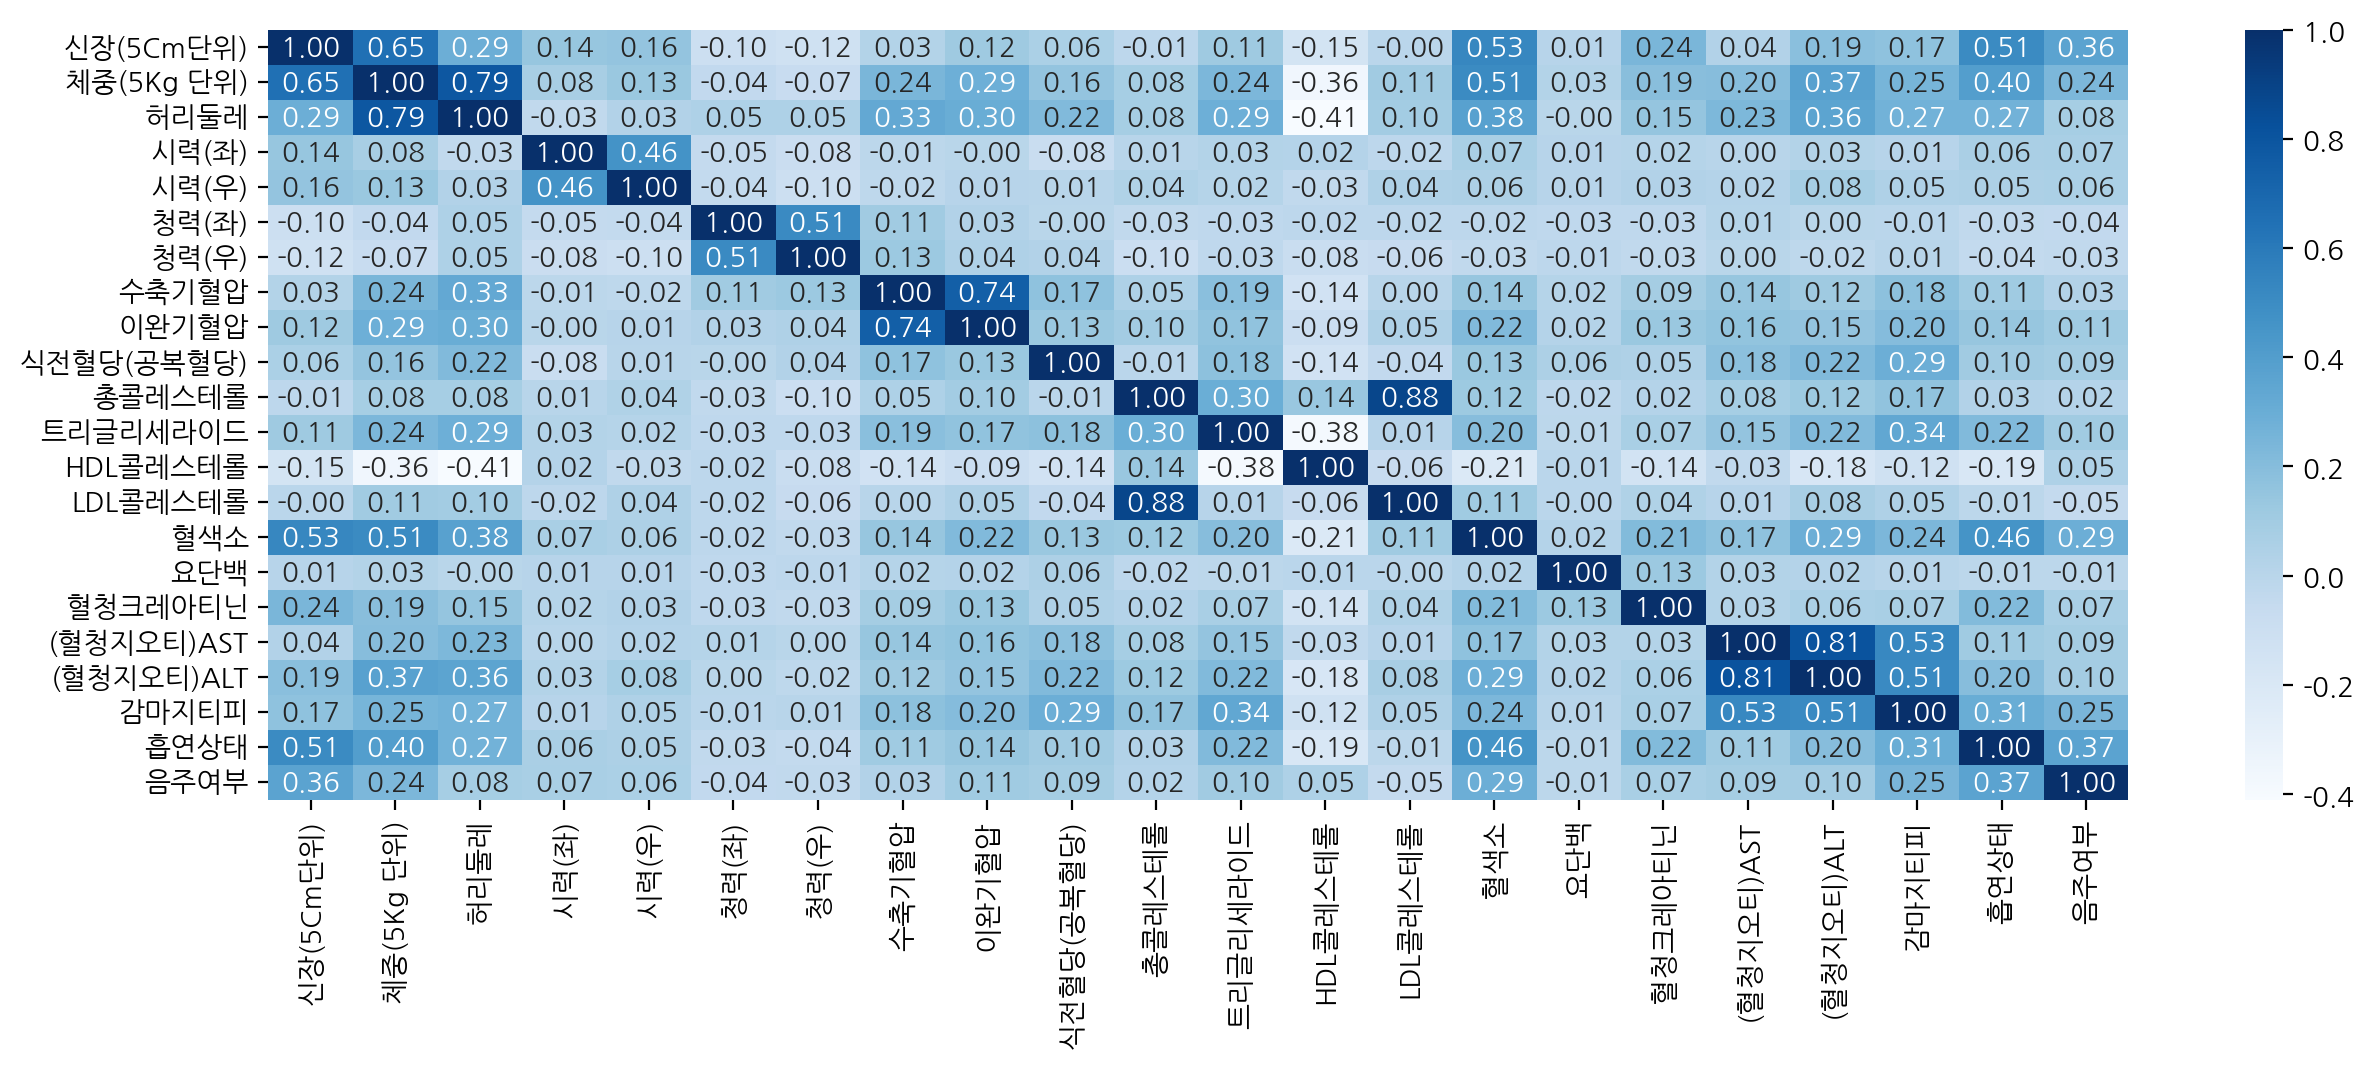

In [101]:
#@title 상관계수 시각화
plt.figure(figsize=(15,5))
sns.heatmap(df_corr, annot= True, fmt=".2f",cmap="Blues")

<ipython-input-102-c919e9b97126>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool))


<Axes: >

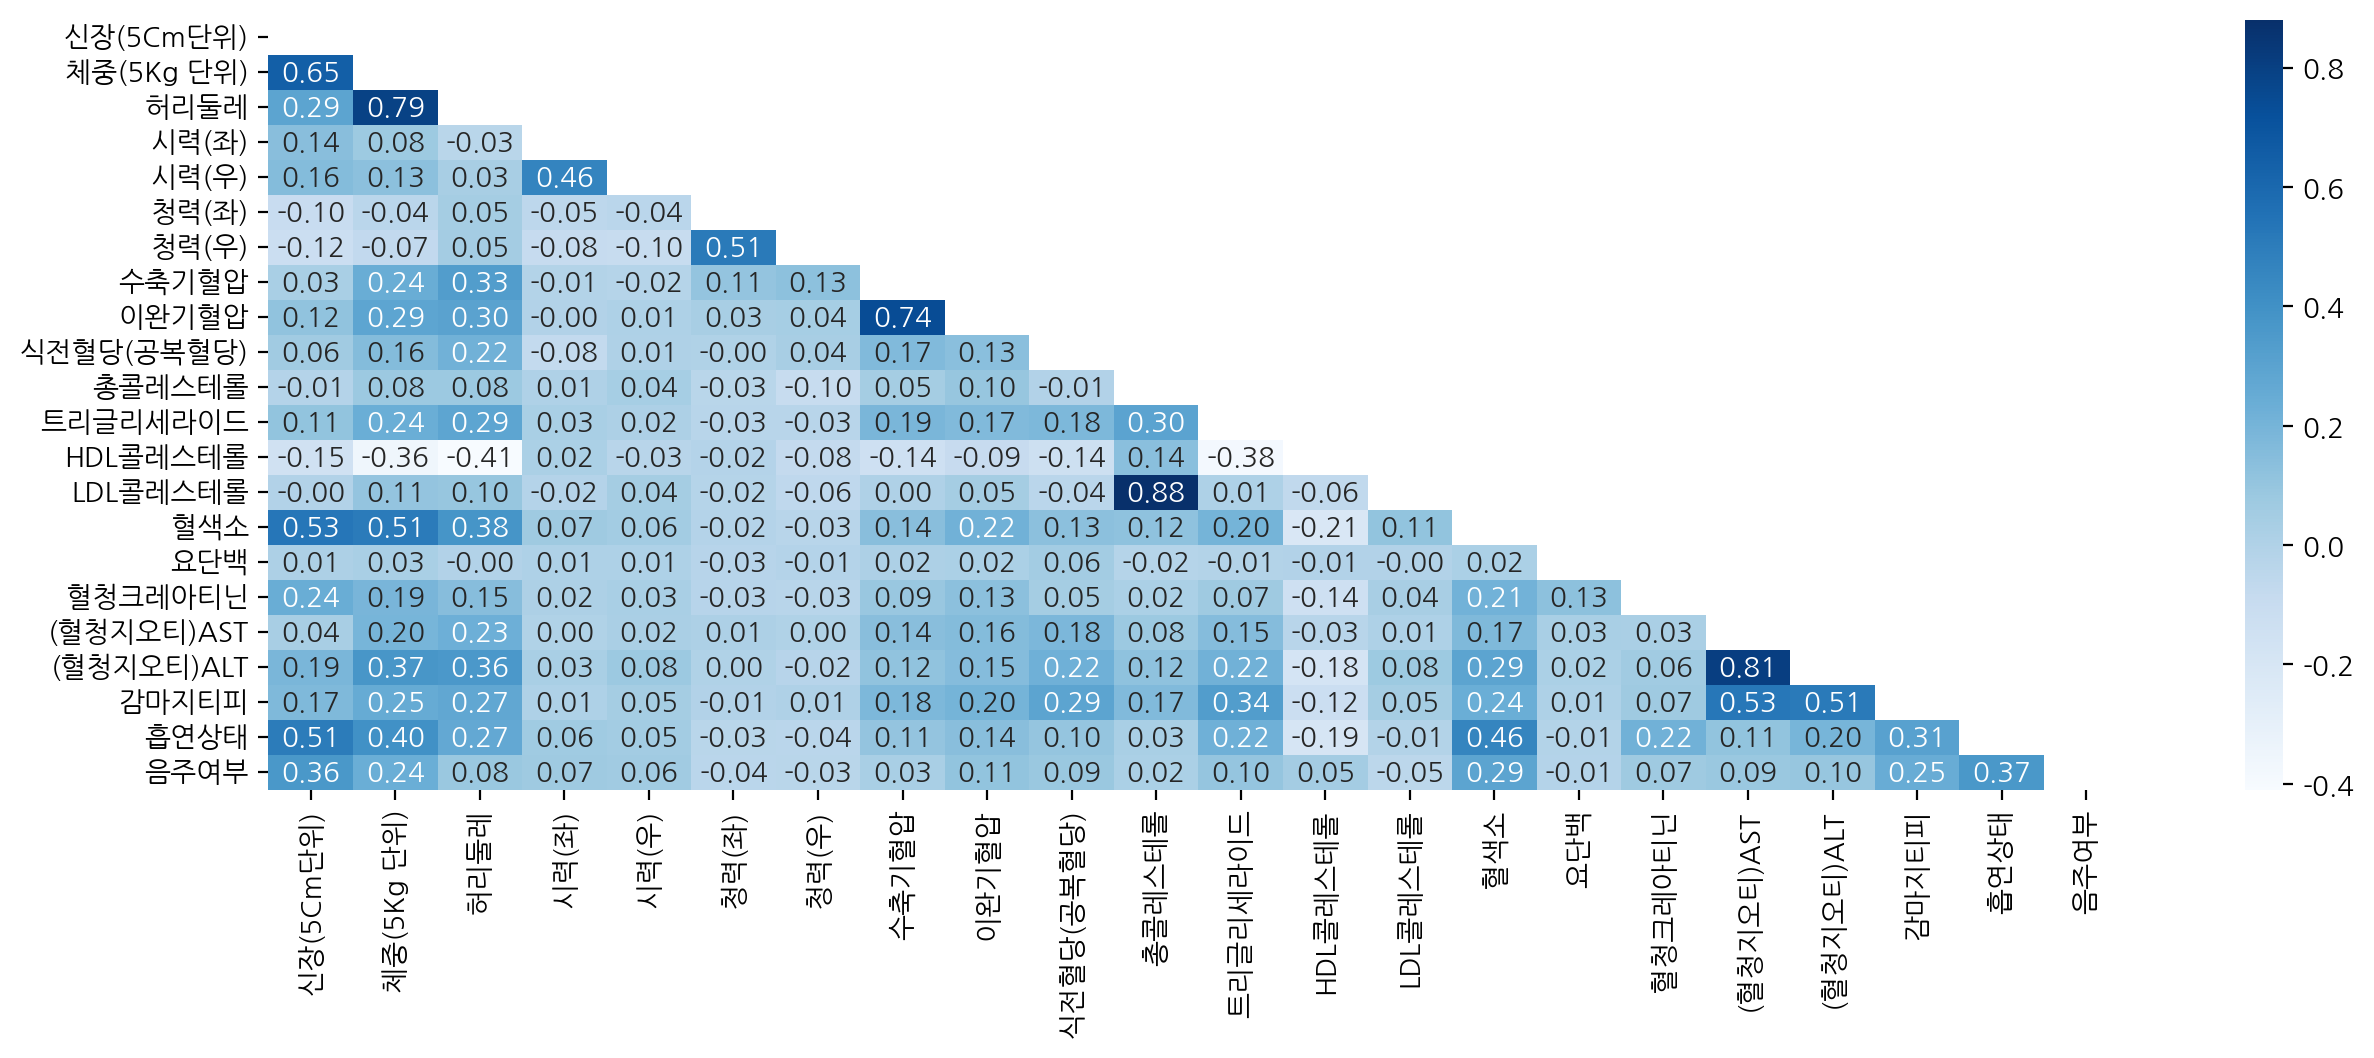

In [102]:
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
plt.figure(figsize=(15,5))
sns.heatmap(df_corr, annot= True, fmt=".2f",cmap="Blues",mask=mask)